In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [2]:
year='2018'
hists = load('../hists/darkhiggs'+year+'.scaled')

lumis = { #Values from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable                                                      
        '2016': "35.92",
        '2017': "41.53",
        '2018': "59.74"
    }
lumi=lumis[year]

fail_binning_dict={
    '2016': [0,0.53],
    '2017': [0,0.61],
    '2018': [0,0.65]
}
pass_binning_dict={
    '2016': [0.53,1],
    '2017': [0.61,1],
    '2018': [0.65,1]
}

fail_binning=fail_binning_dict[year]
pass_binning=fail_binning_dict[year]

data={
    '2016':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2017':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2018':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'EGamma',
        'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'EGamma',
        'gcr': 'EGamma'
    },
}

data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']

mass_binning = [
    #0,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    120,
    150,
    180,
    240,
    300,
]
bkg_hists['template']=bkg_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass', mass_binning))
signal_hists['template']=signal_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))
data_hists['template']=data_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))

recoil_binning = [250, 310, 370, 470, 590, 3000]
bkg_hists['template']=bkg_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
signal_hists['template']=signal_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
data_hists['template']=data_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
    

In [3]:
exp = 0
tot_bkg_yld_array={():0}

region = 'wmcr'
category_map = {
    0 :'fail', 
    1 :'pass', 
    None : '',
}
category=1
sys='nominal'
    
print('------------------------')
print('------------------------')
print('Category:', region, category_map[category])
#print('Recoil bins:',signal_hists['template'].axis('recoil').edges()[()].size-1,signal_hists['template'].axis('recoil').edges()[()])
#print('Mass bins:',signal_hists['template'].axis('fjmass').edges()[()].size-1,signal_hists['template'].axis('fjmass').edges()[()])
#print('Systematic:', sys)
#print('------------------------')
print('------------------------')
print('------------------------')
for p in bkg_hists['template'].identifiers('process'):
    bkg_yld_array = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).values()#(overflow='all')
    if () in bkg_yld_array:
        yld = bkg_yld_array[()][:,:,category].sum()
        tot_bkg_yld_array[()]+=bkg_yld_array[()]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

if not (region == 'sr' and category==1):
    yld_array = data_hists['template'].integrate('region',region).integrate('process', data[year][region]).integrate('systematic',sys).values()#(overflow='all')
    if () in yld_array:
        yld = yld_array[()][:,:,category].sum()
        print('Total observed:', '%.1f' % yld)   
print('------------------------')

if (region == 'sr' and category==1):
    for p in signal_hists['template'].identifiers('process'):
        sig_yld_array = signal_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).values()#(overflow='all')
        if () in sig_yld_array:
            yld = sig_yld_array[()][:,:,category].sum()
            print(p, '%.1f' % yld)
            #print(p,'S/B %.3f' % (yld/exp))
            print(p,'Significance %.1f' % (yld/np.sqrt(exp)))
            binned_significance=0
            for recoil in range(0,signal_hists['template'].axis('recoil').edges()[()].size-2):
                for mass in range(0,signal_hists['template'].axis('fjmass').edges()[()].size-2):
                    pice=np.nan_to_num(sig_yld_array[()][recoil,mass,category].sum()/np.sqrt(tot_bkg_yld_array[()][recoil,mass,category].sum()))
                    binned_significance=binned_significance+(pice*pice)
            print(p,'Binned Sig. %.2f' % np.sqrt(binned_significance))
            print('------------------------')


------------------------
------------------------
Category: wmcr pass
------------------------
------------------------
Hbb 71.3
DY+HF 88.8
DY+LF 106.8
WW 322.9
WZ 184.1
ZZ 6.3
ST 3390.8
TT 20828.5
W+HF 2774.3
W+LF 3077.0
QCD 772.5
------------------------
Total expected: 31623.3
------------------------
Total observed: 26301.0
------------------------


In [4]:
###
# To optimize cuts based on process yield, i.e. you wanna test some background rejection
###

exp = 0
region = 'wmcr'
category_map = {
    0 :'fail', 
    1 :'pass', 
    None : '',
}
category=1
variable = 'fj1pt'
cut_bin = 0
nbins = data_hists[variable].integrate('region').integrate('process', 'MET').values(overflow='all')[()].size
cut_value_array = data_hists[variable].integrate('region').integrate('process', 'MET').axis(variable).edges(overflow='all')

print('------------------------')
print('------------------------')
print('Category:', region, category_map[category])
#print('------------------------')
if cut_bin!=None: print(variable,'> %.2f' % cut_value_array[()][cut_bin+1])
#if cut_bin!=None: print(variable,'< %.2f' % cut_value_array[()][cut_bin+1])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process', p).values()
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()][:,category].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()][:,category])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

for p in signal_hists[variable].identifiers('process'):
    yld_array = signal_hists[variable].integrate('region',region).integrate('process', p).values()
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()][:,category].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()][:,category])[cut_bin]
        #yld = yld_array[()].sum()
        #if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print(p, '%.1f' % yld)
        print(p,'S/B %.3f' % (yld/exp))
        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
        print('------------------------')

if not region == '':
    yld_array = data_hists[variable].integrate('region',region).integrate('process', data[year][region]).values()
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()][:,category].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()][:,category])[cut_bin]
        #yld = yld_array[()].sum()
        #if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

------------------------
------------------------
Category: wmcr pass
fj1pt > 160.00
------------------------
------------------------
Hbb 74.6
DY+HF 90.8
DY+LF 110.9
WW 332.8
WZ 185.9
ZZ 5.5
ST 3619.9
TT 21219.4
W+HF 2877.4
W+LF 3214.8
QCD 815.8
------------------------
Total expected: 32547.7
------------------------
Total observed: 26839.0
------------------------



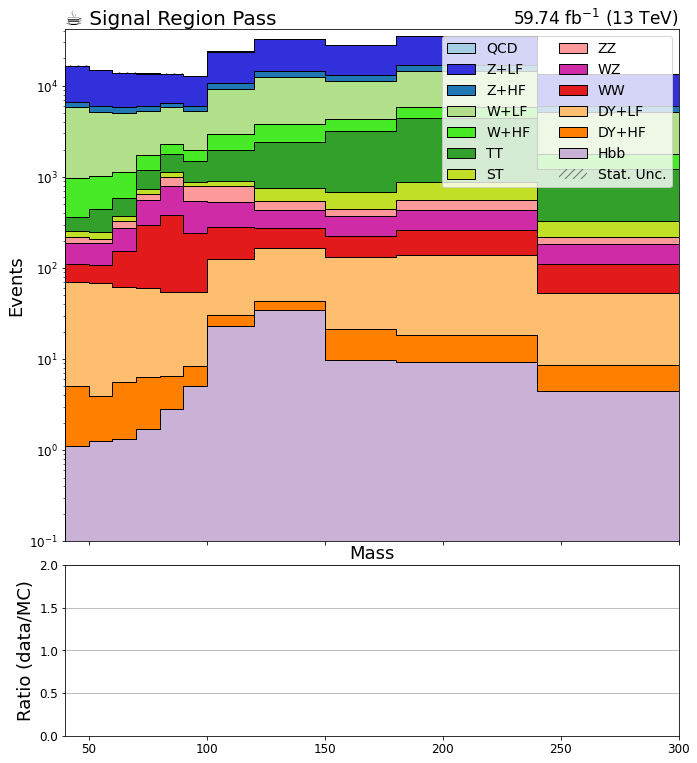

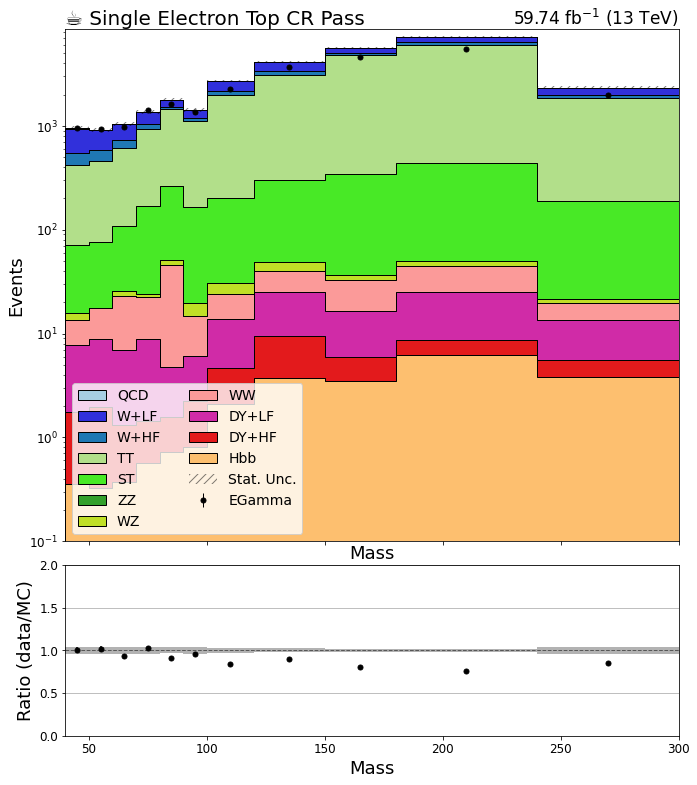

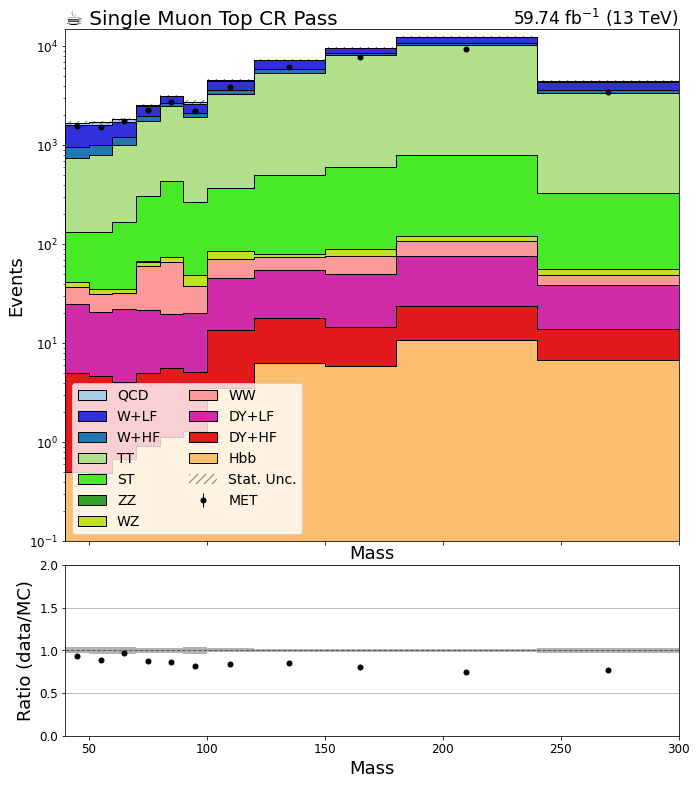

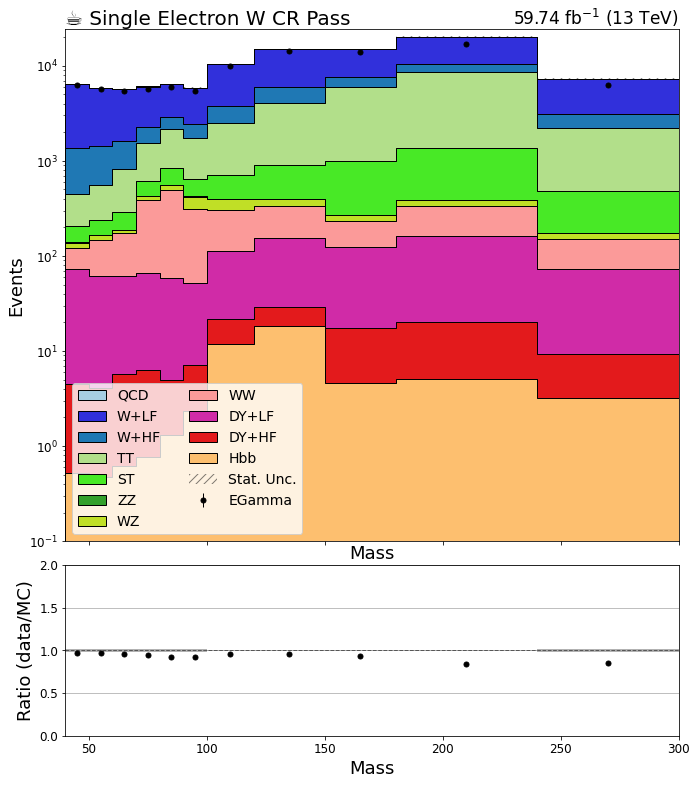

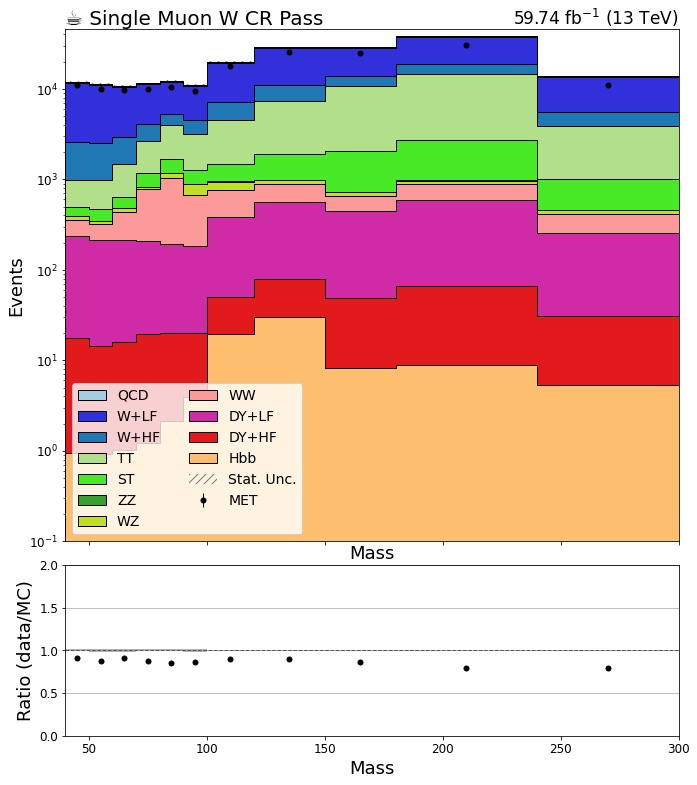

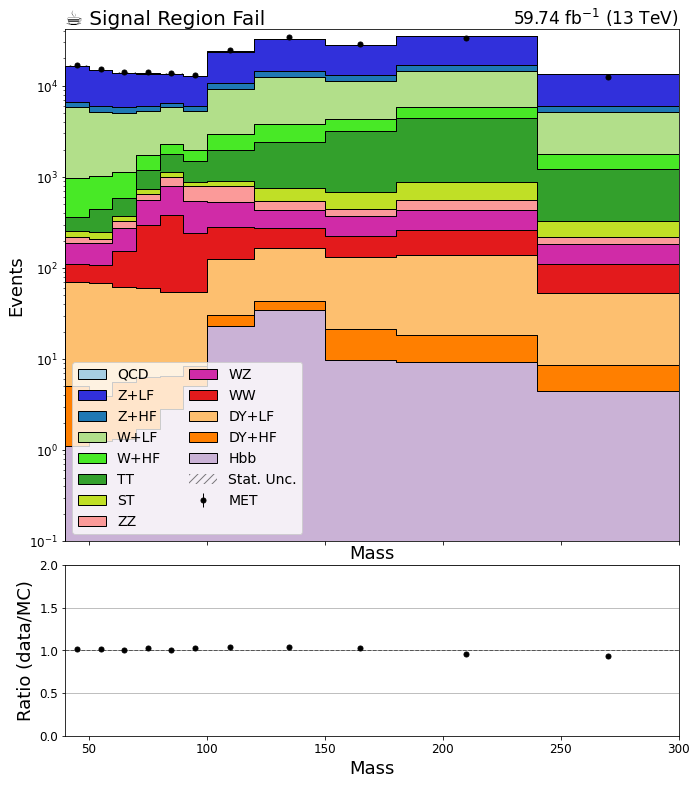

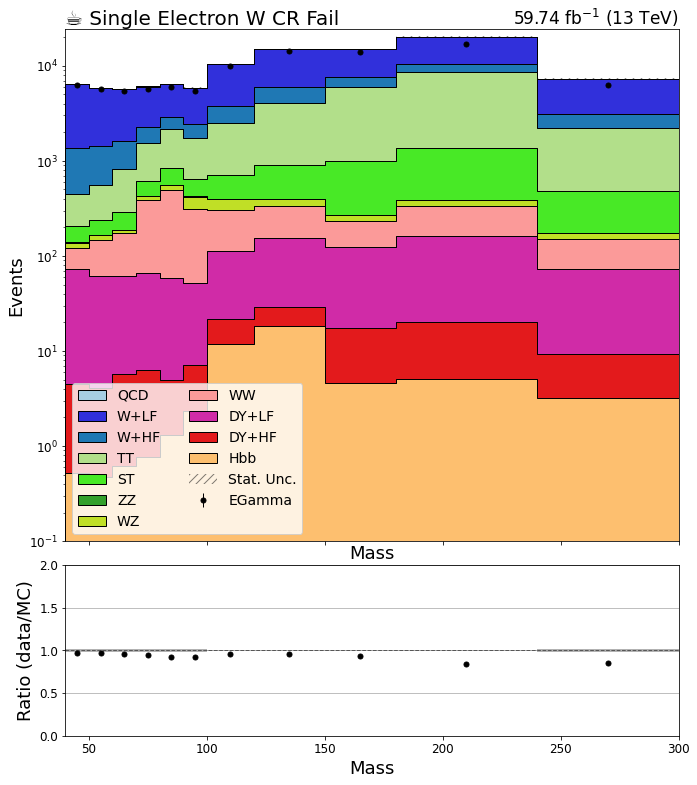

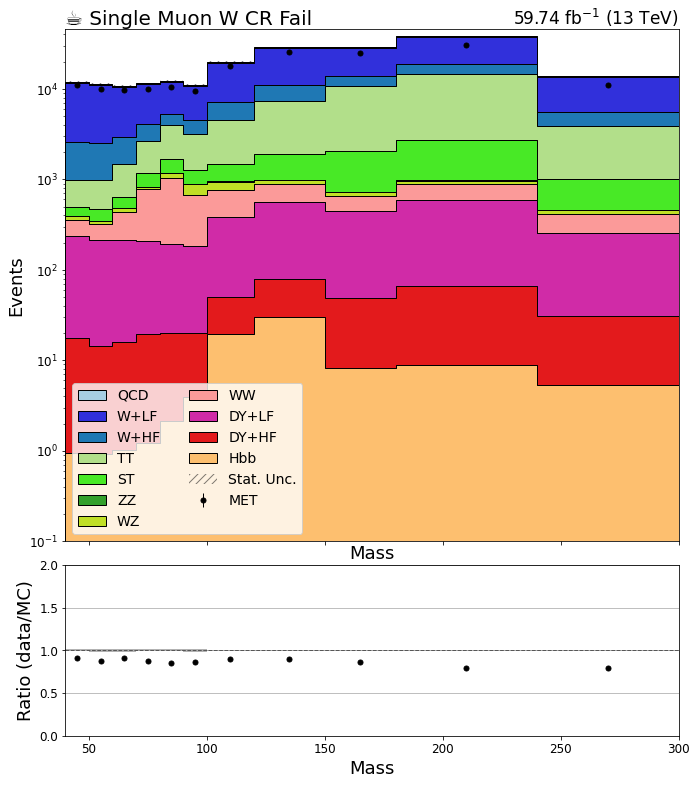

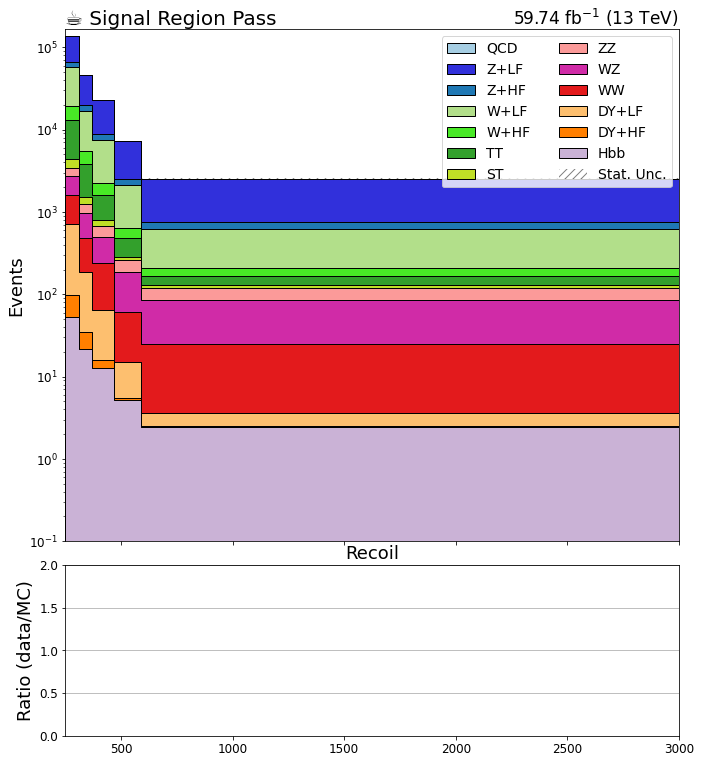

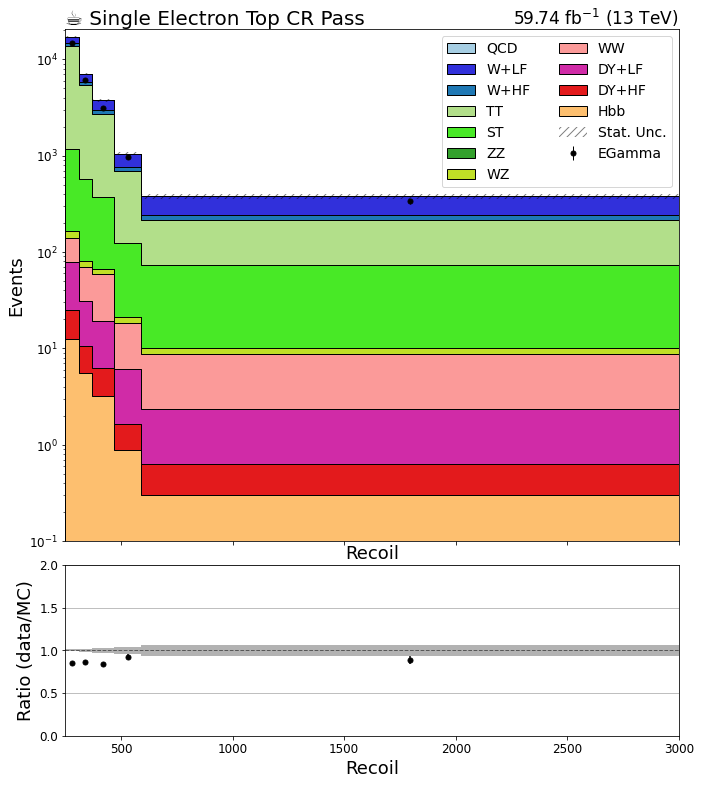

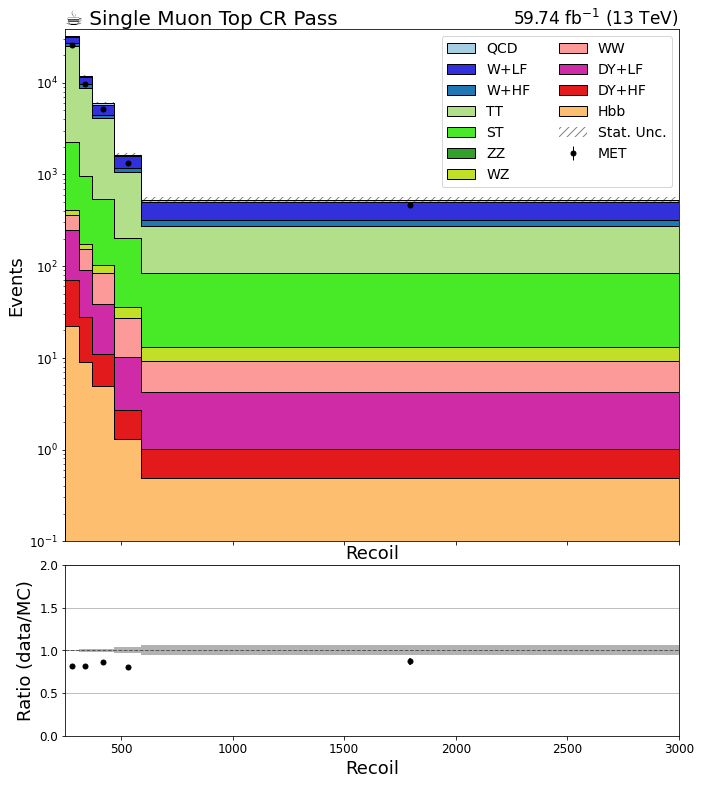

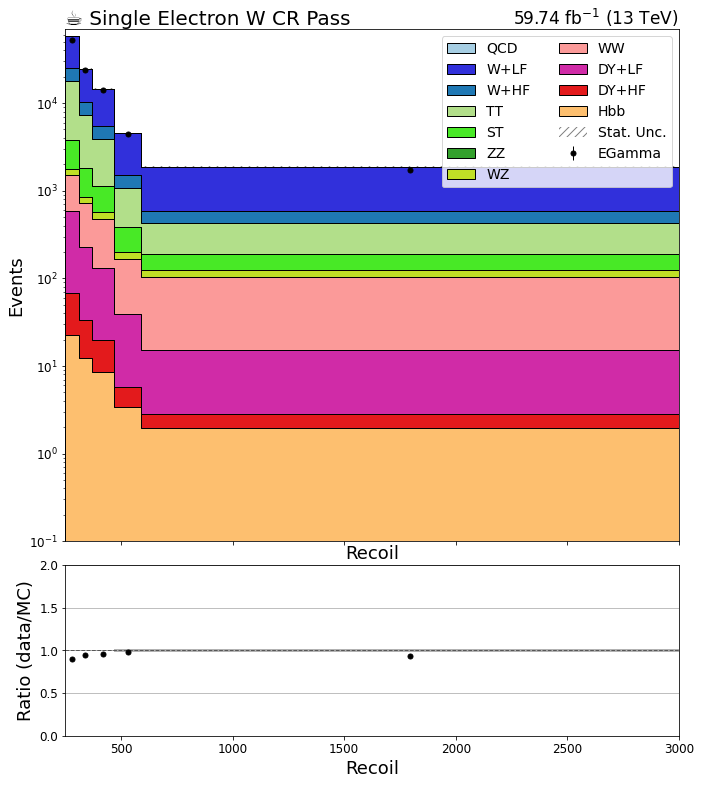

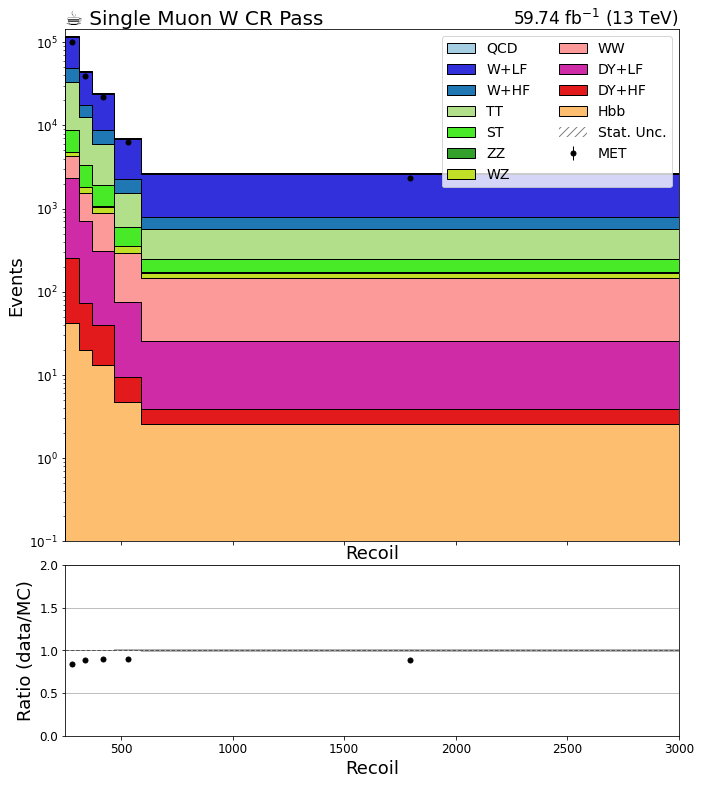

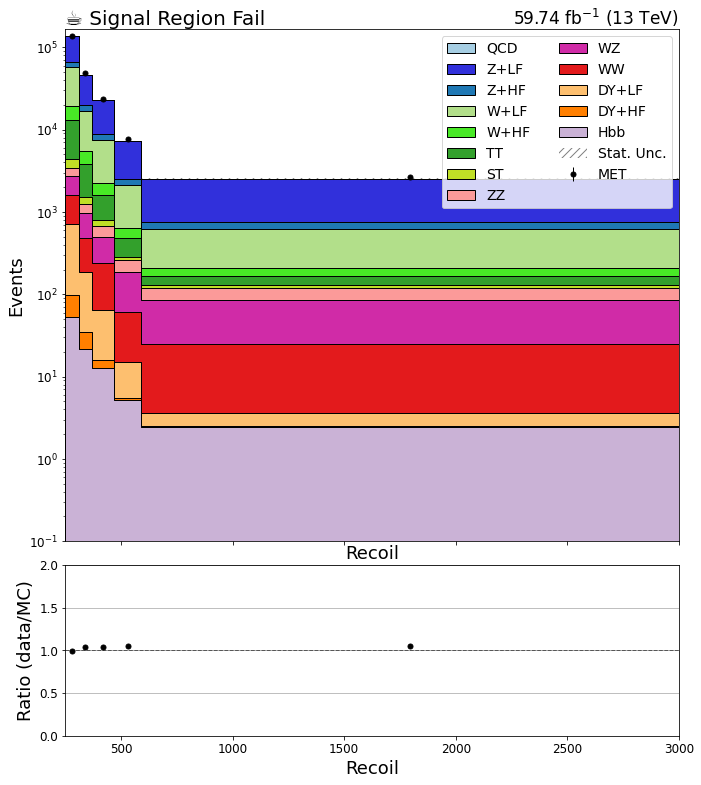

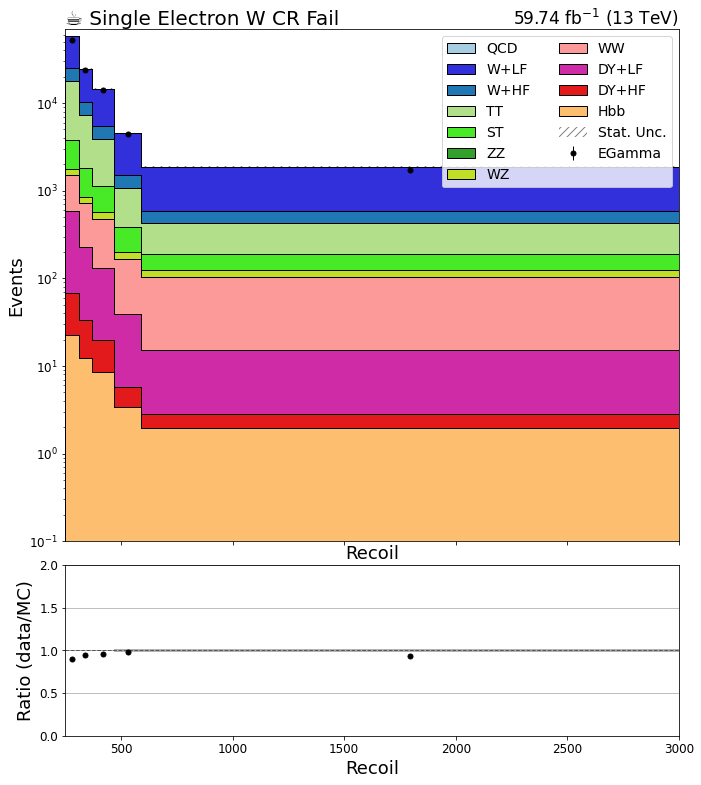

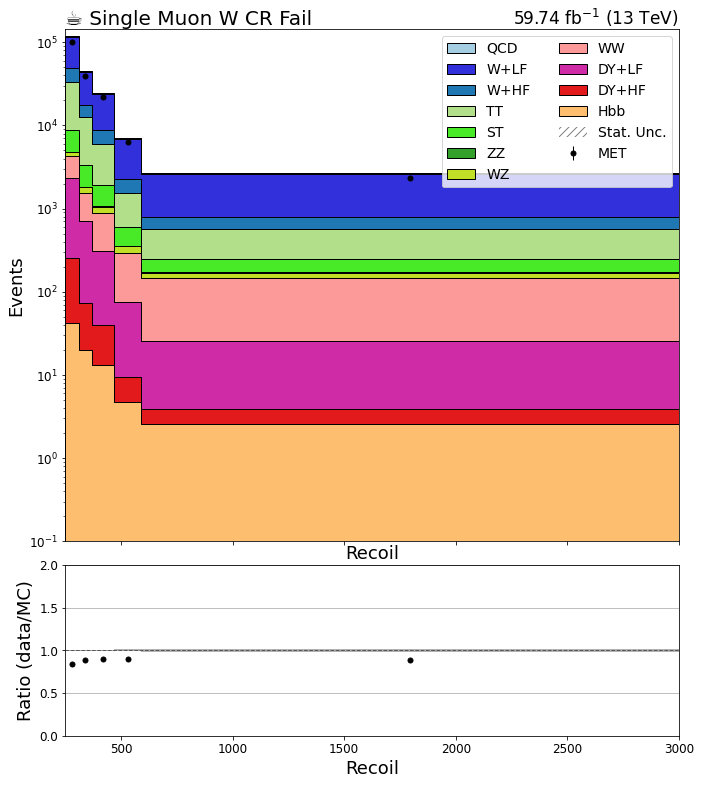

In [15]:
###
# Plot mass or recoil out of template
###

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
    
    
def plot_template(category, var):
    varlist=['recoil','fjmass']
    varlist.remove(var)

    binning={
        'pass': pass_binning,
        'fail': fail_binning,
    }

    C={
        'pass':'Pass',
        'fail':'Fail',
        '':''
    }
    R={
        'sr':'Signal Region',
        'wmcr':'Single Muon W CR',
        'tmcr':'Single Muon Top CR',
        'wecr':'Single Electron W CR',
        'tecr':'Single Electron Top CR'
    }

    #Rebin to pick either pass or fail
    bkg_hists_template=bkg_hists['template']
    signal_hists_template=signal_hists['template']
    data_hists_template=data_hists['template']
    if category is not '':
        bkg_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
        signal_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
        data_hists_template.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
        

    for j in bkg_hists_template.identifiers('region'):
        if 't' in str(j) and category=='fail': continue
        #if not (str(j) == 'tecr'): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))

       
        plot.plot1d(bkg_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD'),
                        overlay="process",
                        ax=ax,
                        clear=False,
                        stack=True,
                        fill_opts=fill_opts,
                        error_opts=error_opts
                        )
    
        if not ('sr' in str(j) and category=='pass'):

            plot.plot1d(data_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD')[data[year][str(j)]],            
                        overlay="process",
                        ax=ax,
                        clear=False,
                        error_opts=data_err_opts
                        )
        
            plot.plotratio(data_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD').integrate('process',data[year][str(j)]), 
                       bkg_hists_template.integrate('region',j).integrate('systematic','nominal').sum(varlist[0],'ZHbbvsQCD').sum('process'),
                       ax=rax,
                       #overflow='over',
                       error_opts=data_err_opts,
                       denom_fill_opts={},
                       guide_opts={},
                       unc='num'
                       )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')

        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')

        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]]+" "+C[category], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ../plots/darkhiggs'+year+'/prefit/'+str(j)+'_'+category+'/')
        plot_path = os.path.abspath('../plots/darkhiggs'+year+'/prefit/'+str(j)+'_'+category+'/') 
        plot_name = 'stack_'+var+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))
        
plot_template('pass', 'fjmass')
plot_template('fail', 'fjmass')
plot_template('pass', 'recoil')
plot_template('fail', 'recoil')

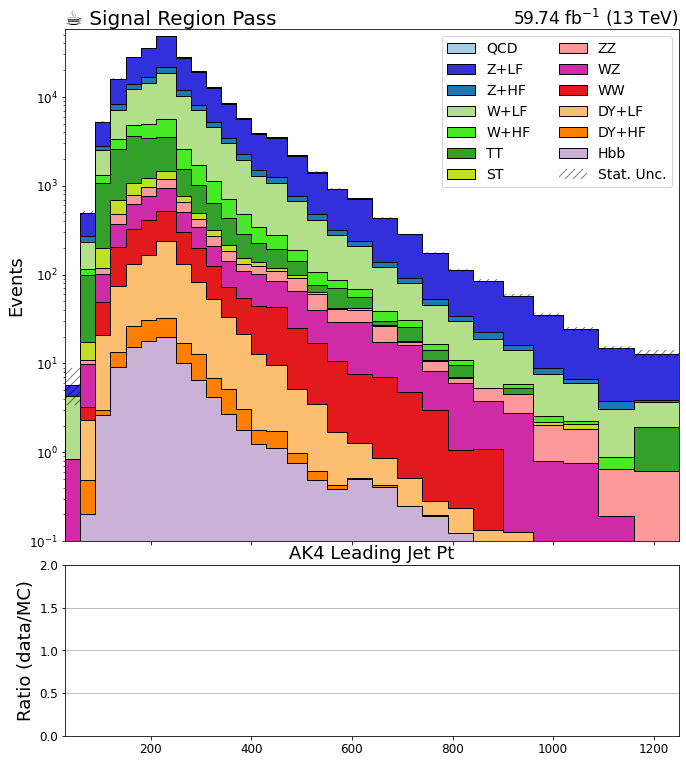

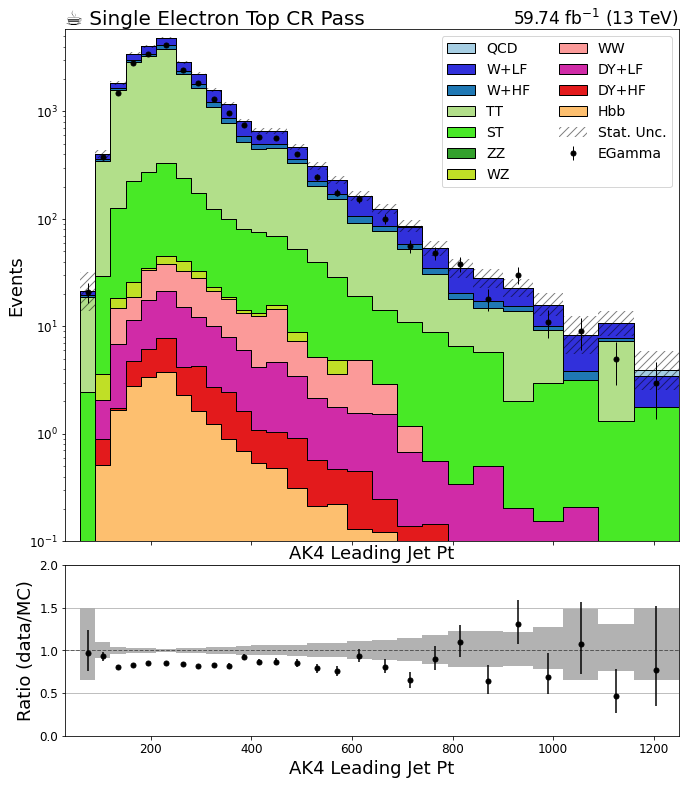

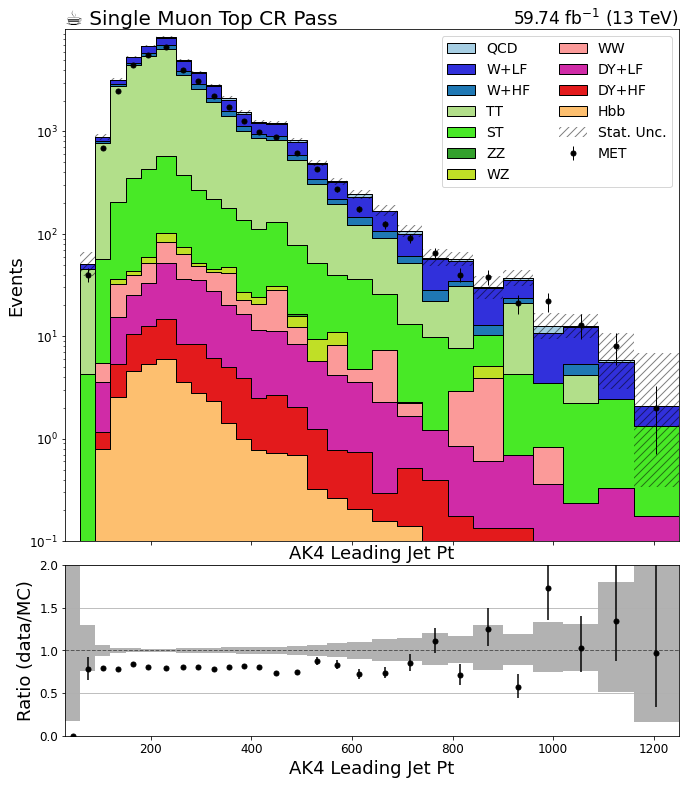

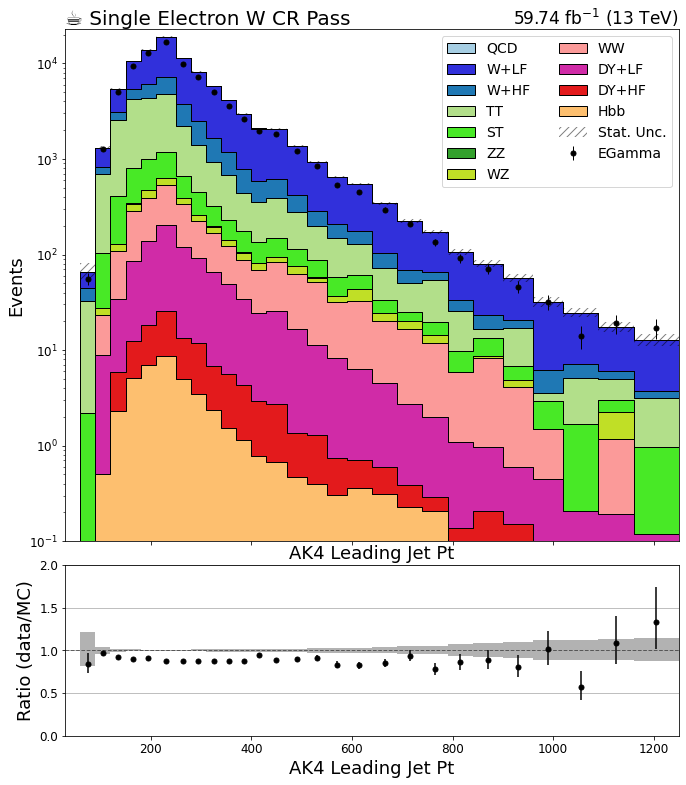

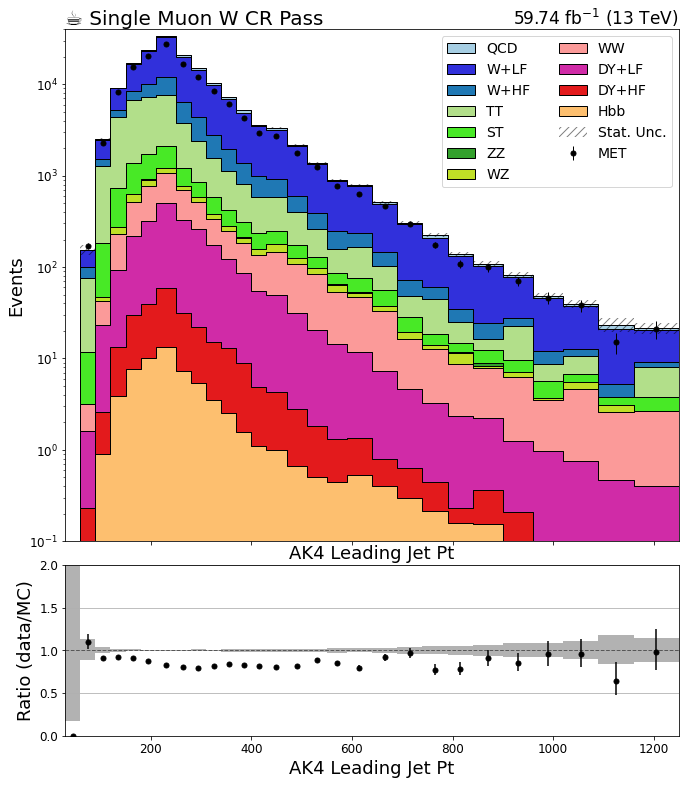

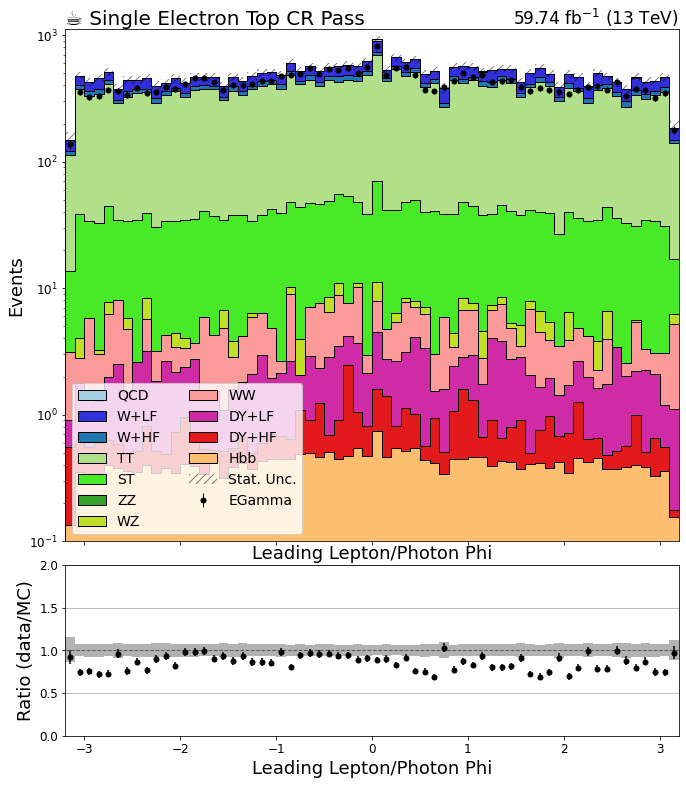

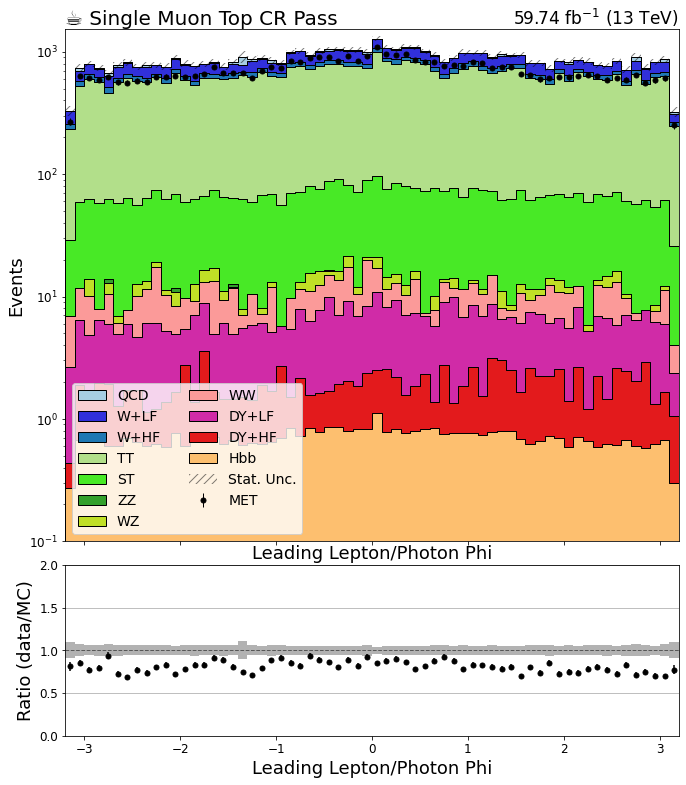

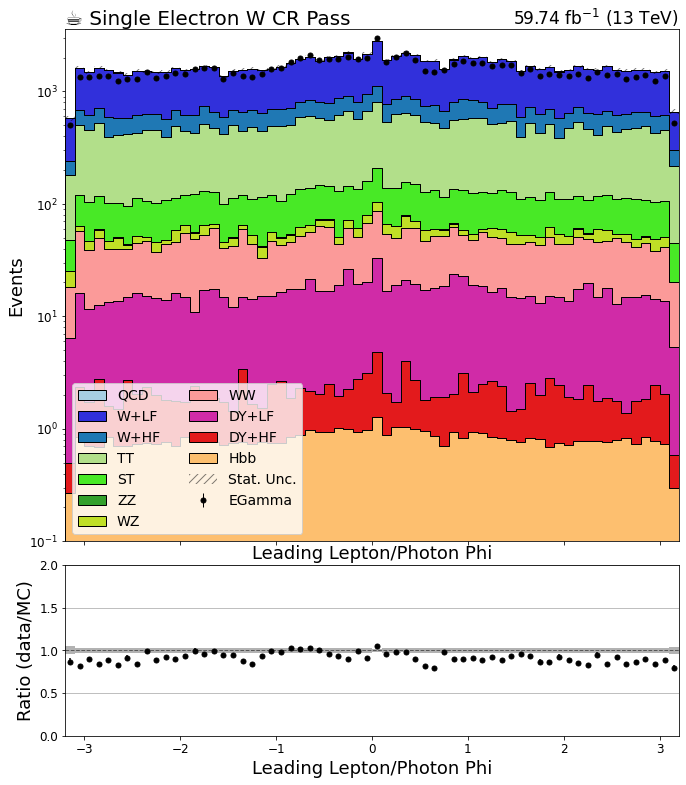

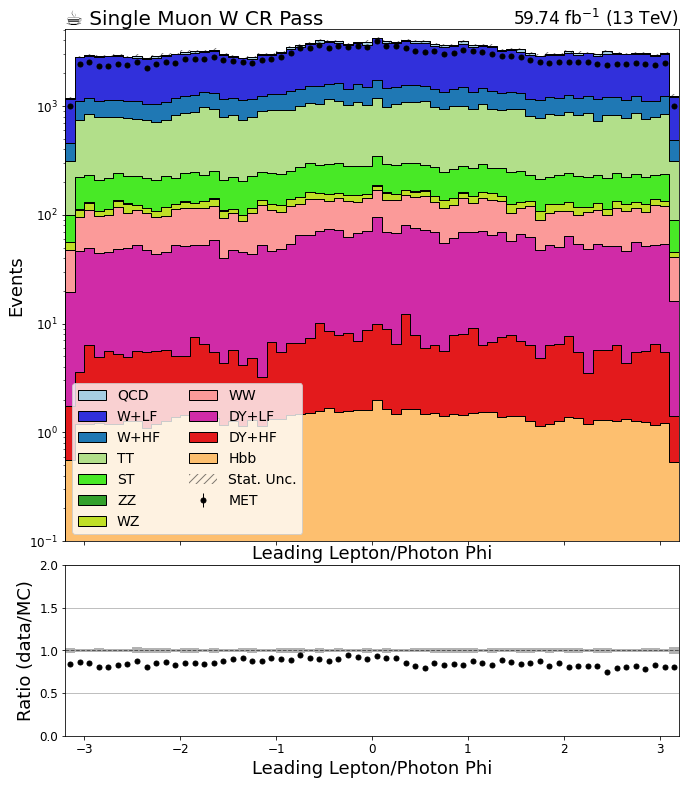

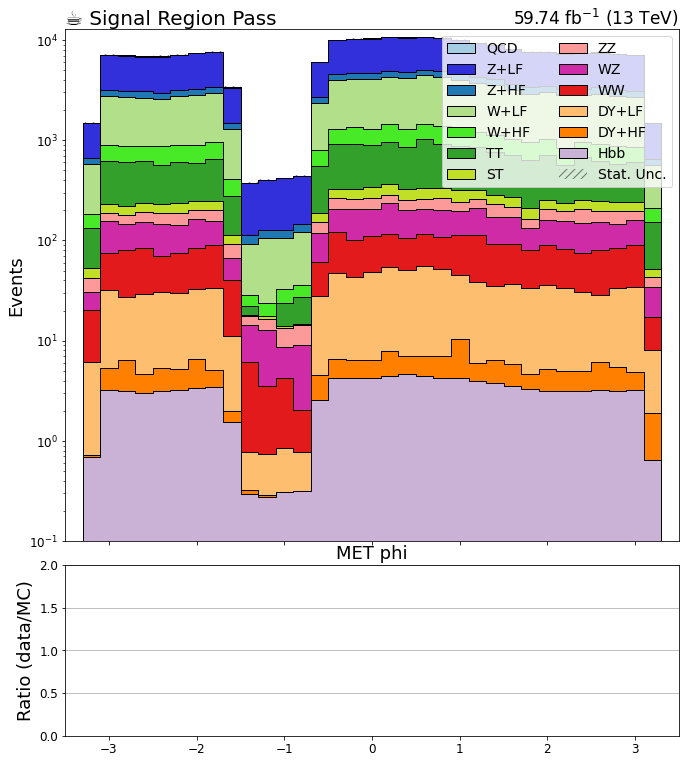

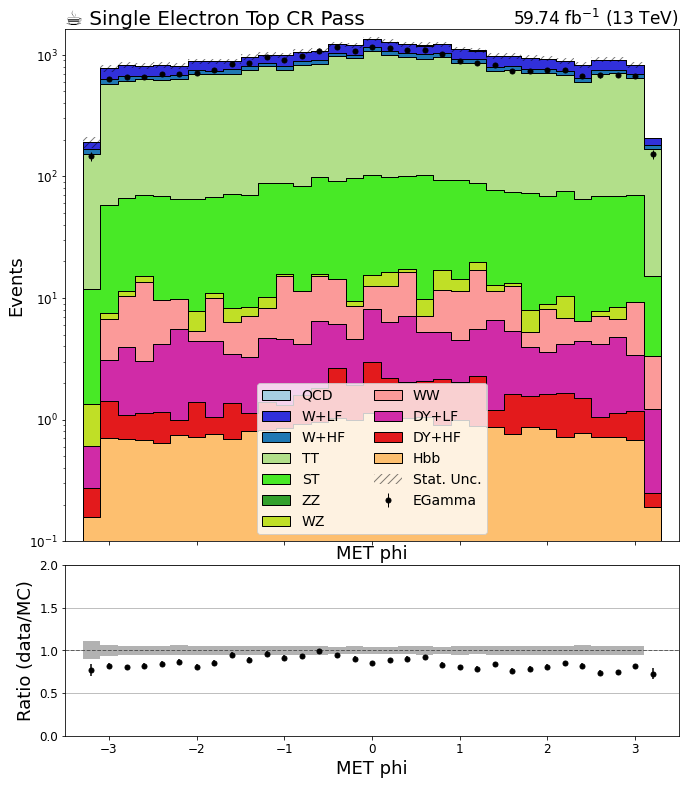

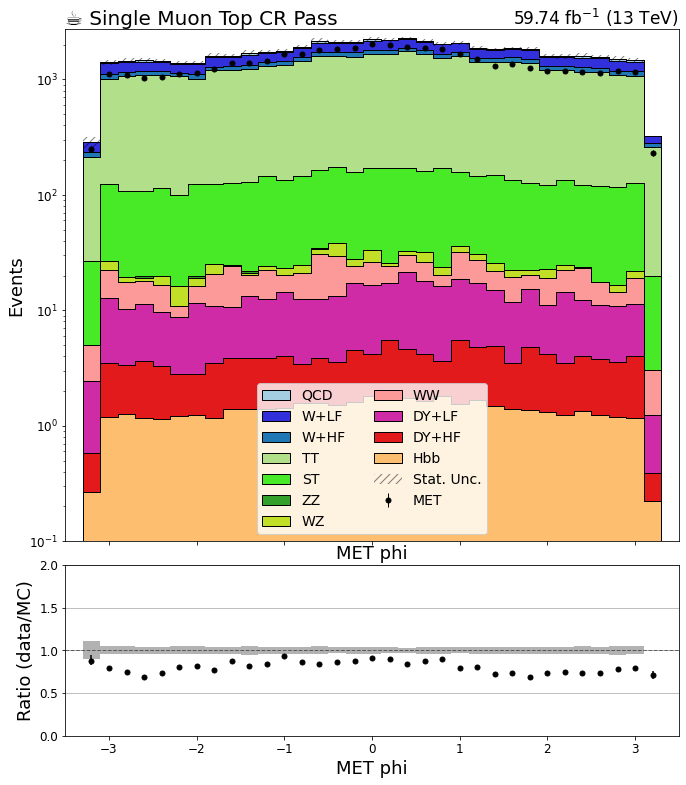

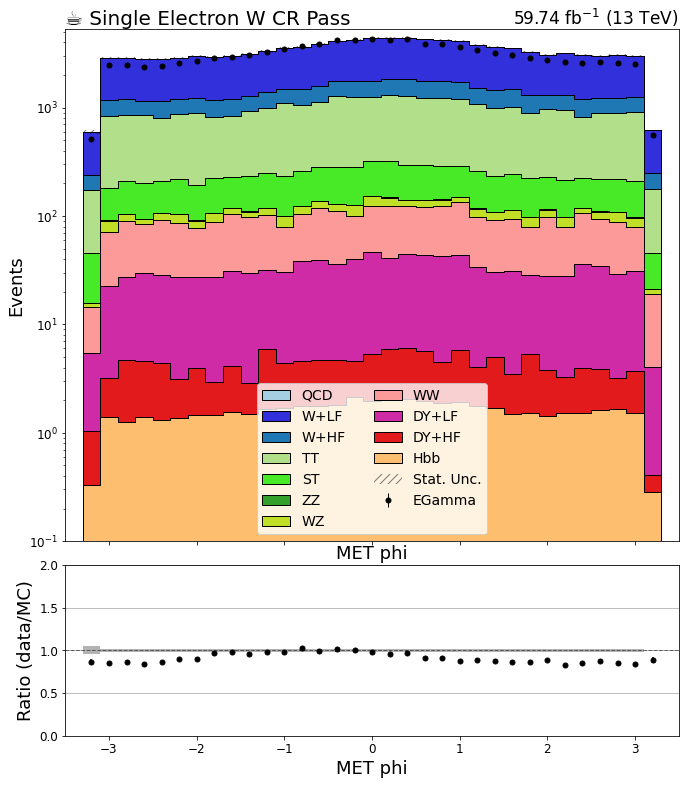

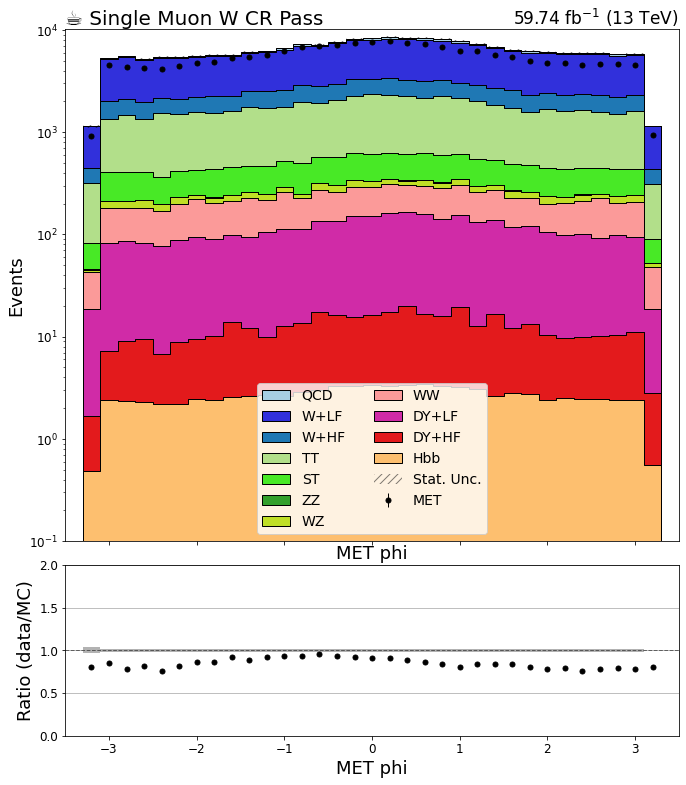

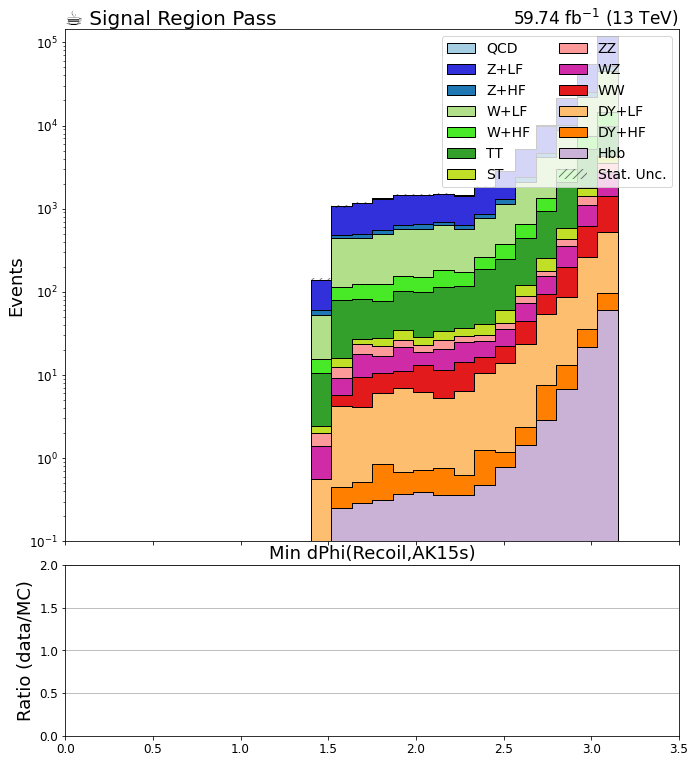

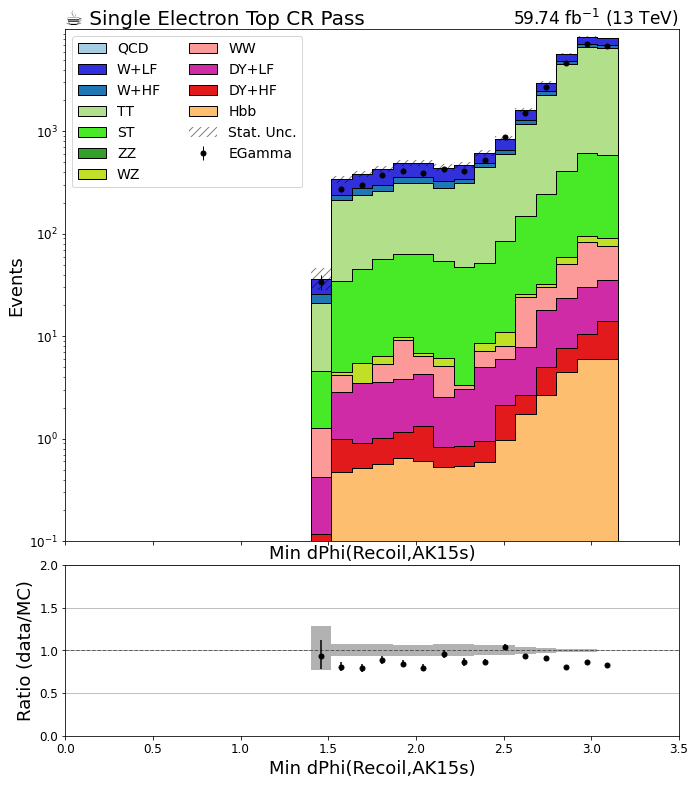

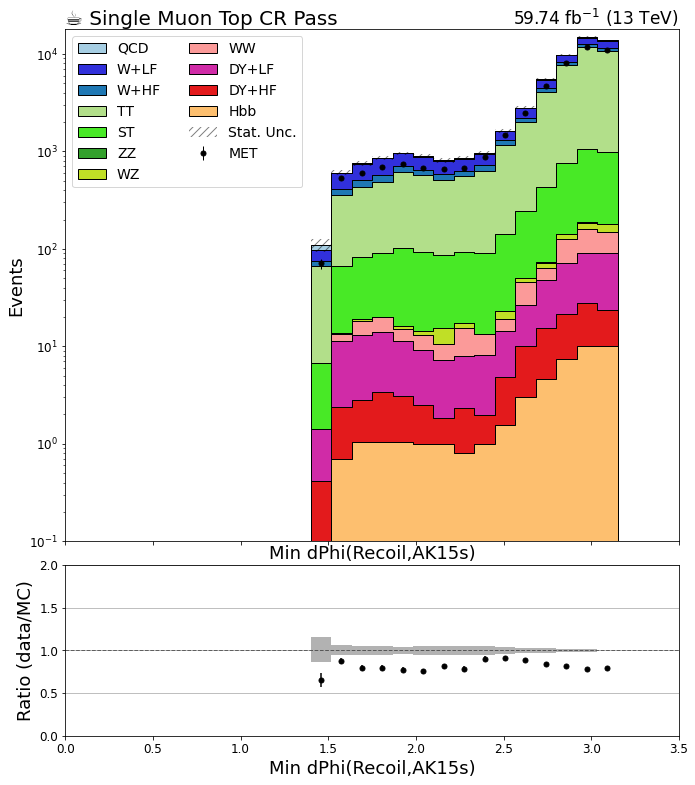

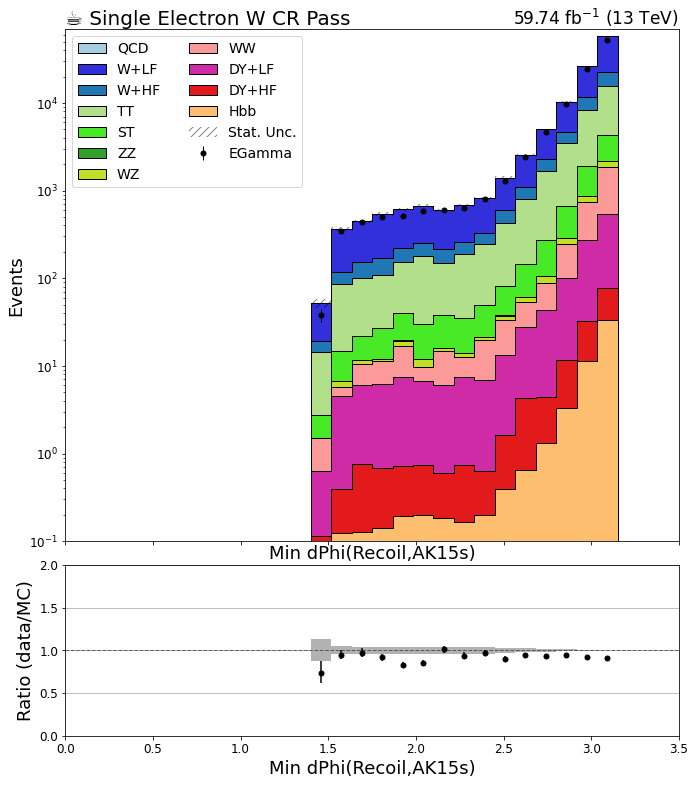

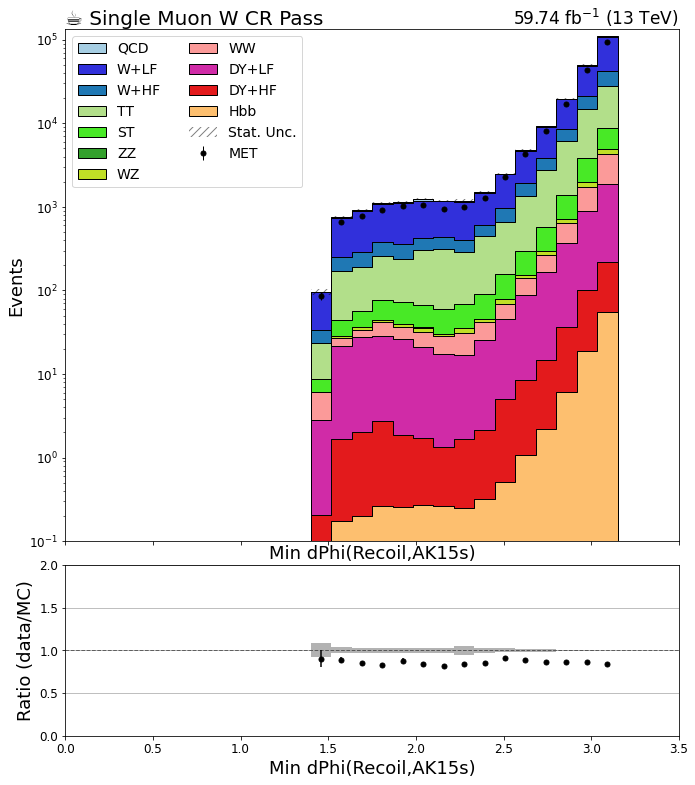

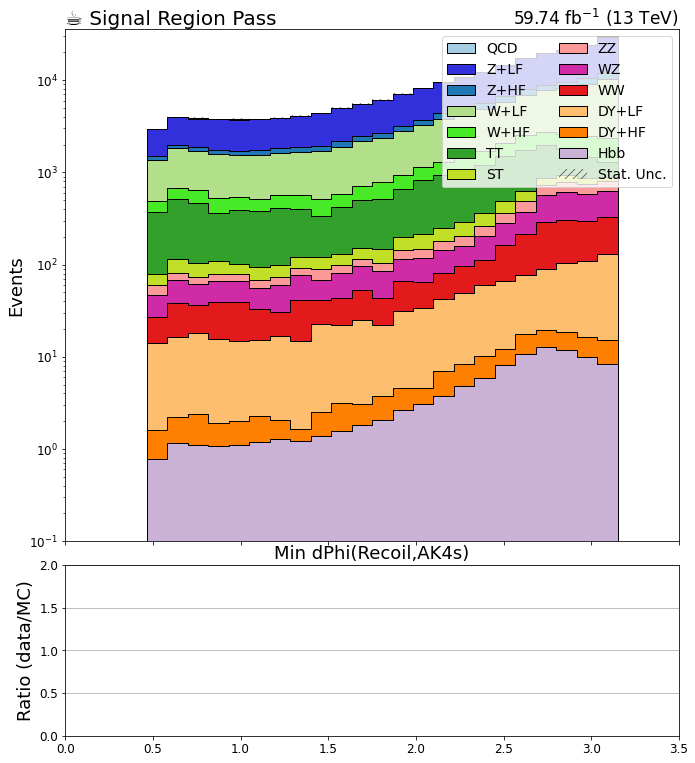

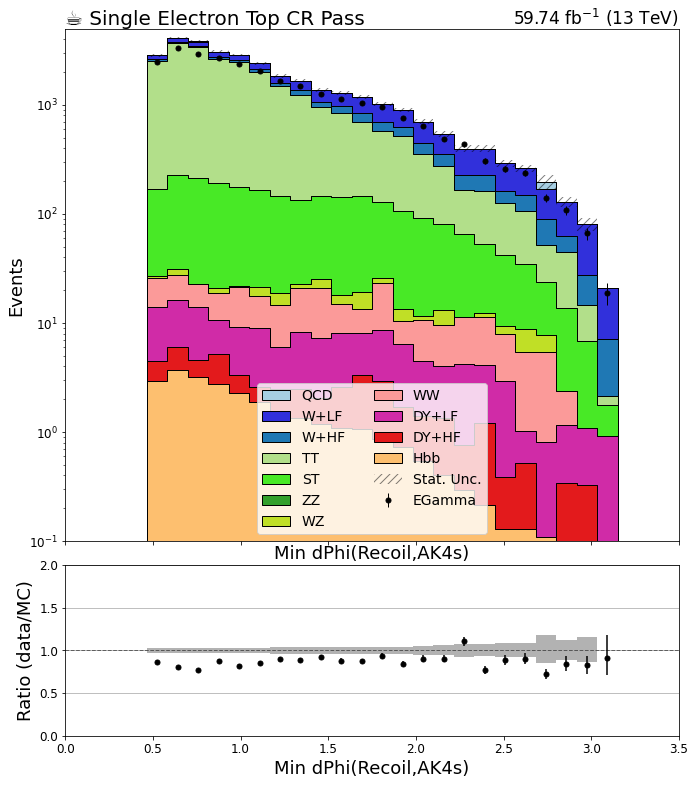

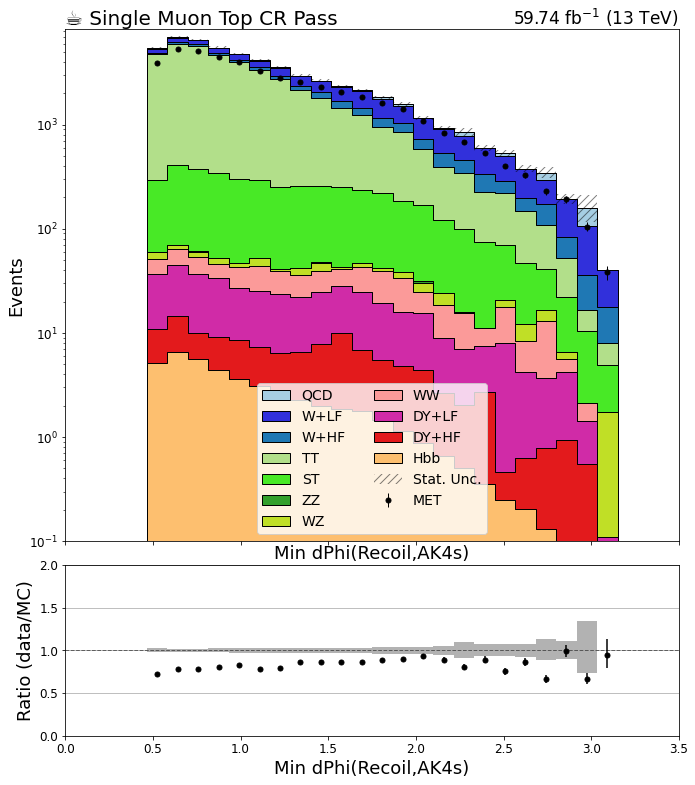

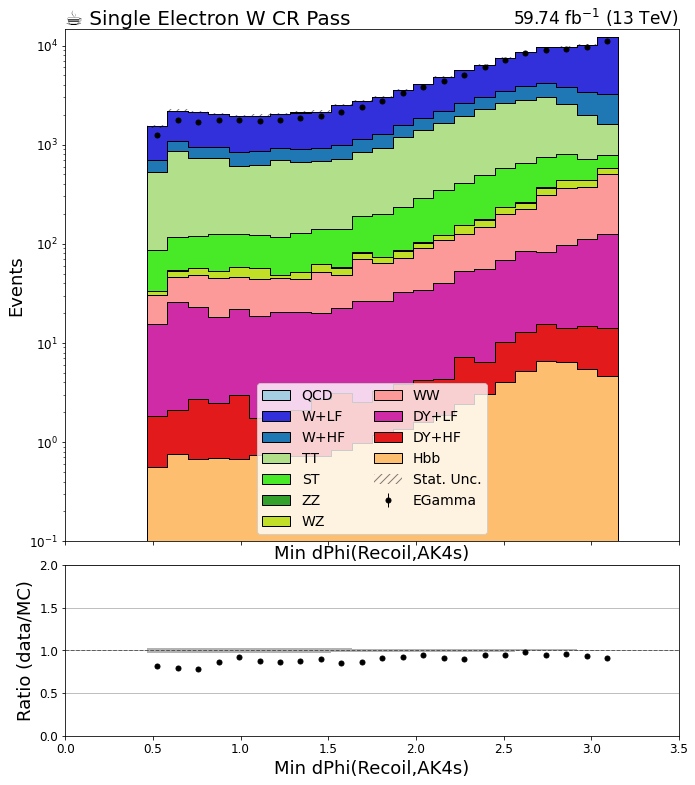

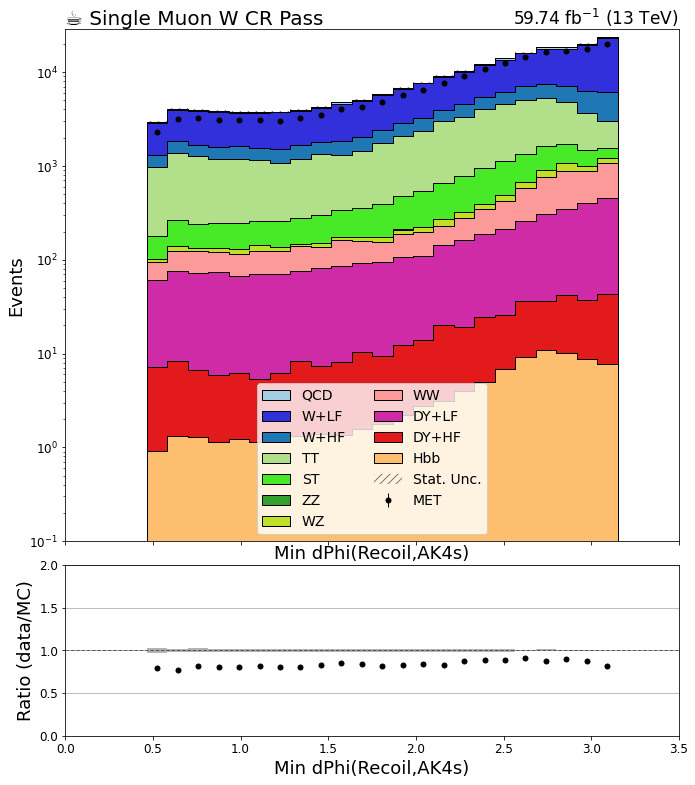

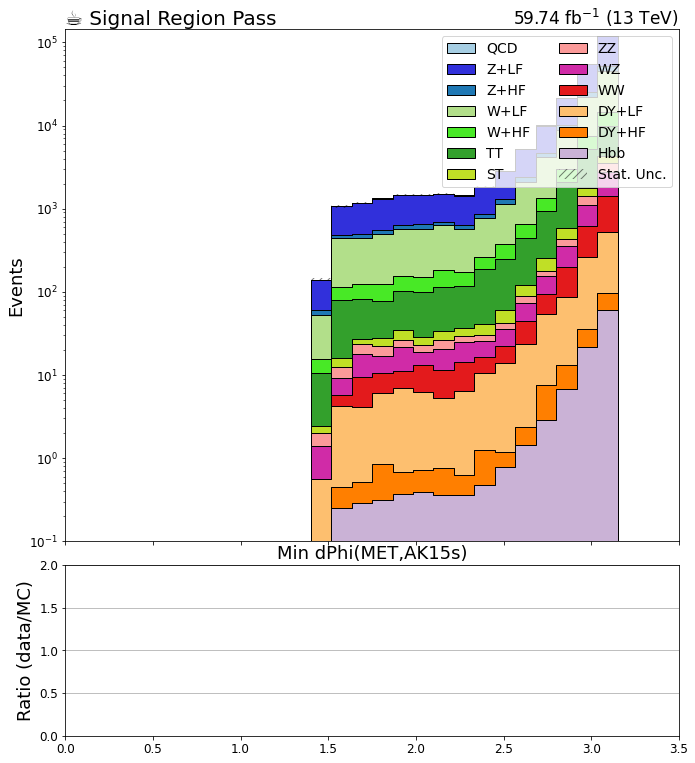

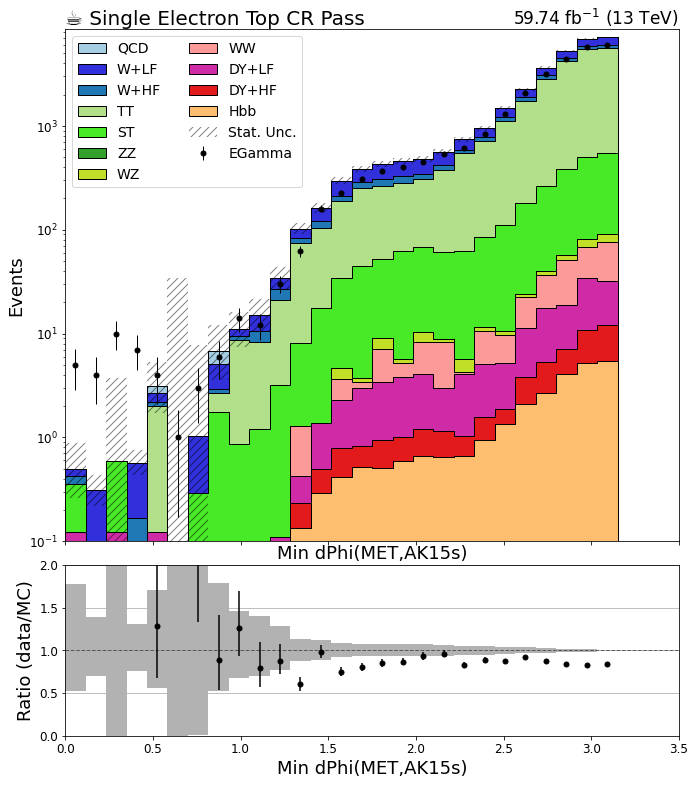

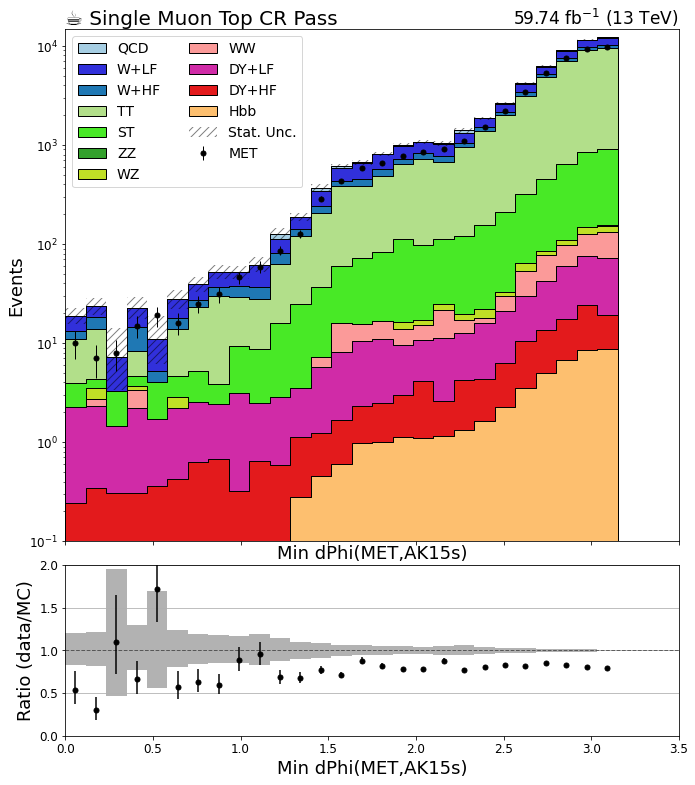

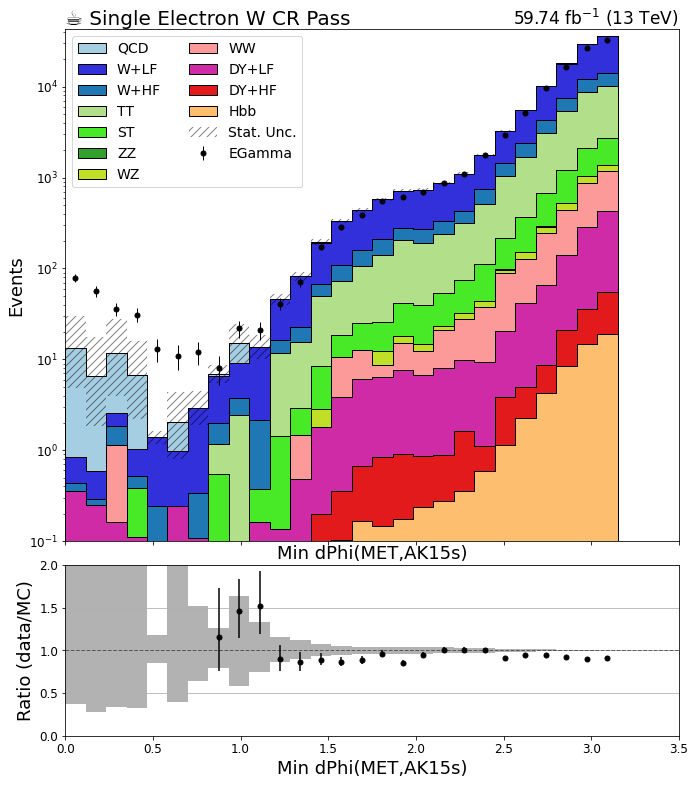

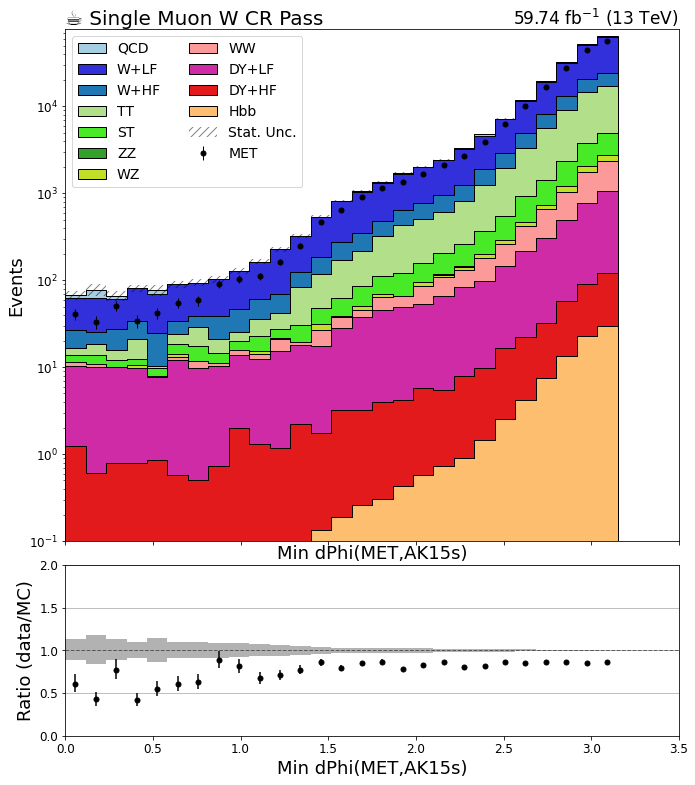

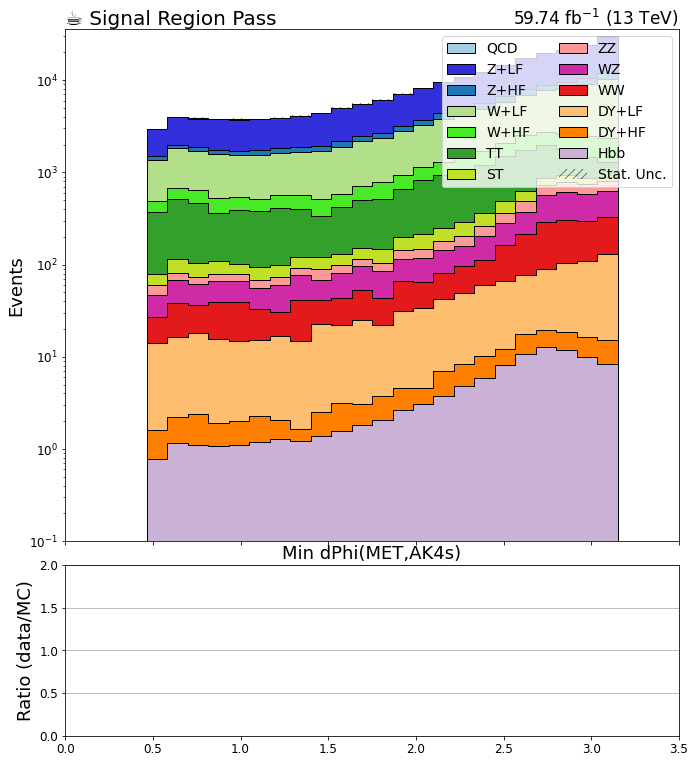

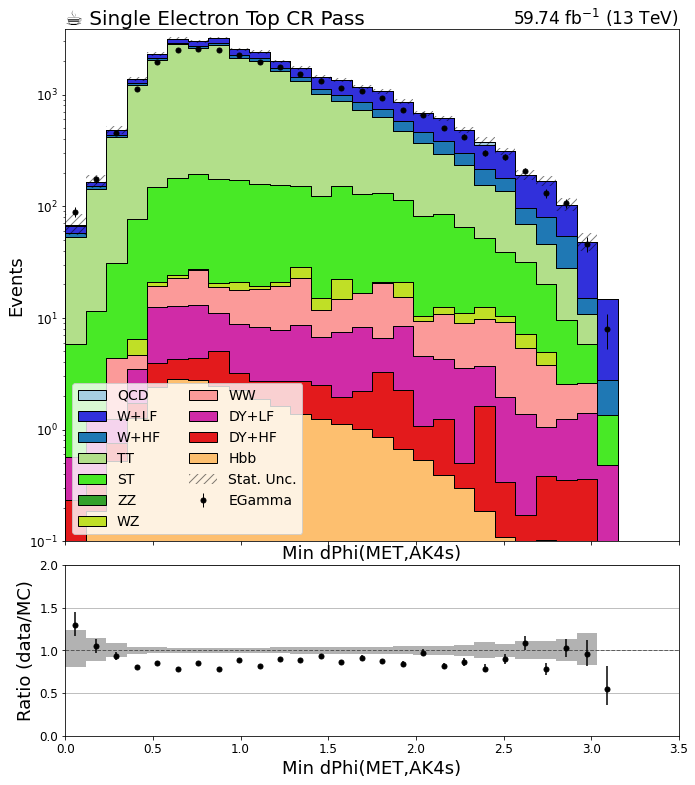

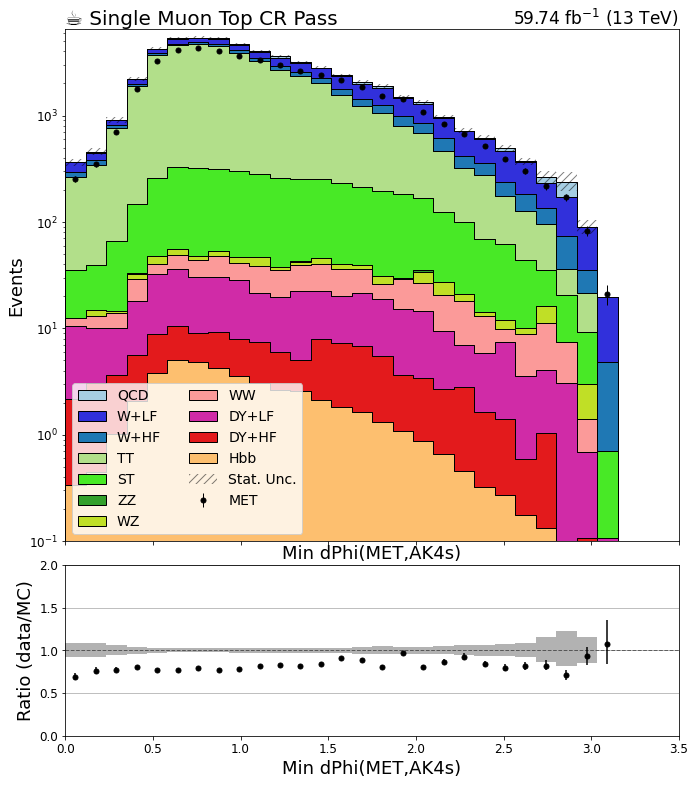

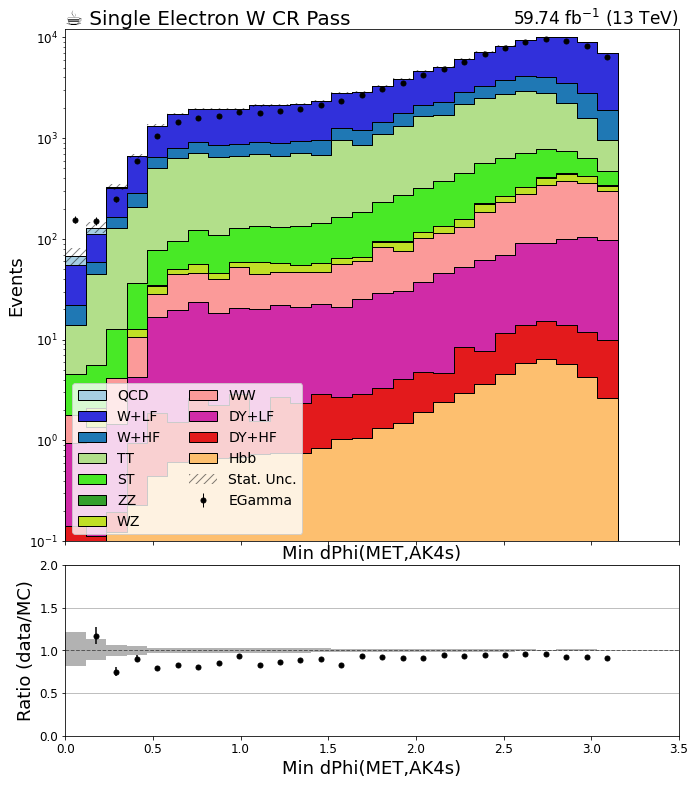

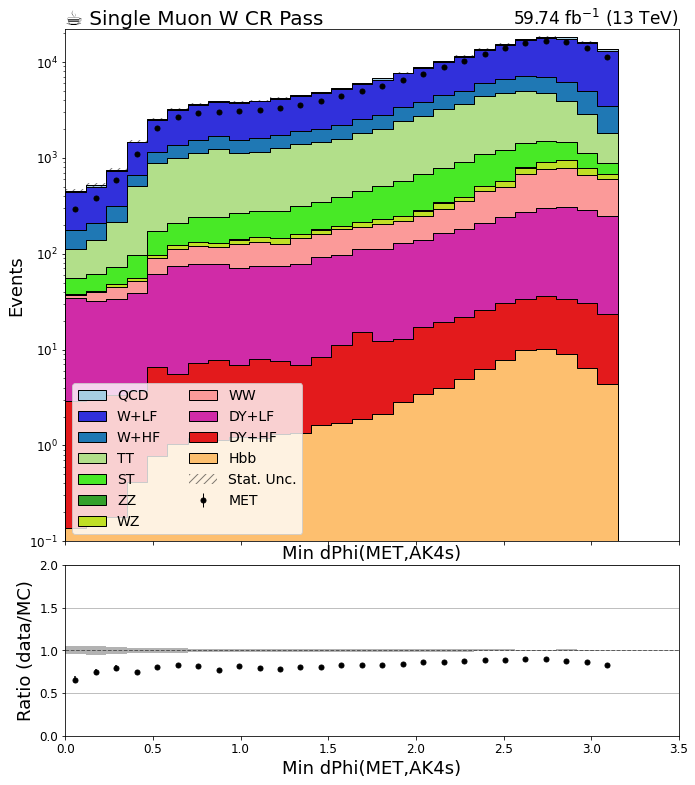

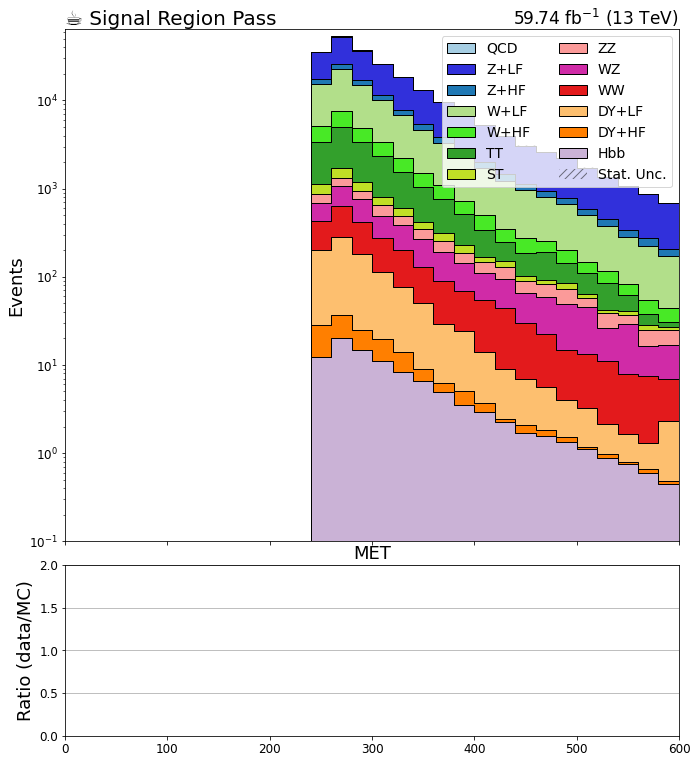

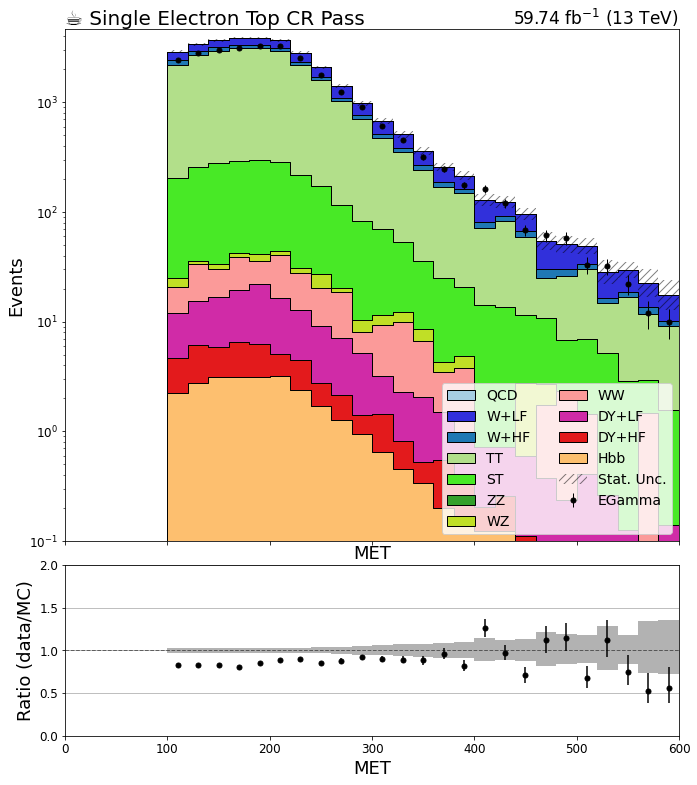

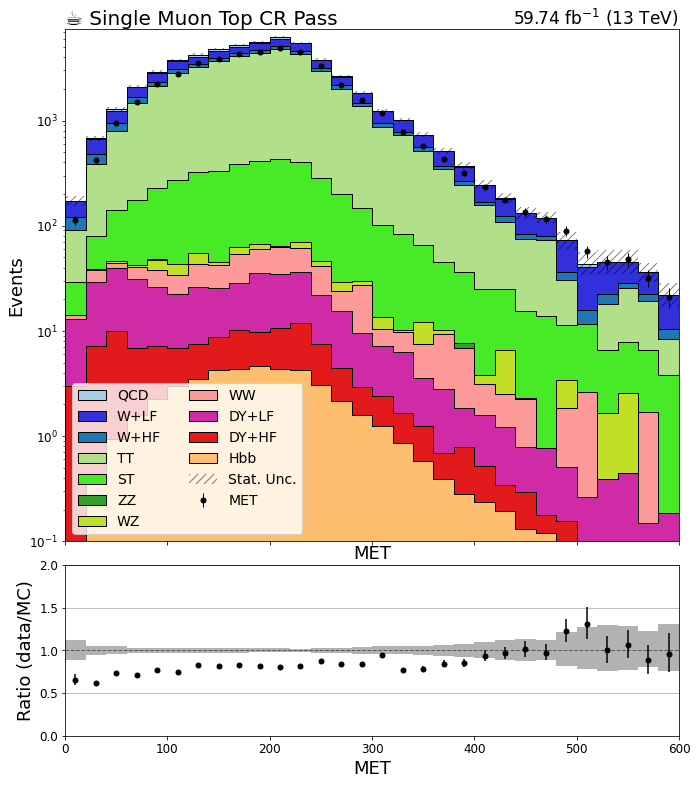

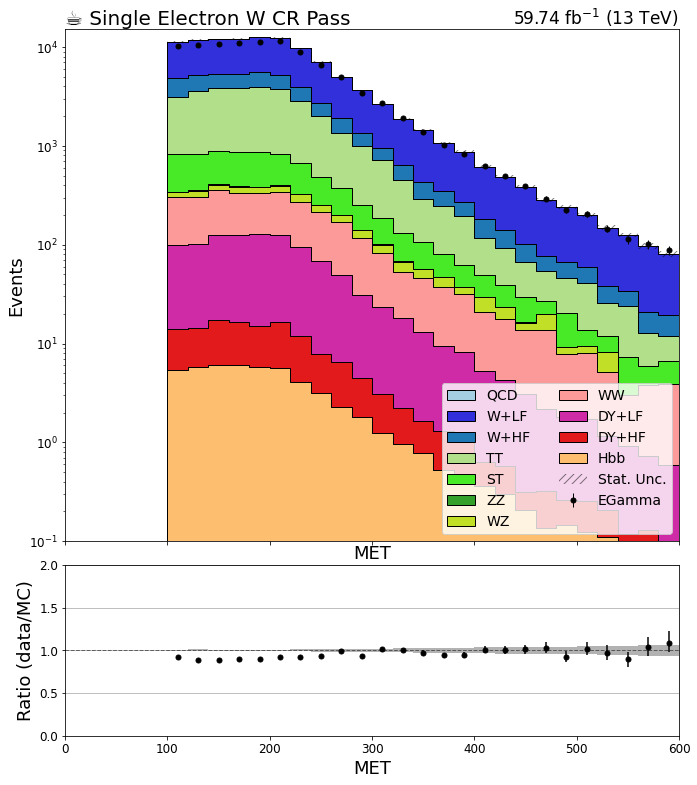

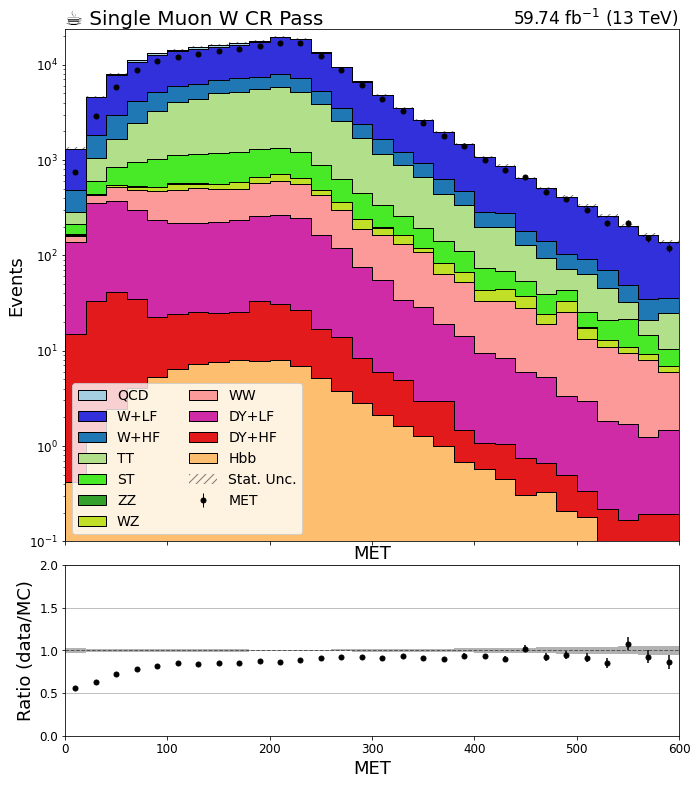

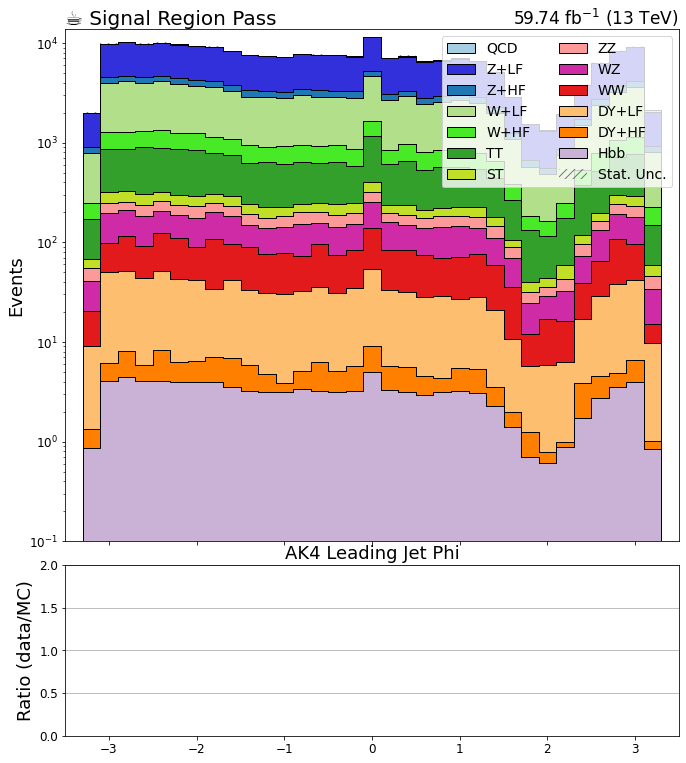

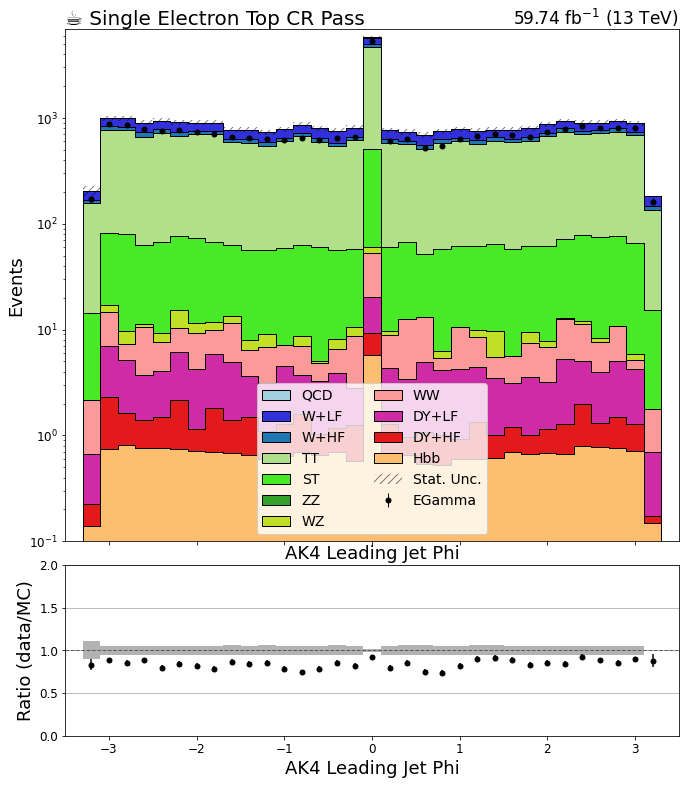

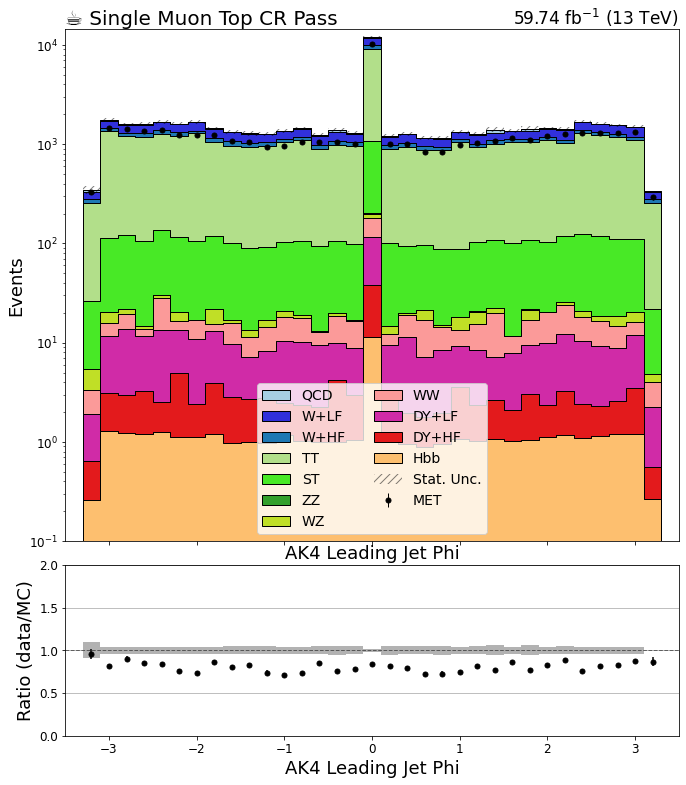

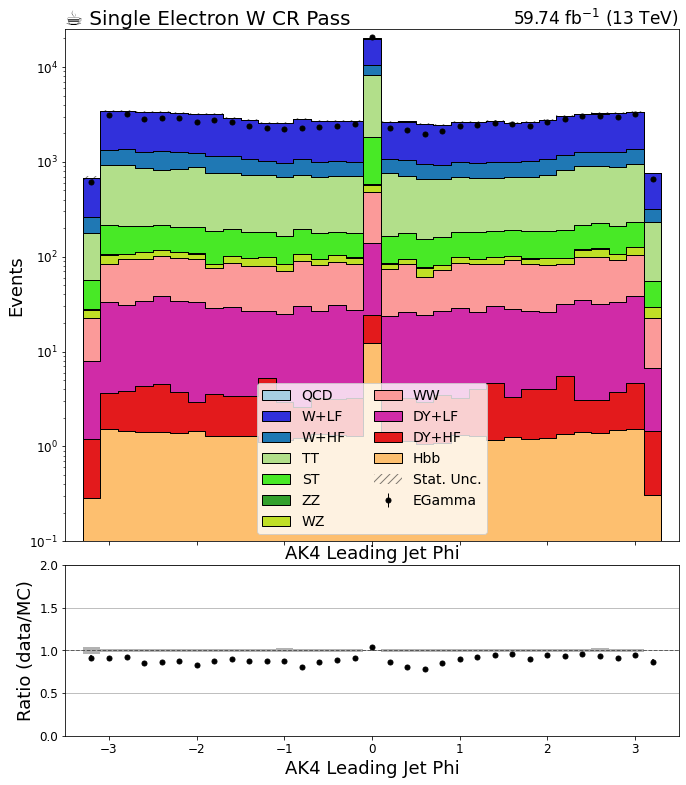

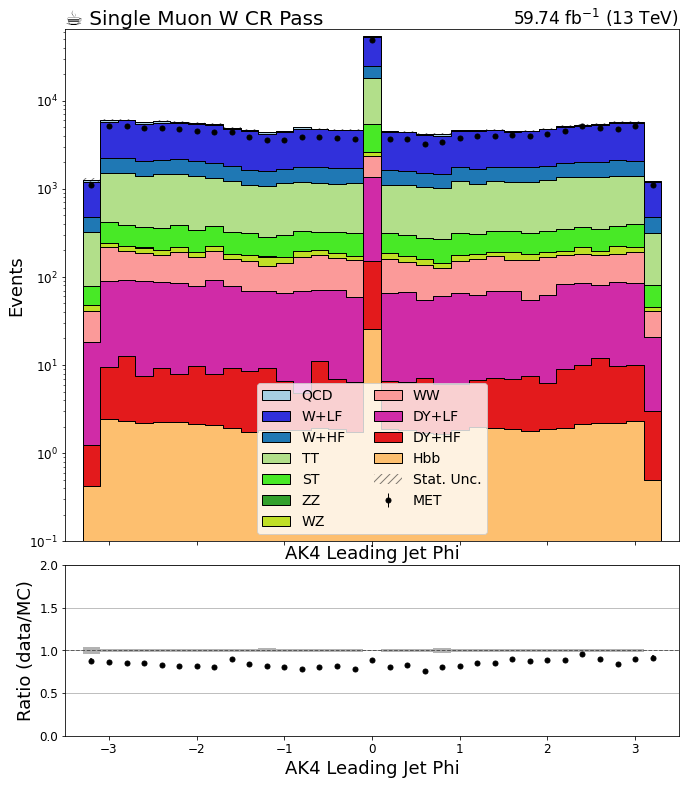

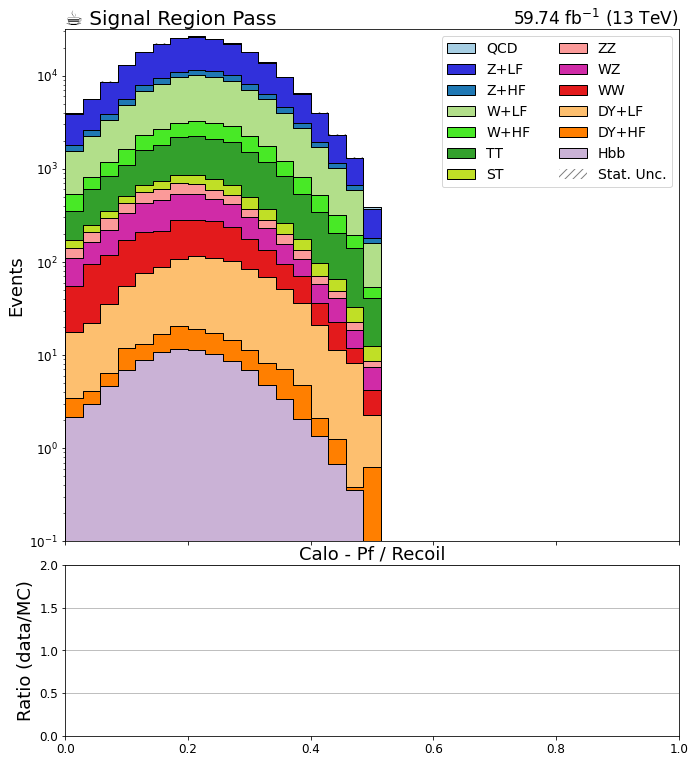

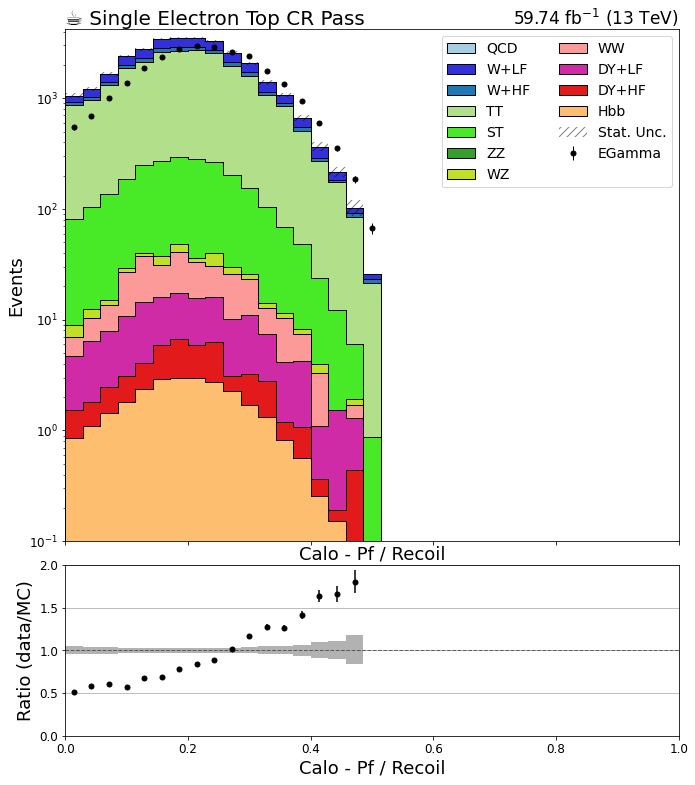

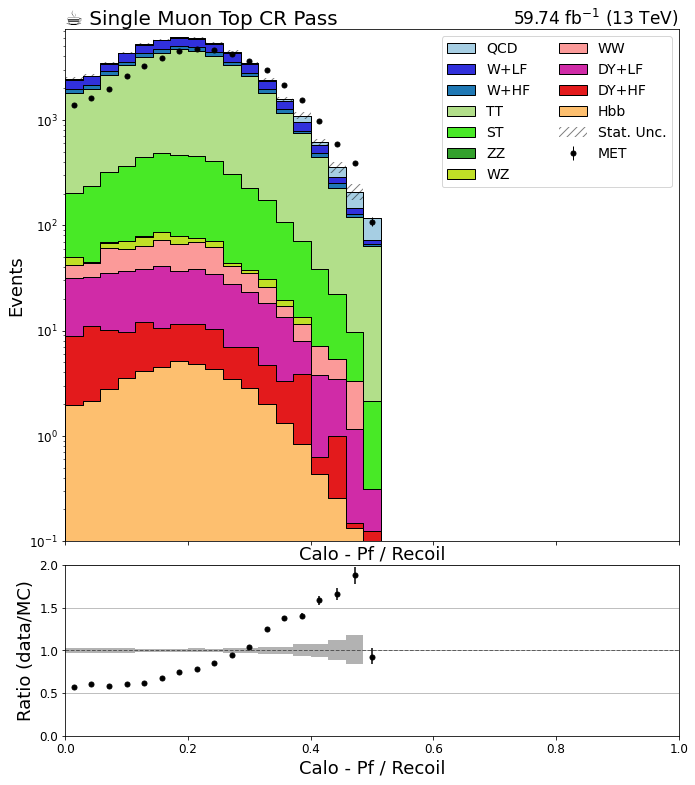

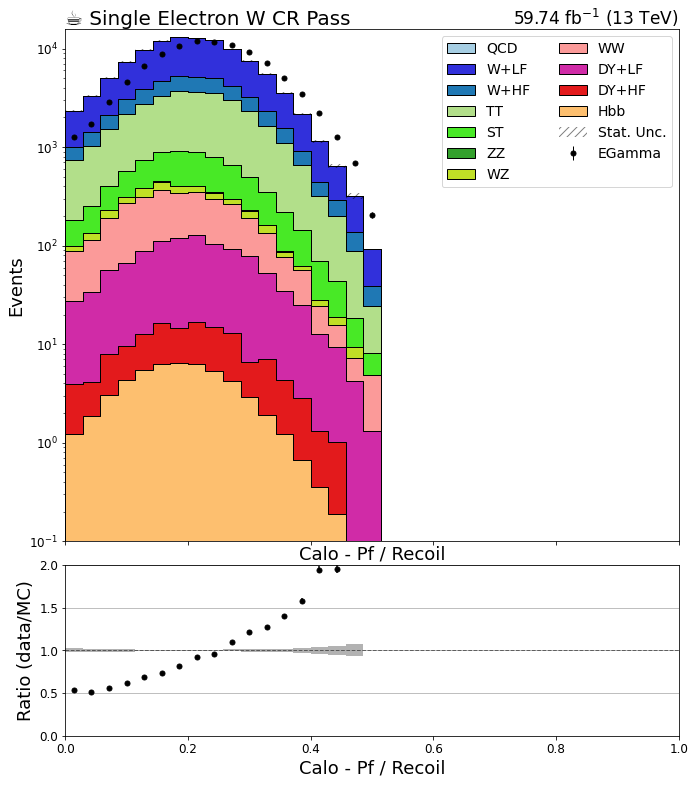

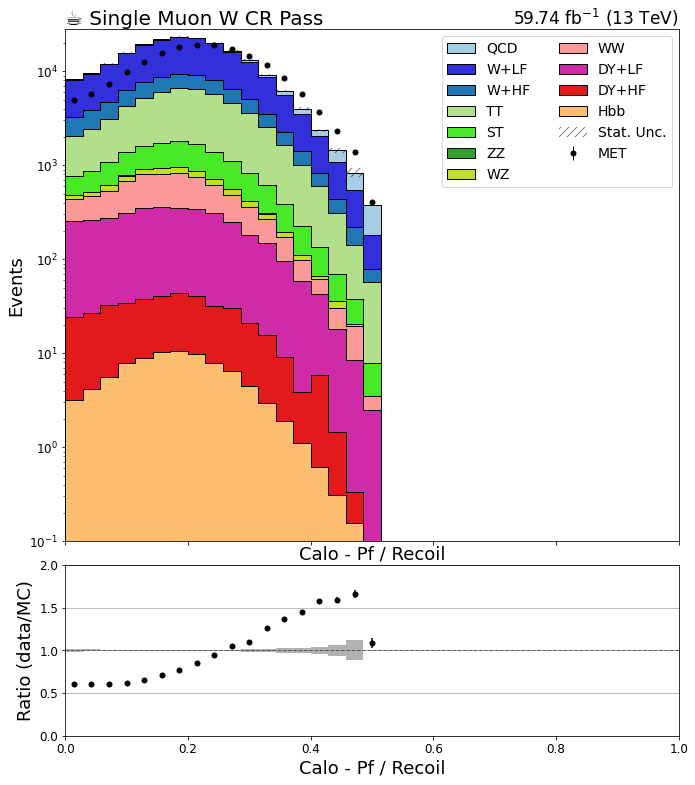

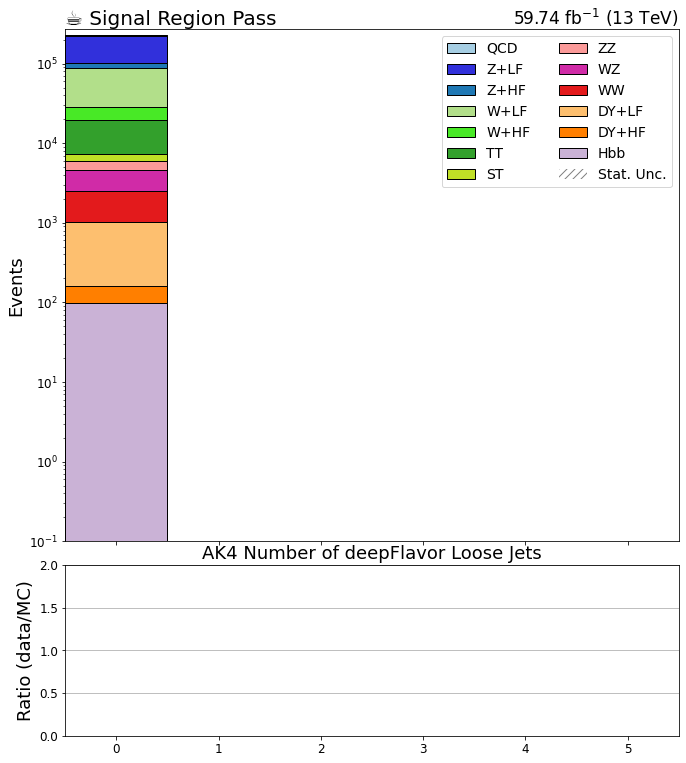

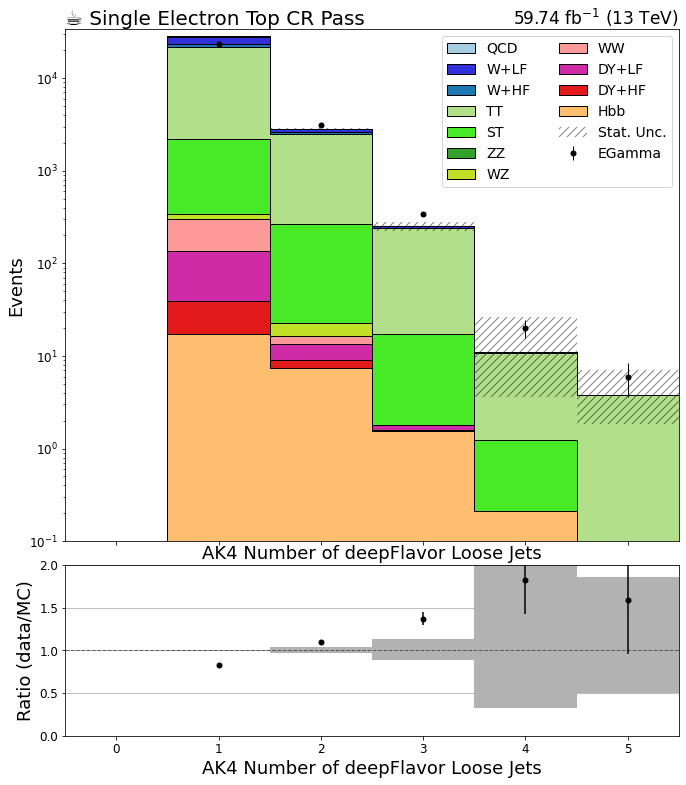

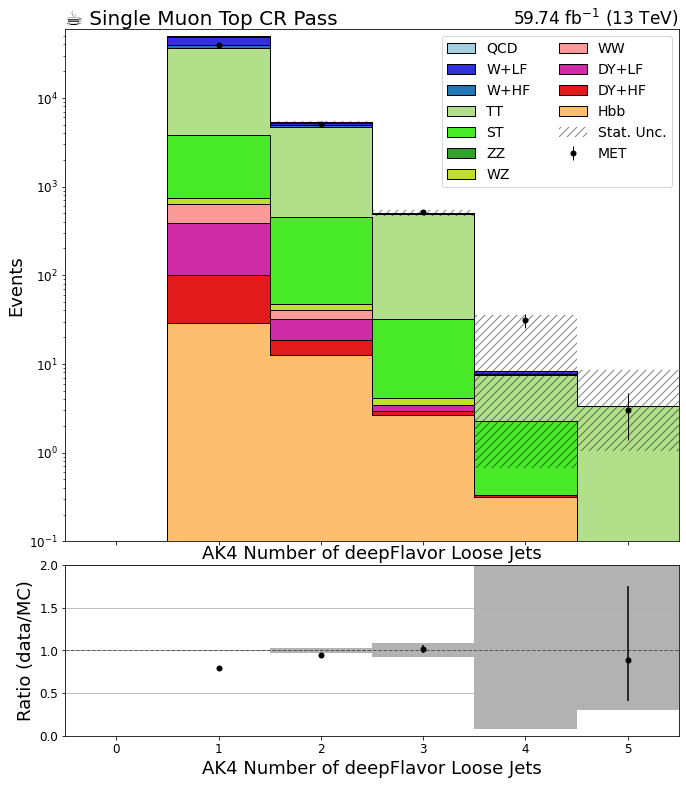

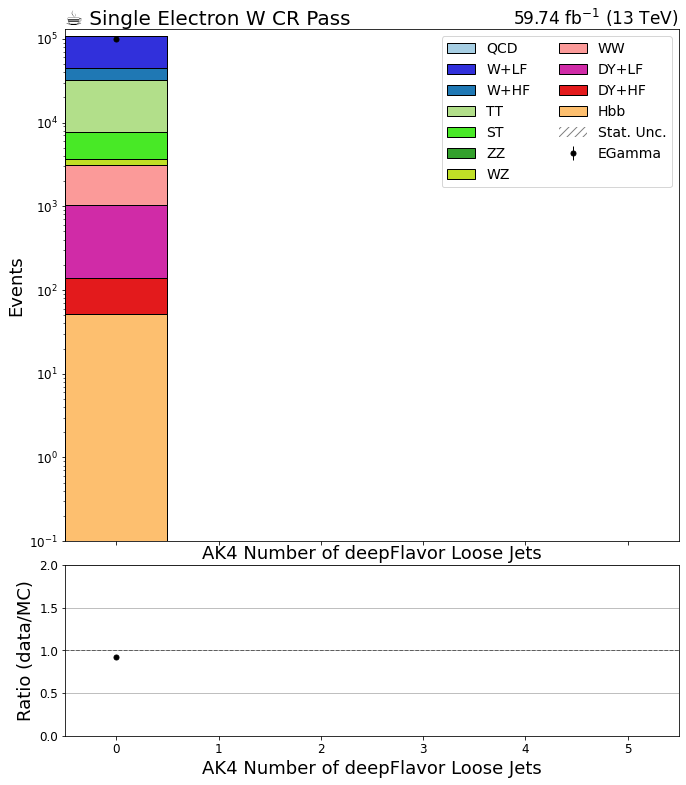

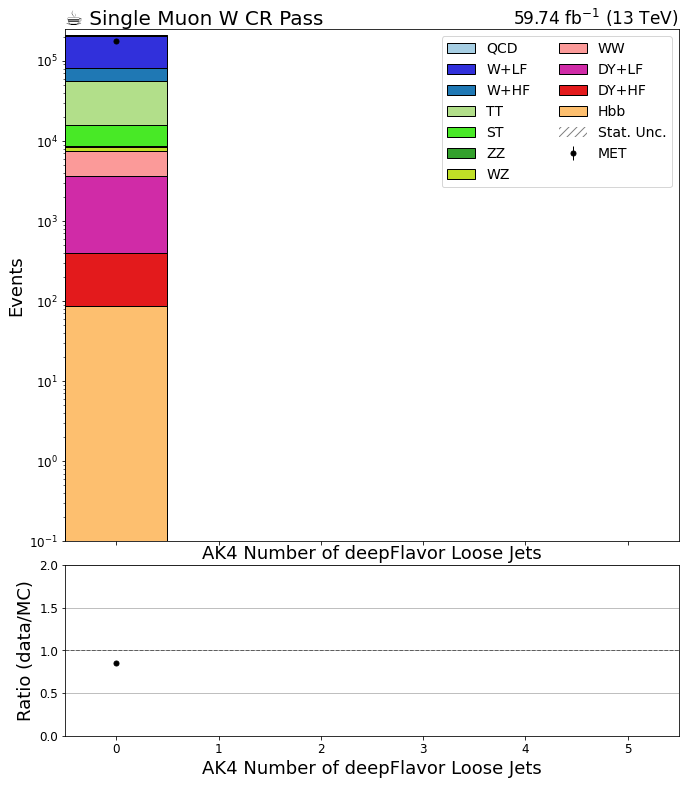

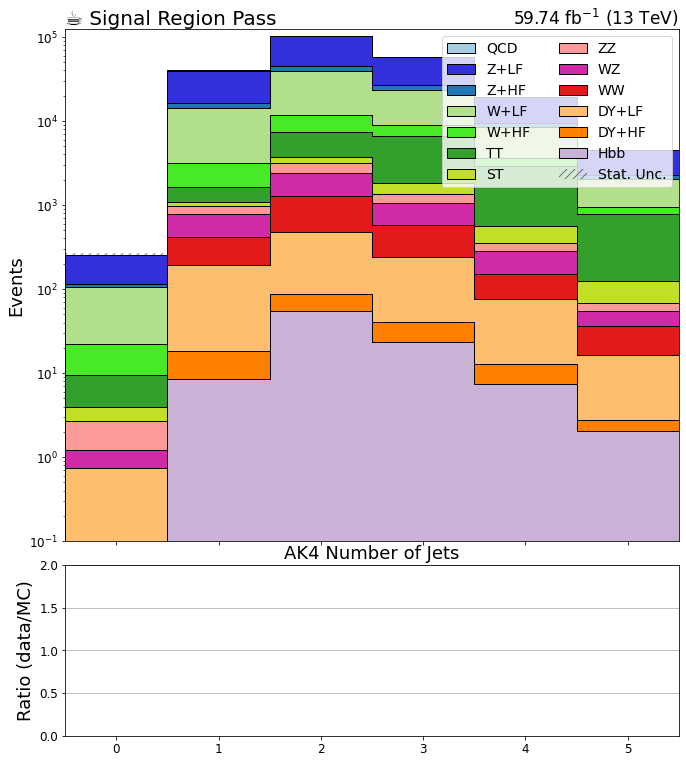

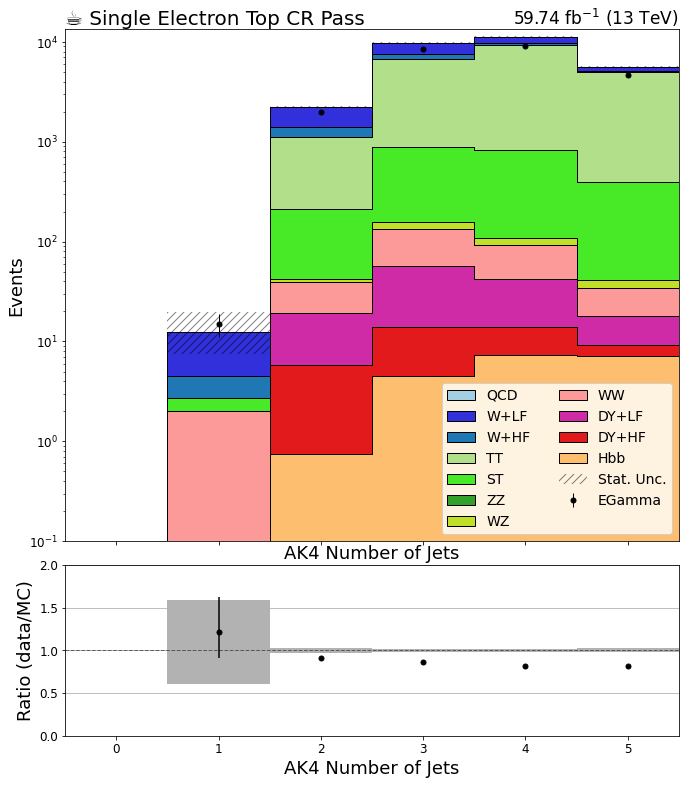

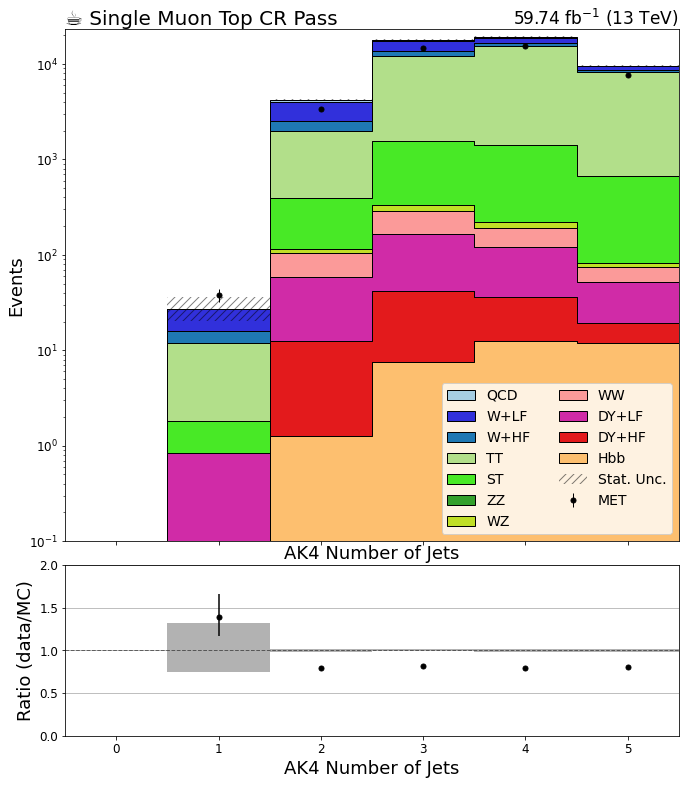

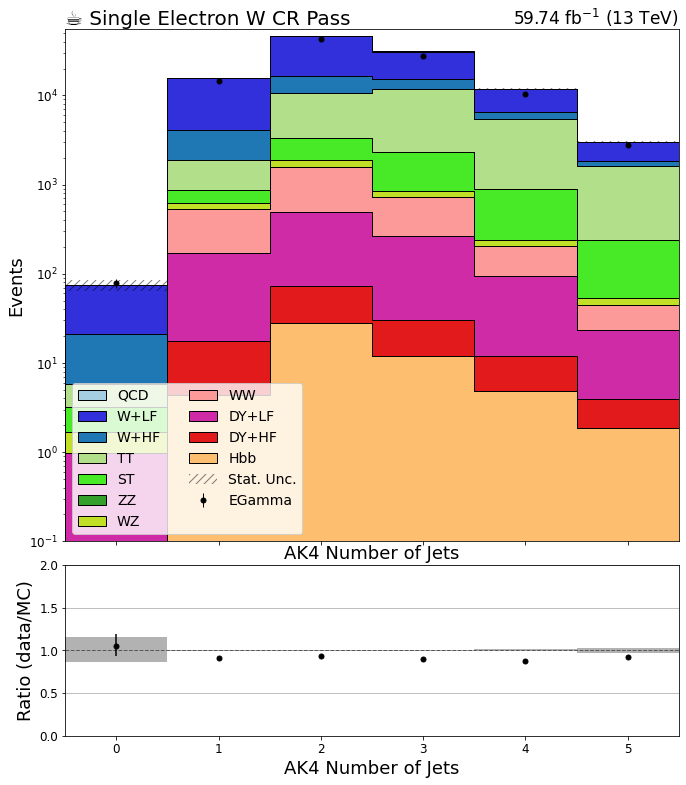

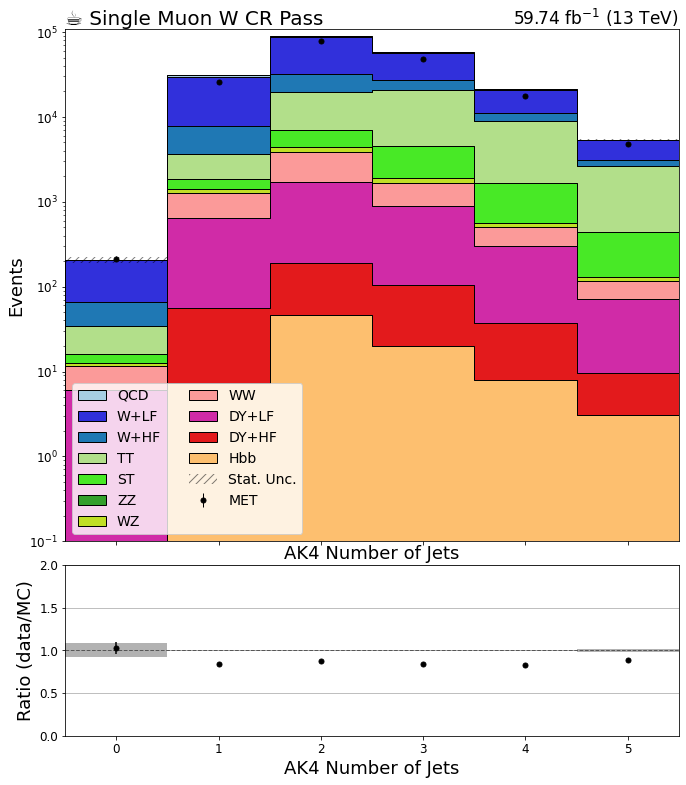

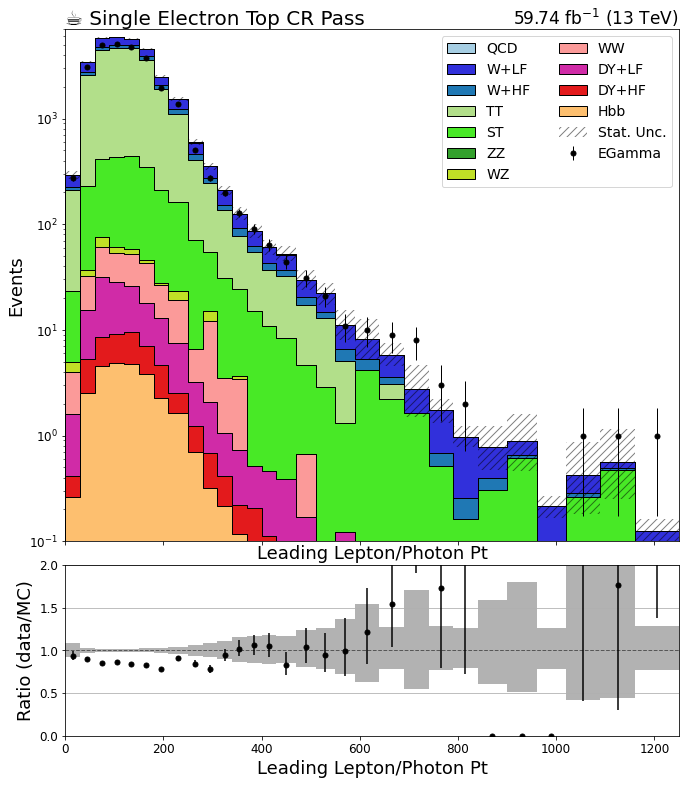

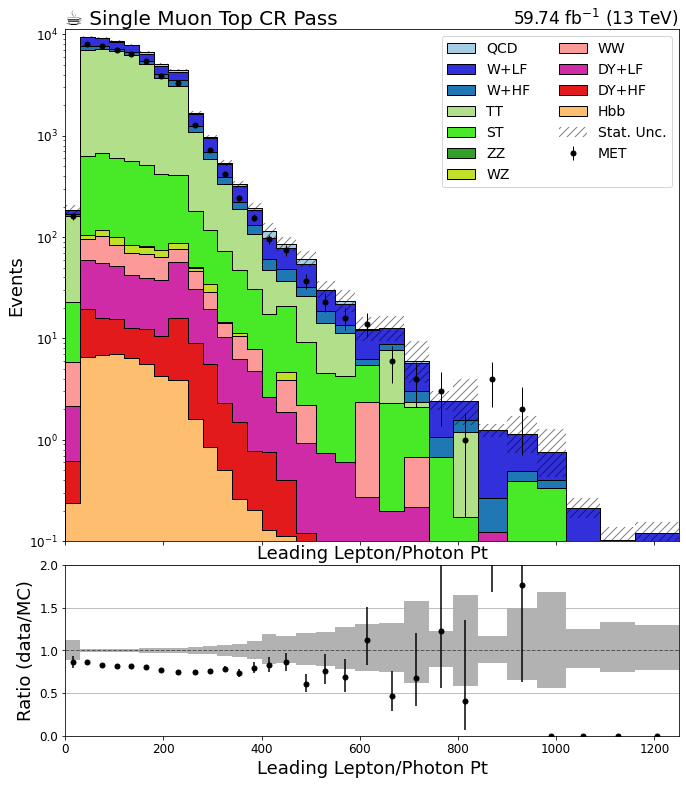

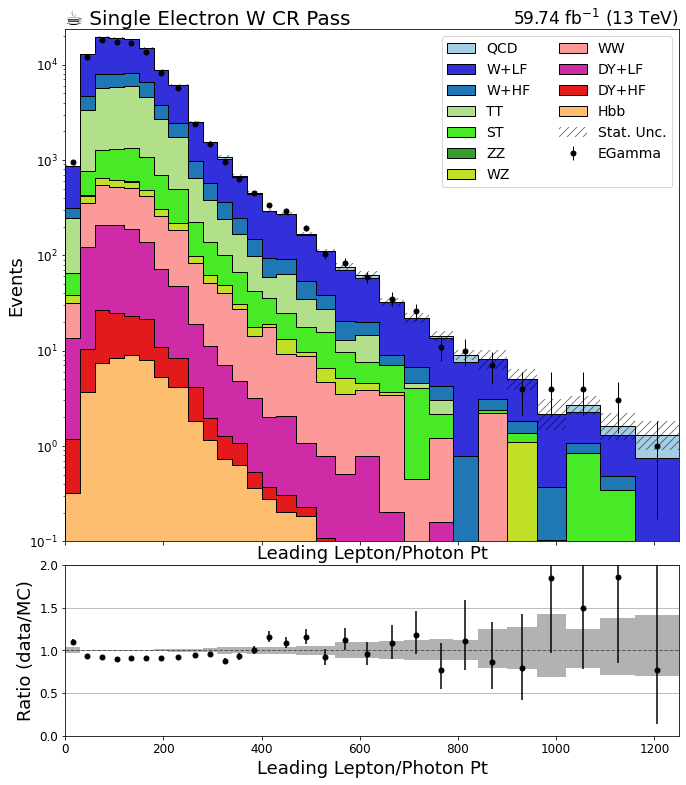

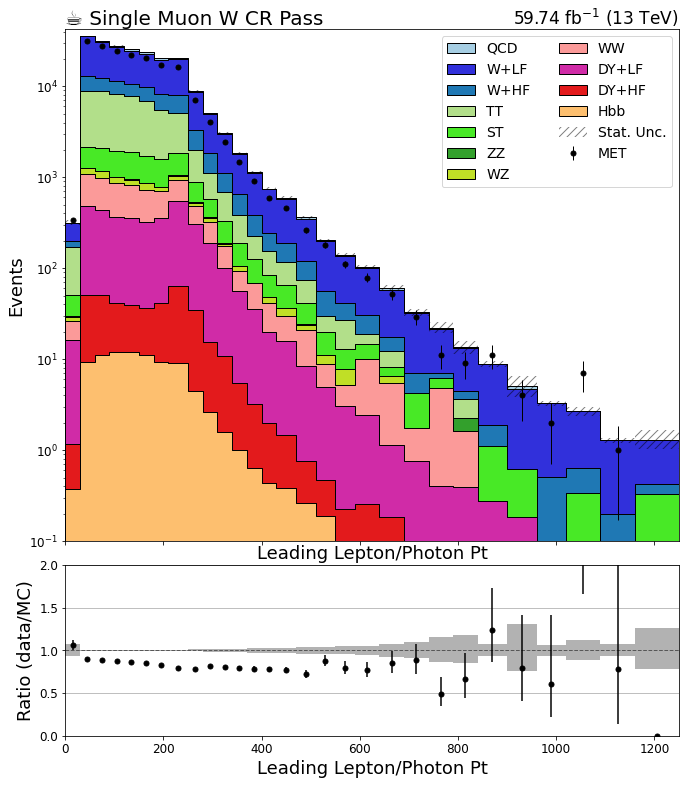

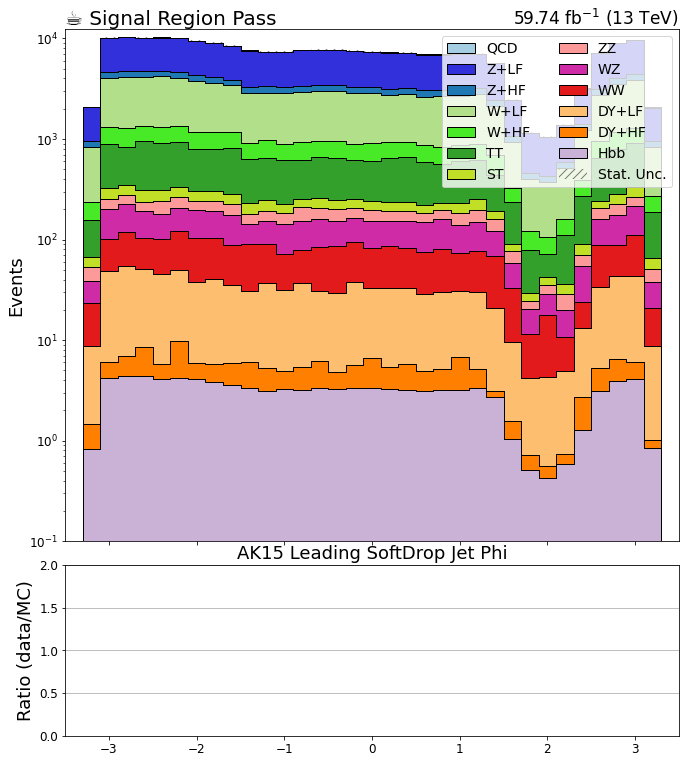

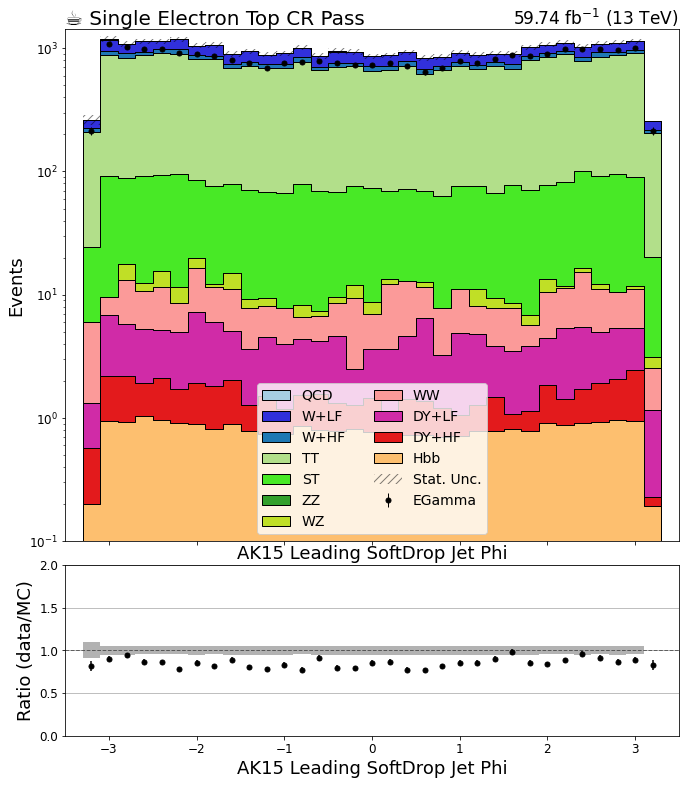

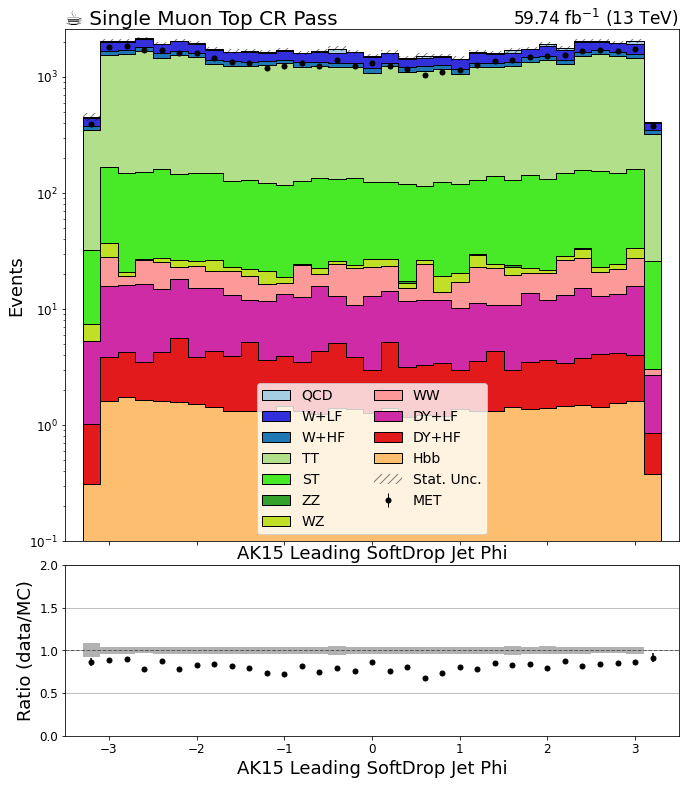

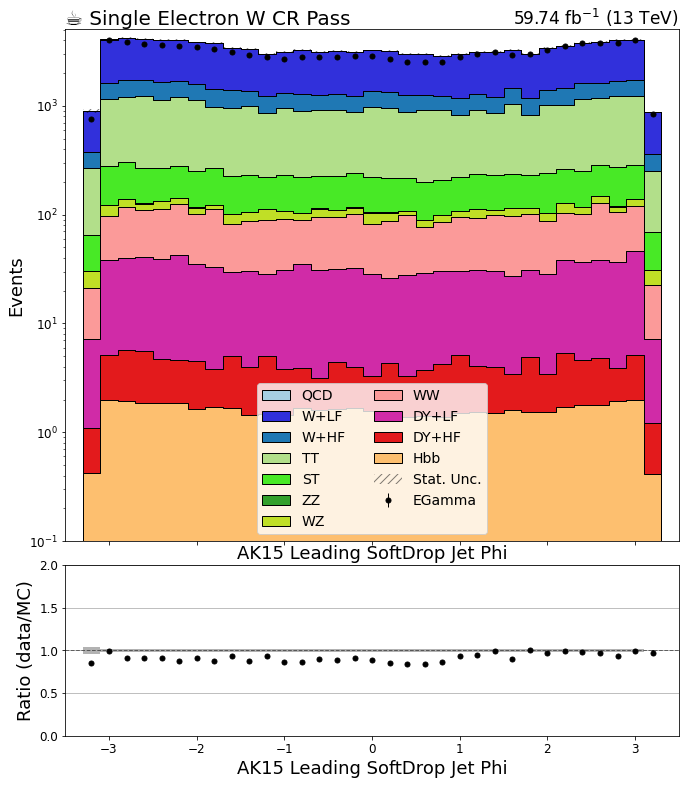

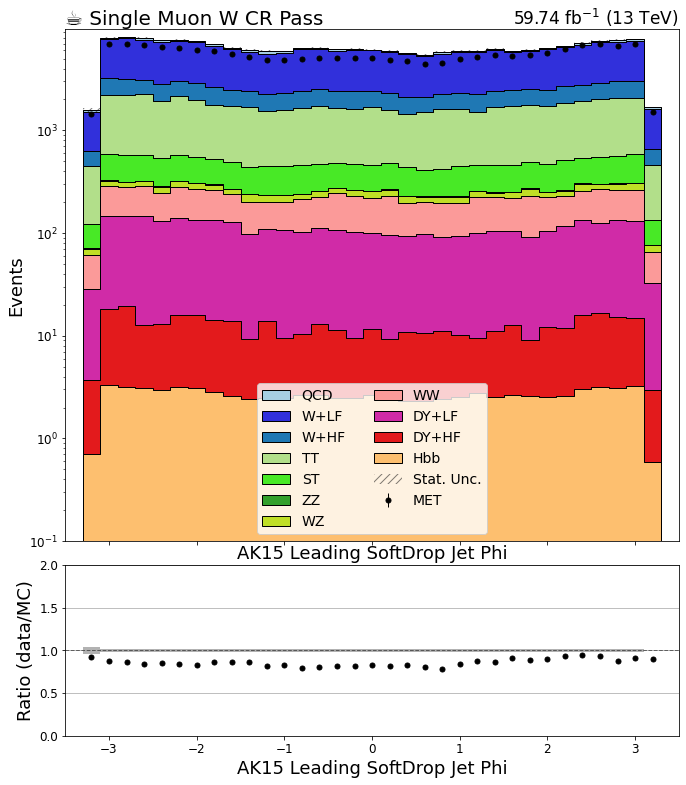

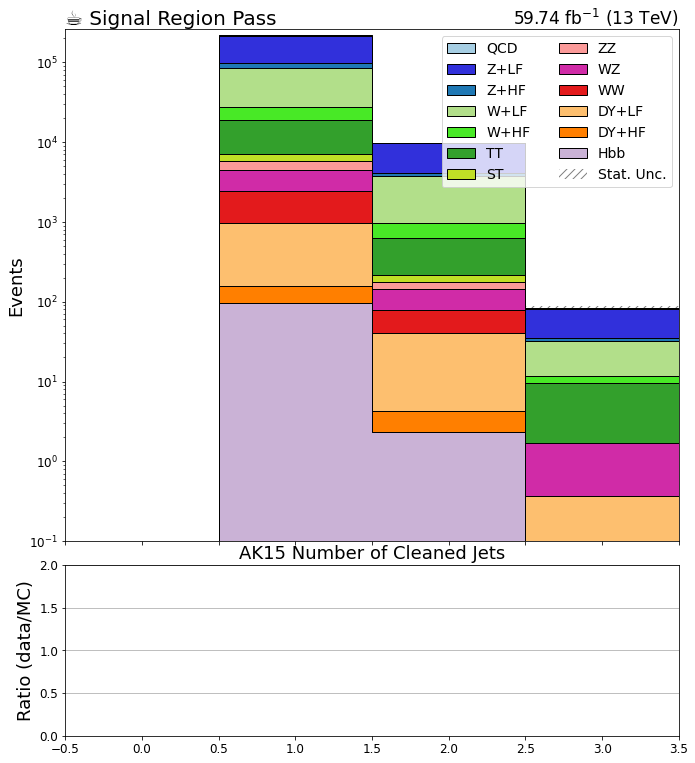

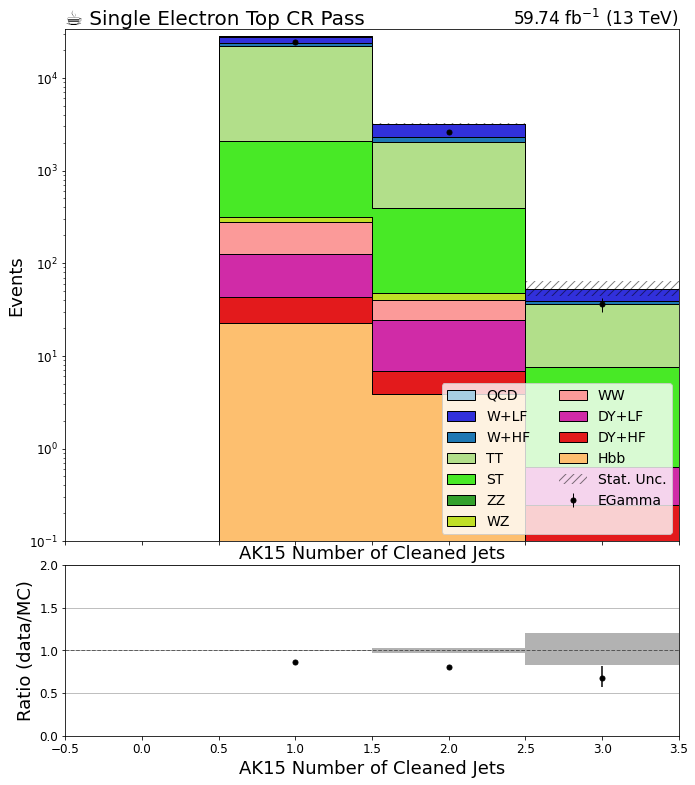

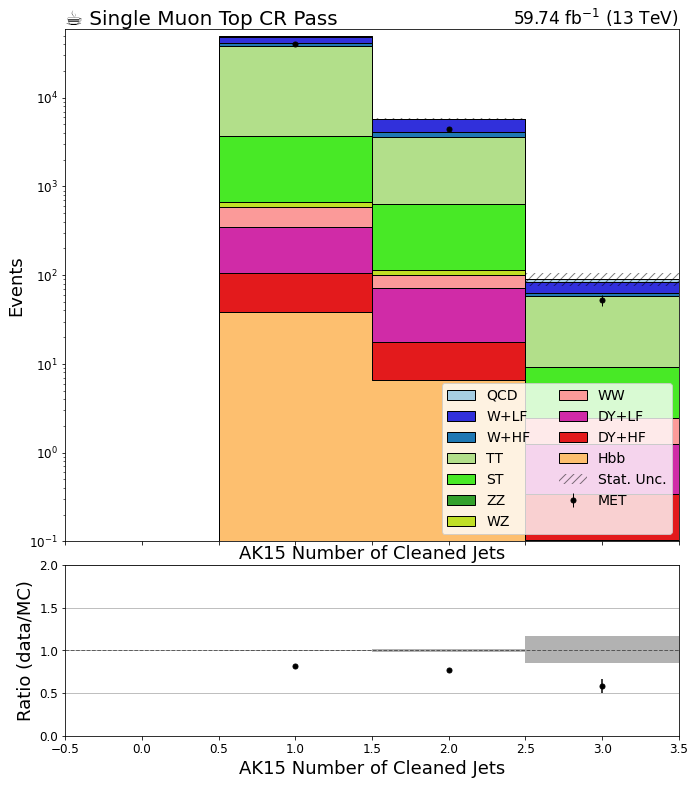

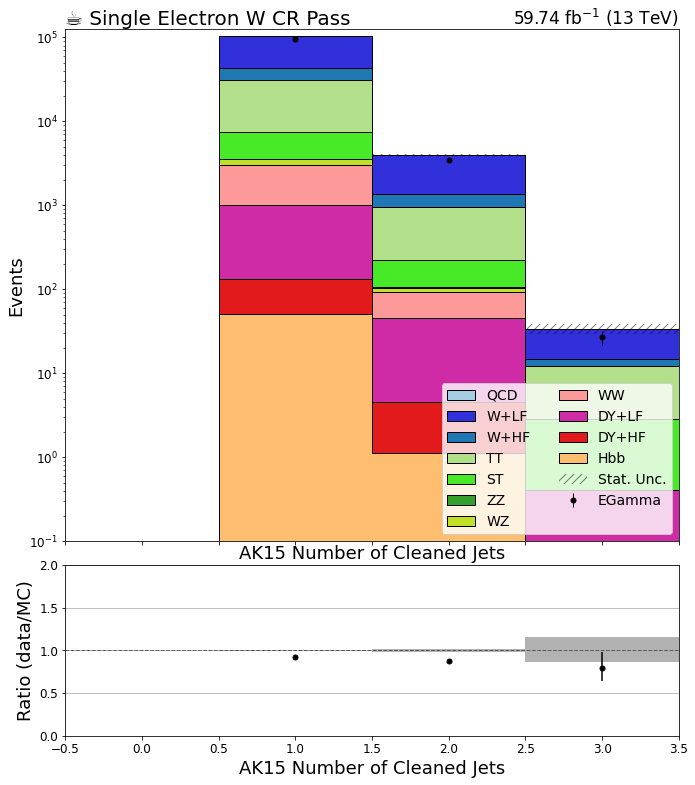

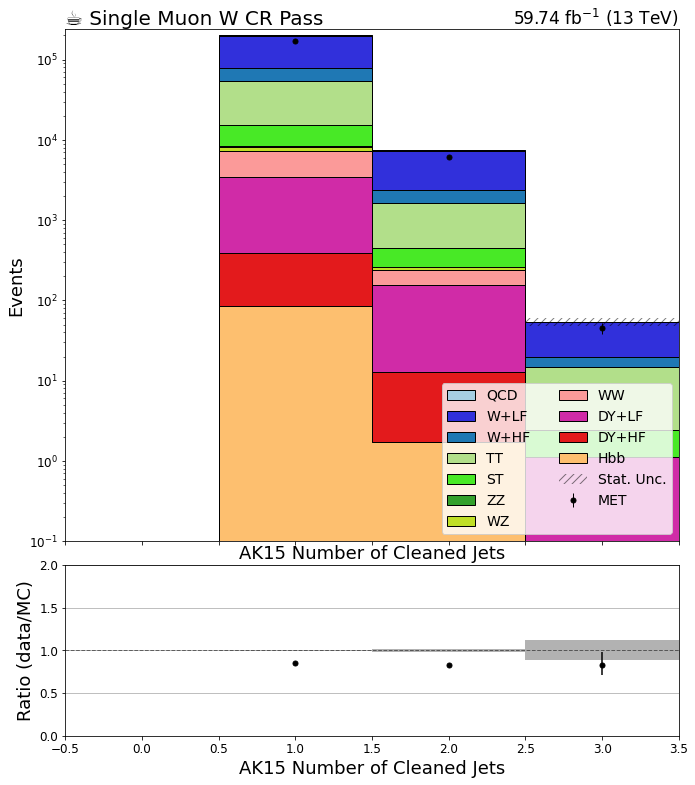

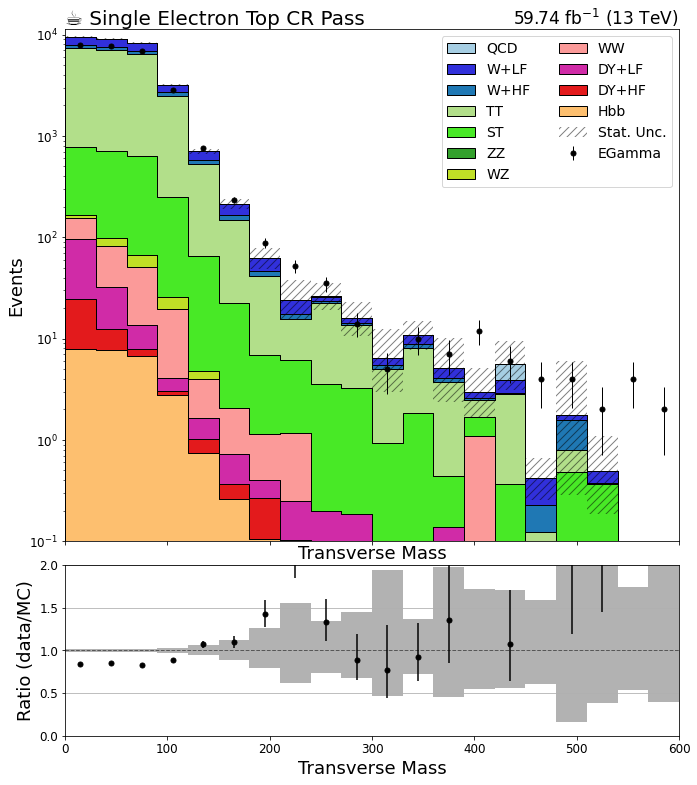

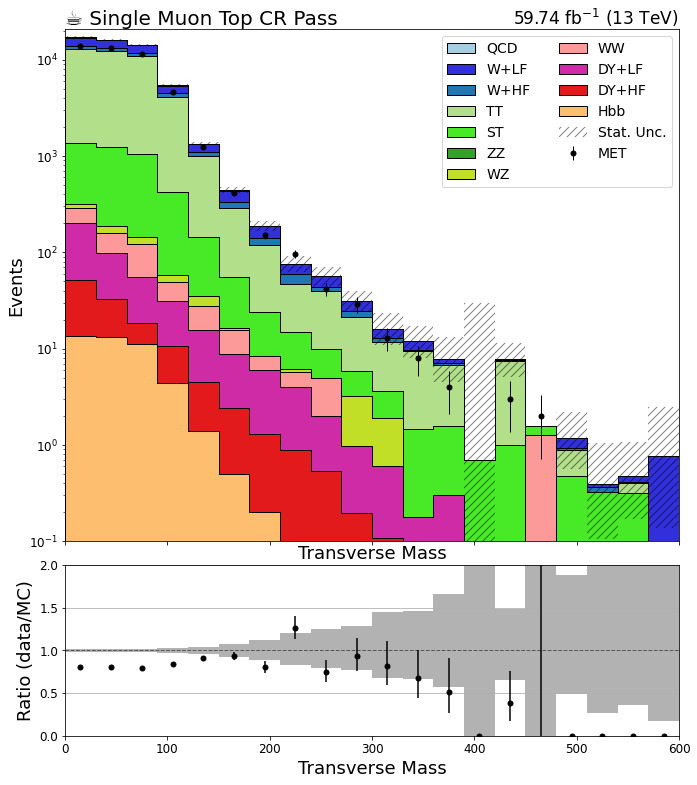

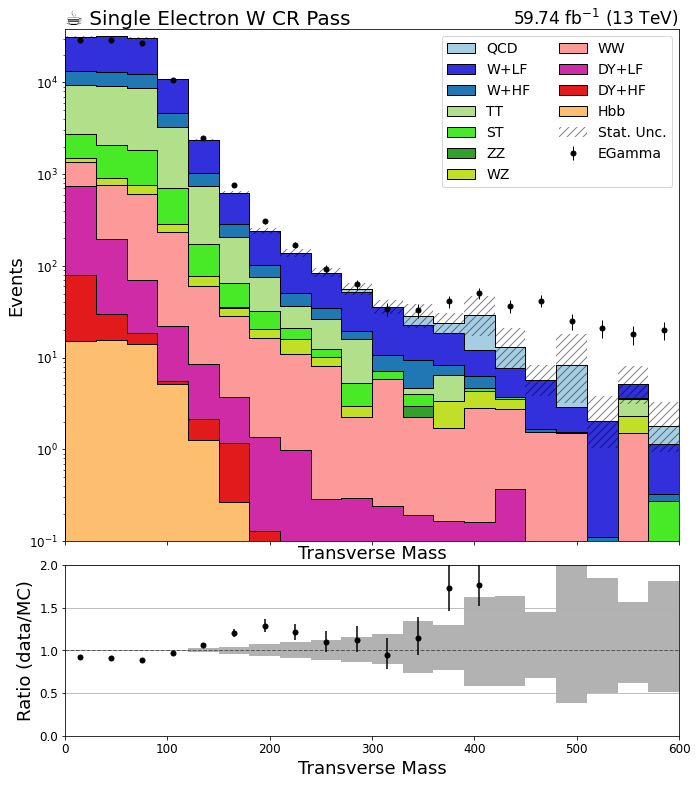

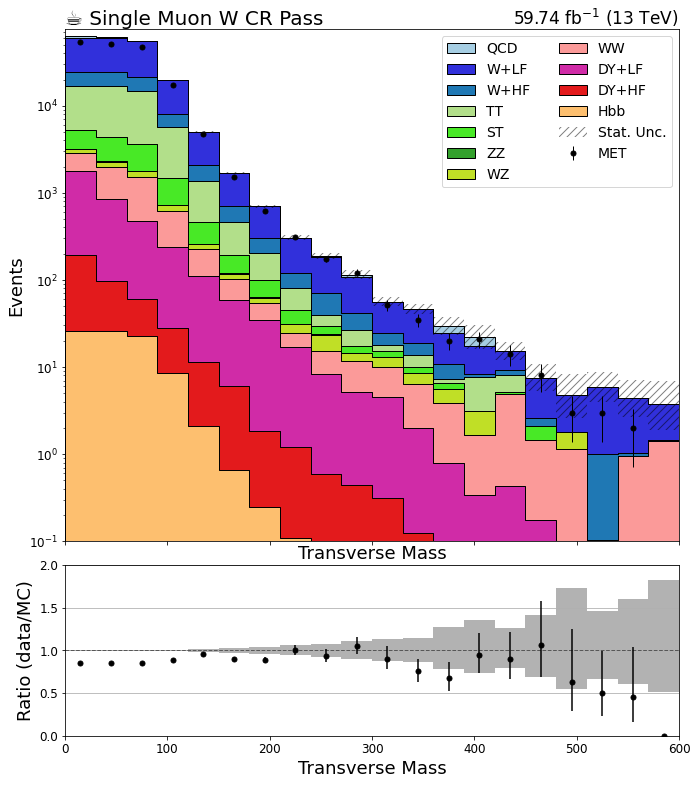

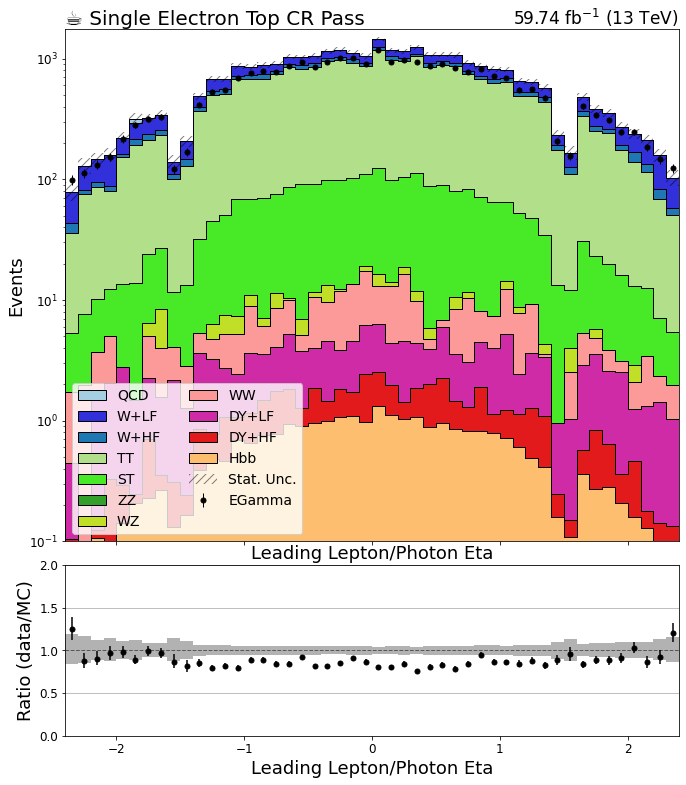

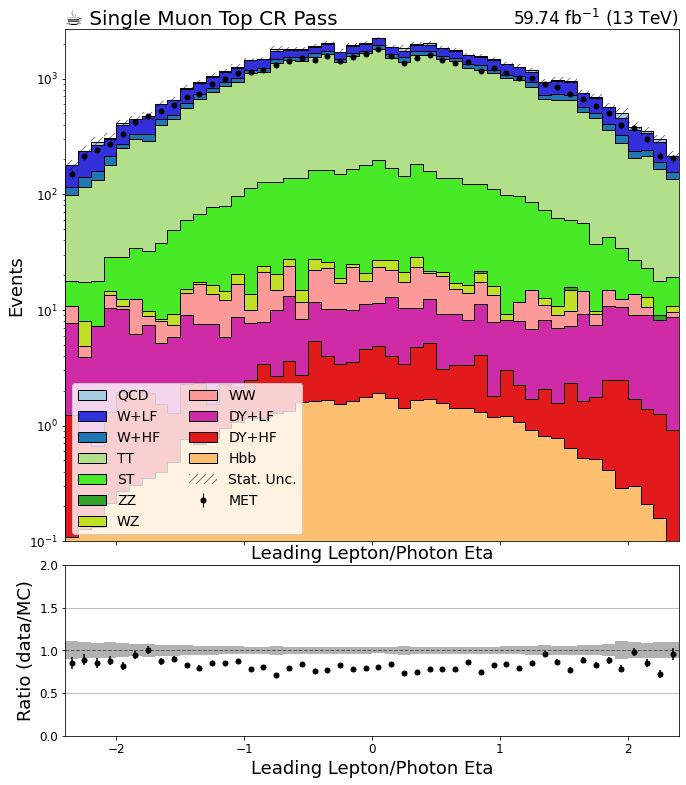

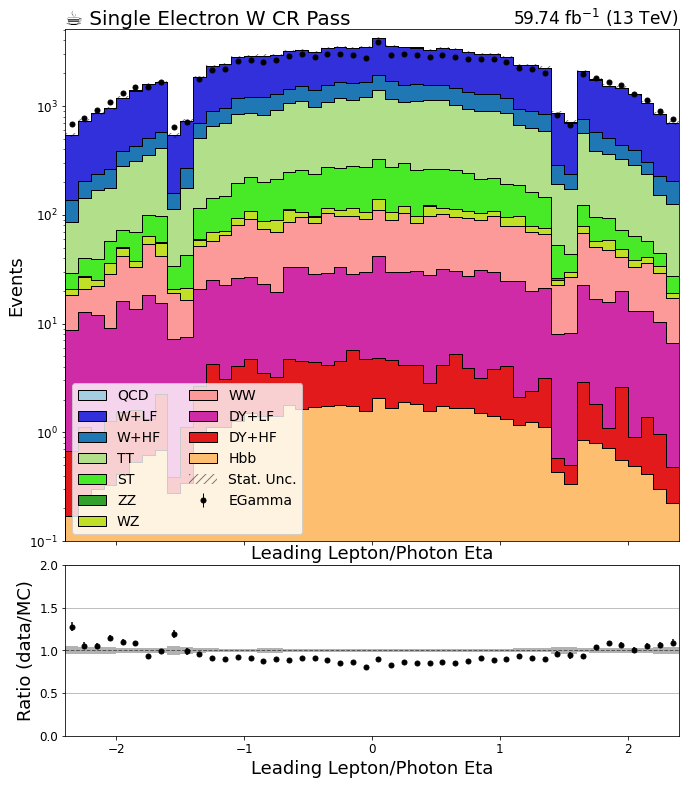

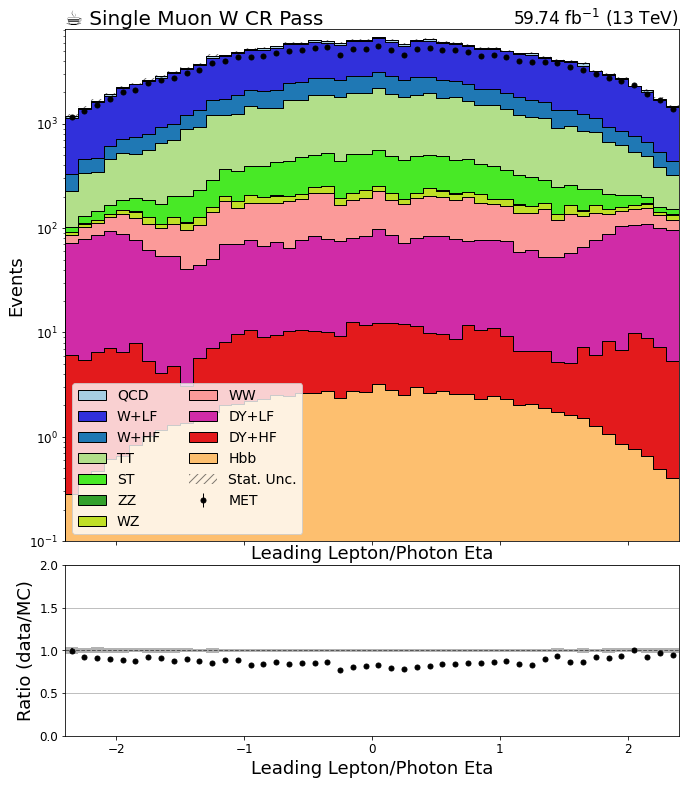

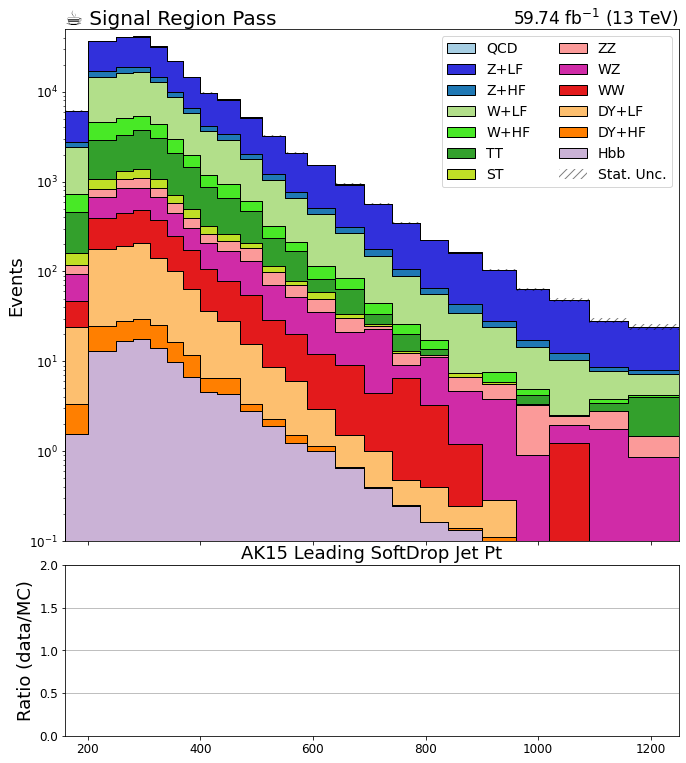

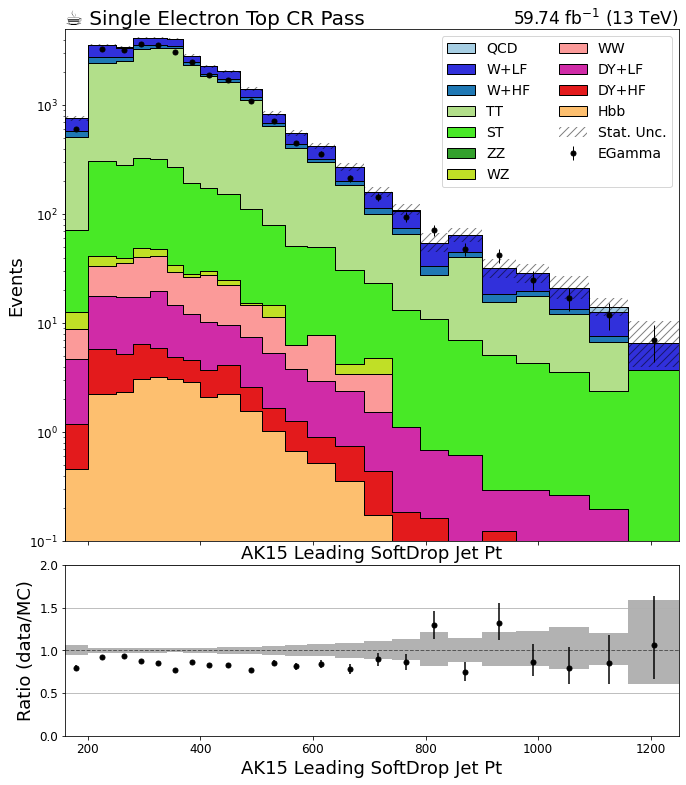

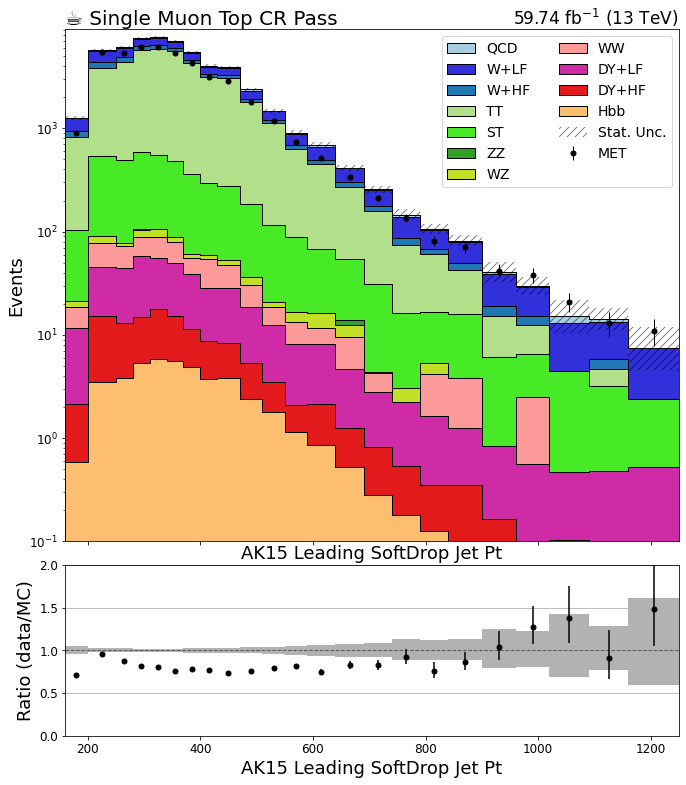

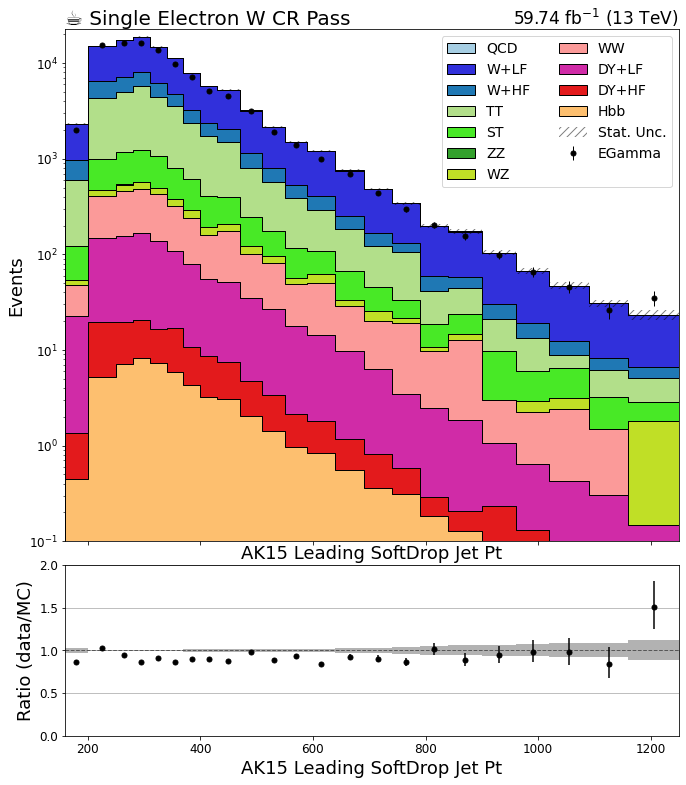

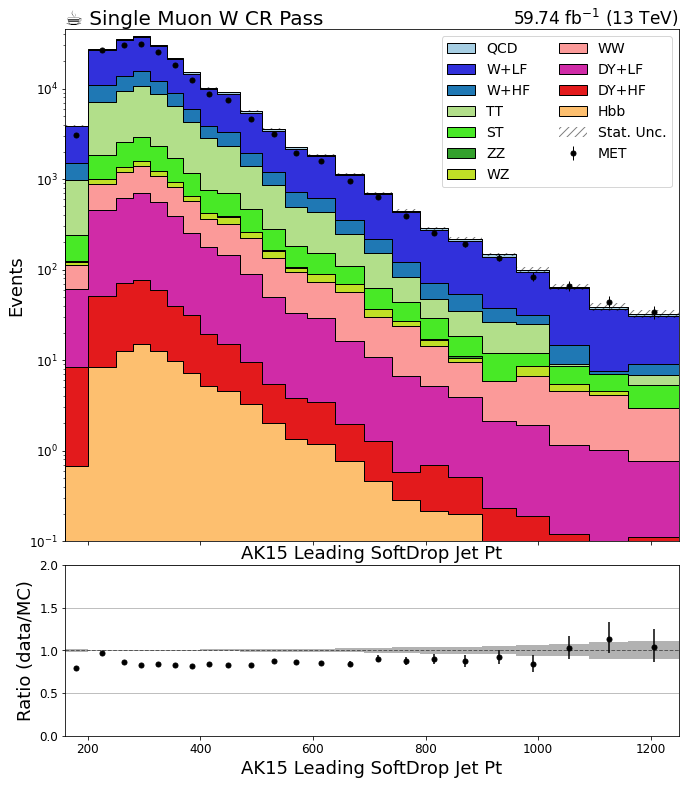

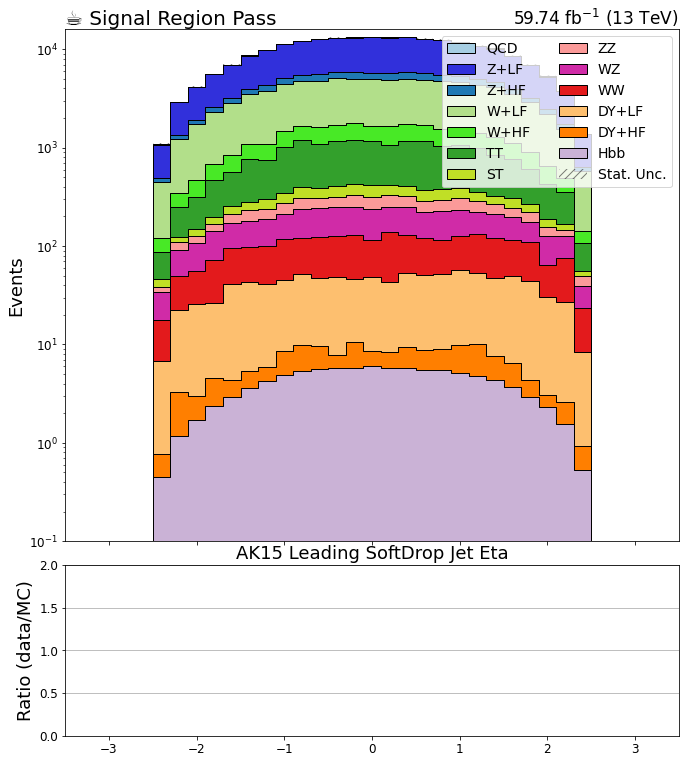

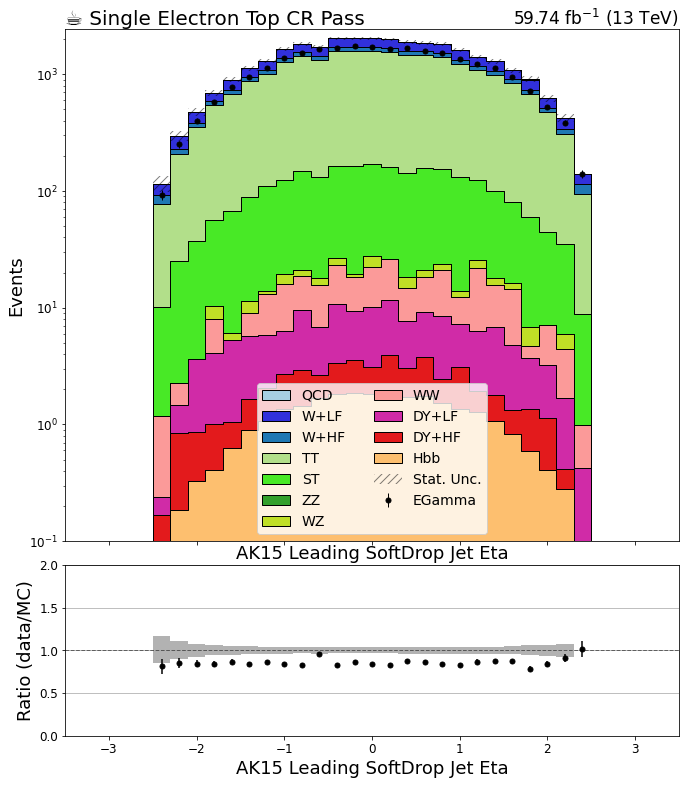

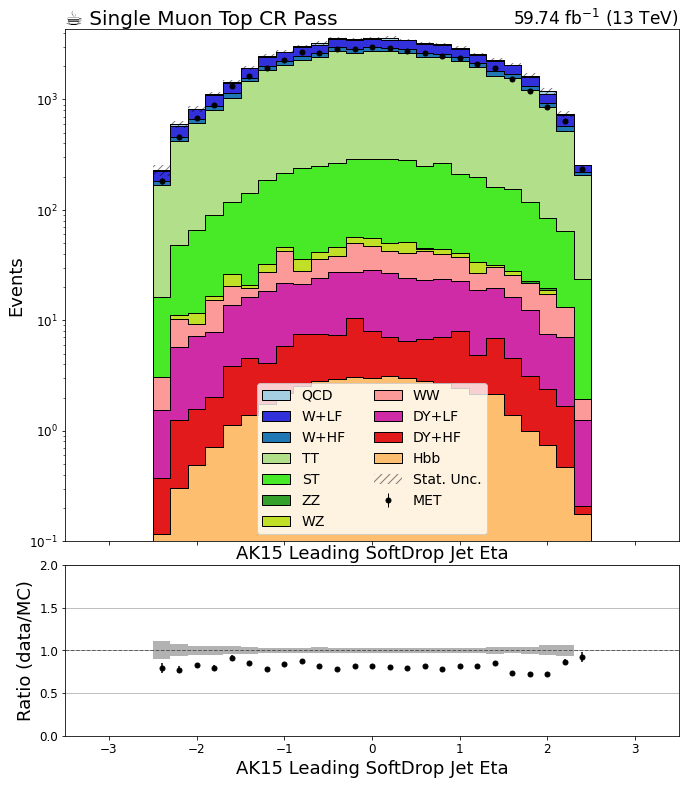

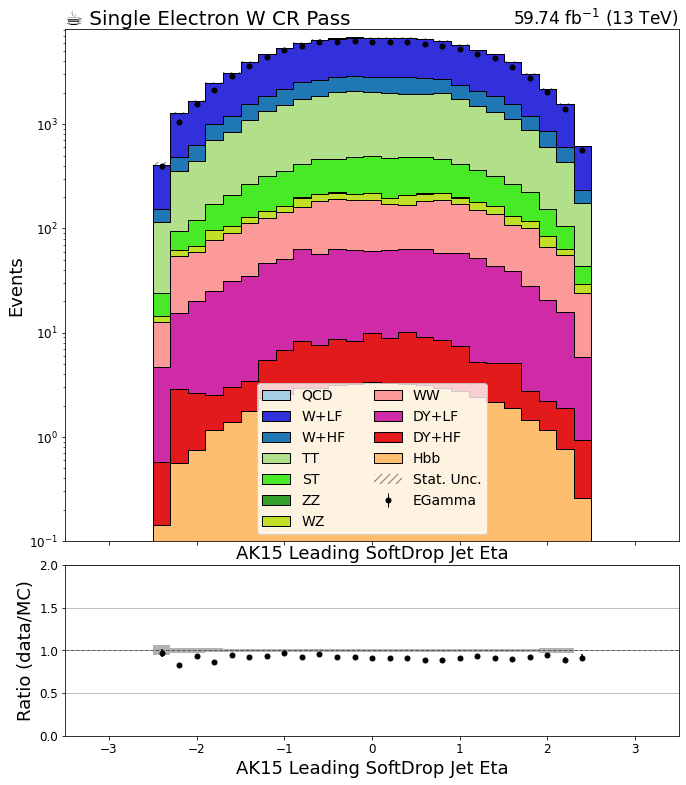

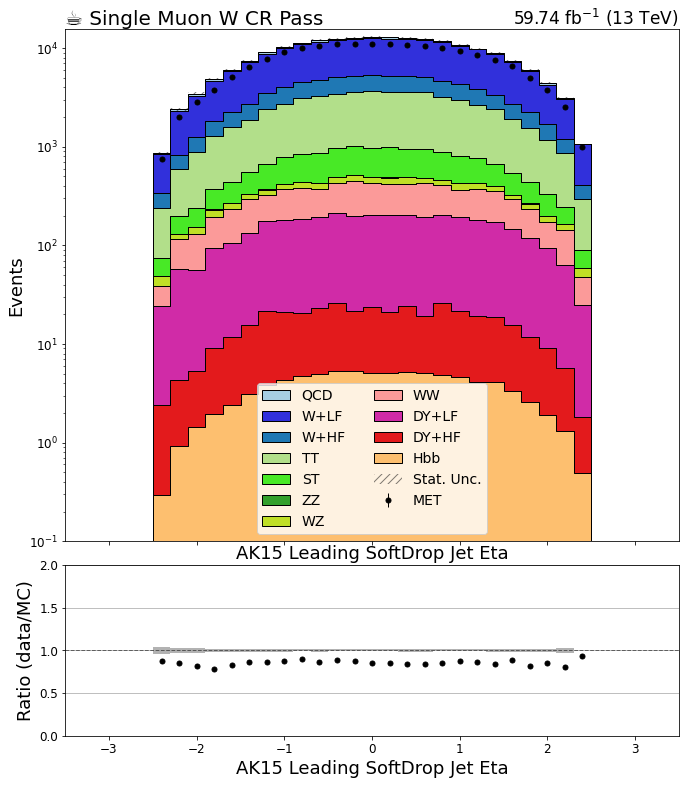

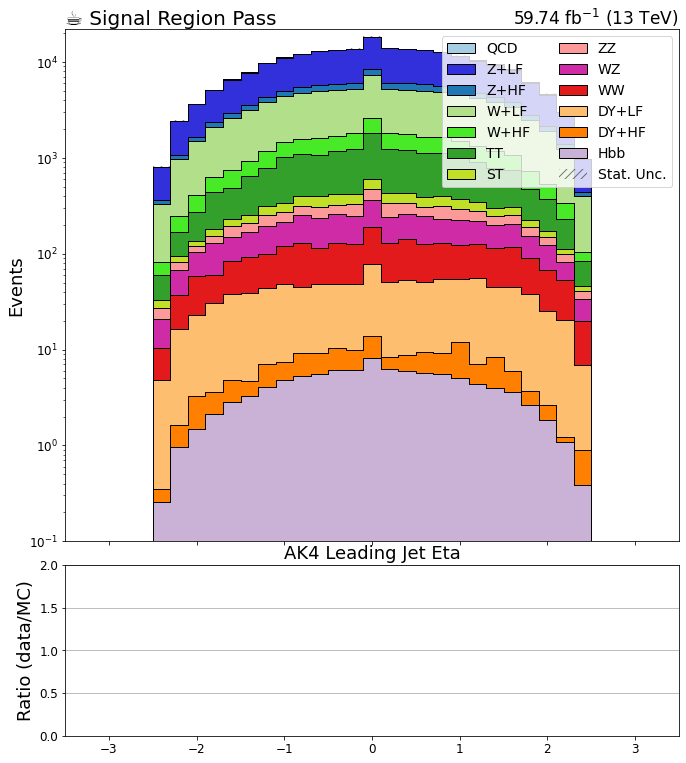

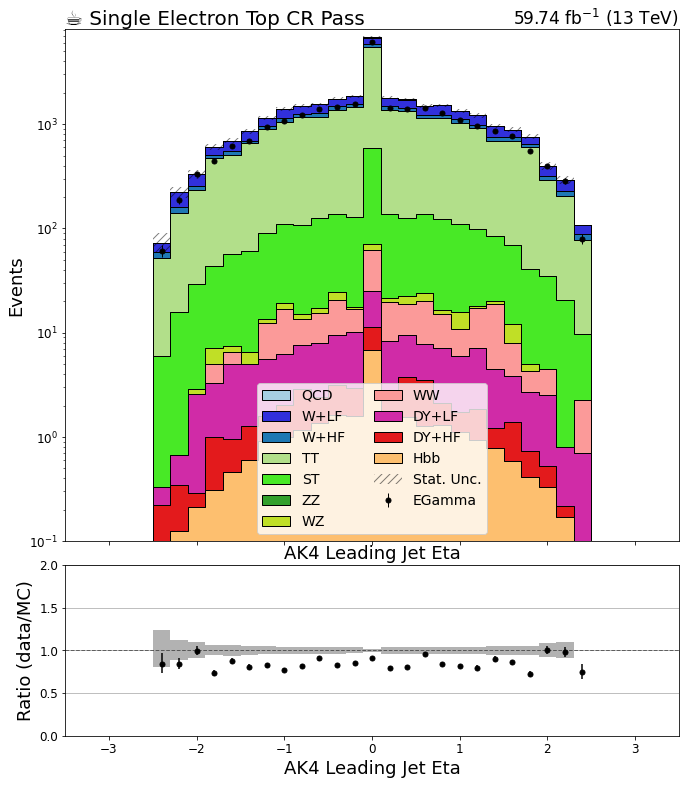

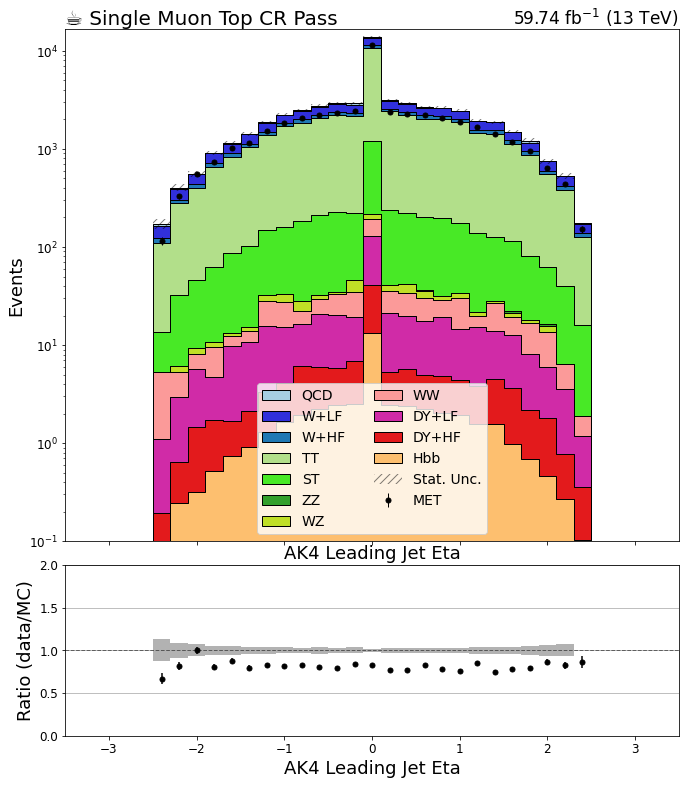

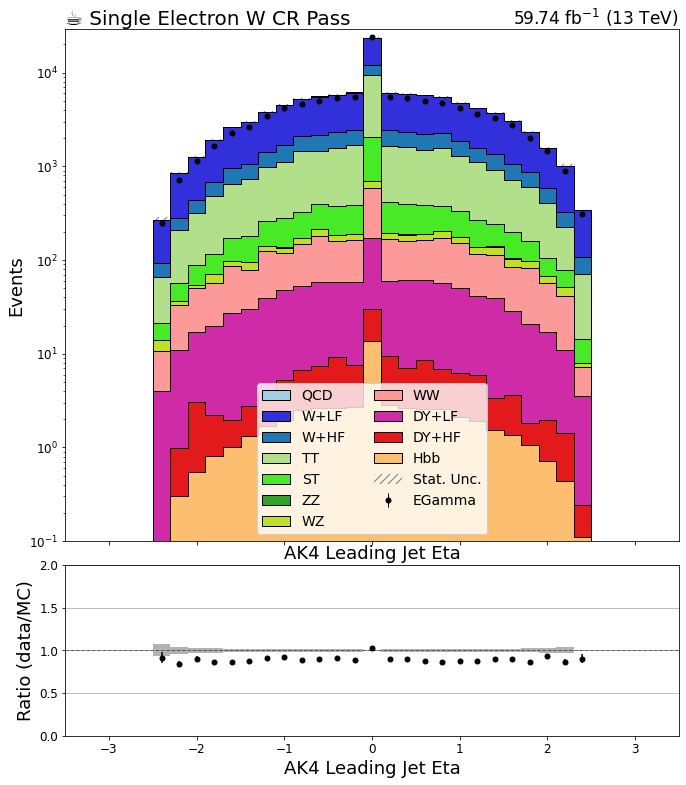

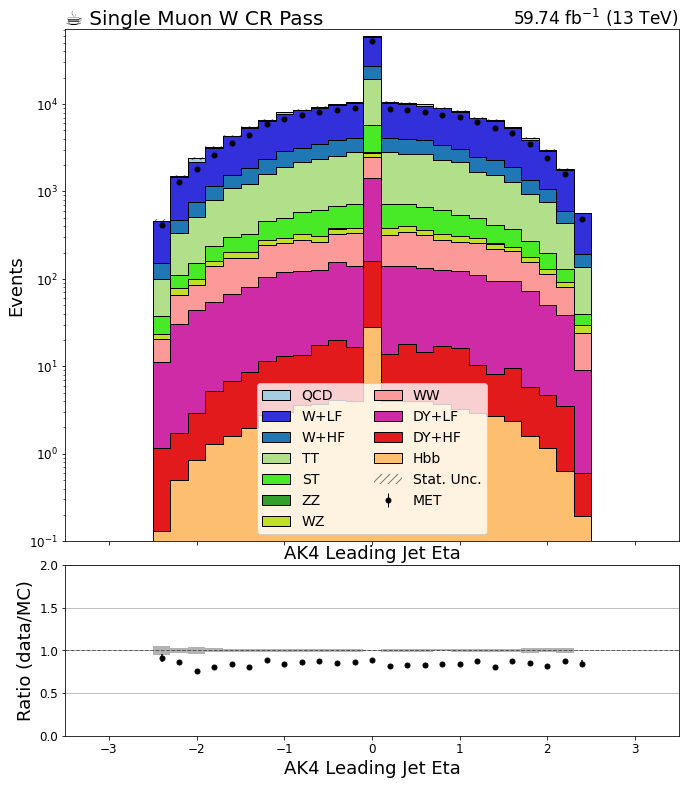

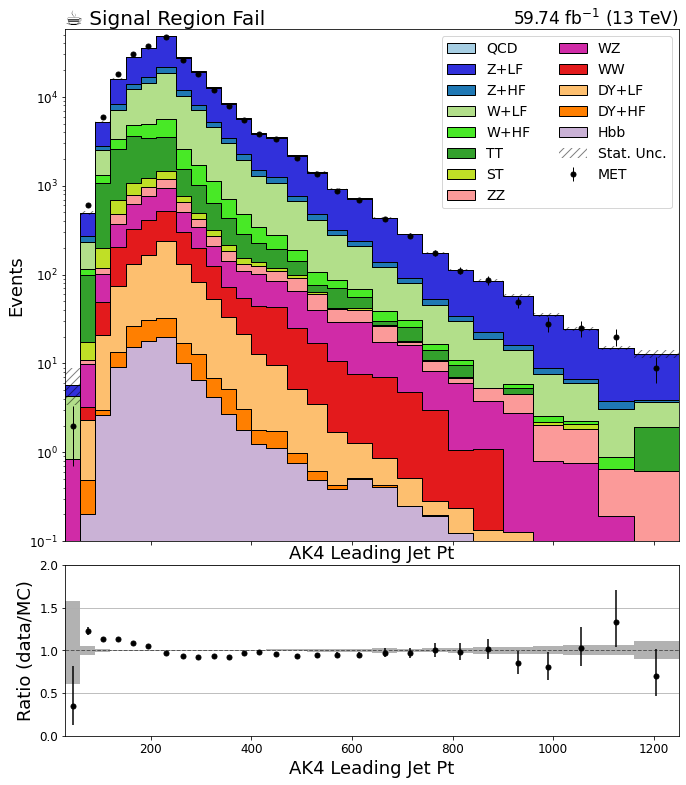

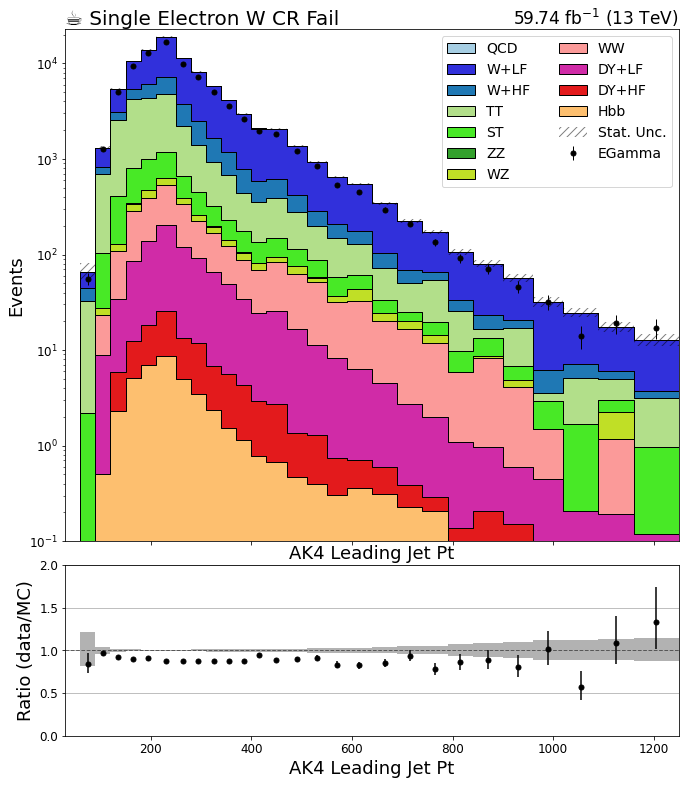

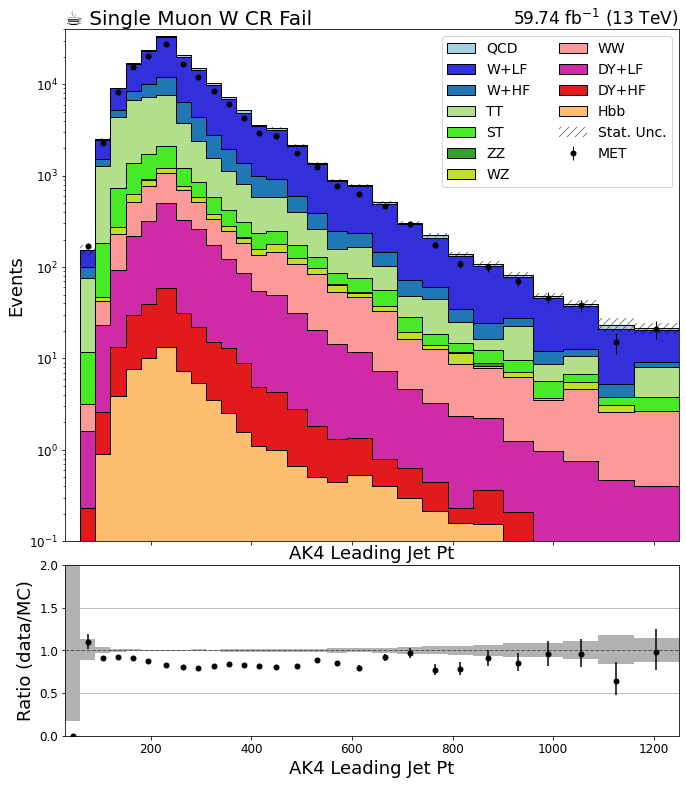

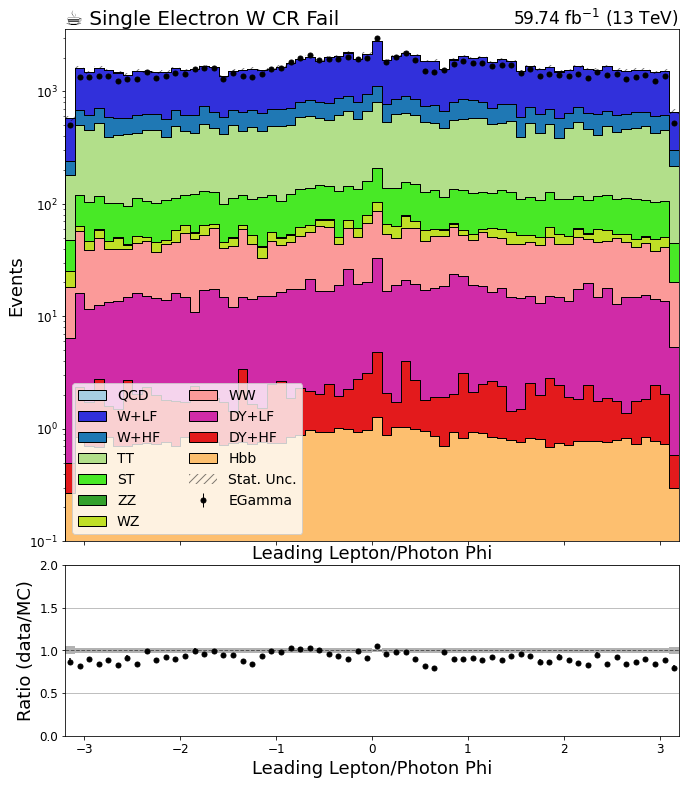

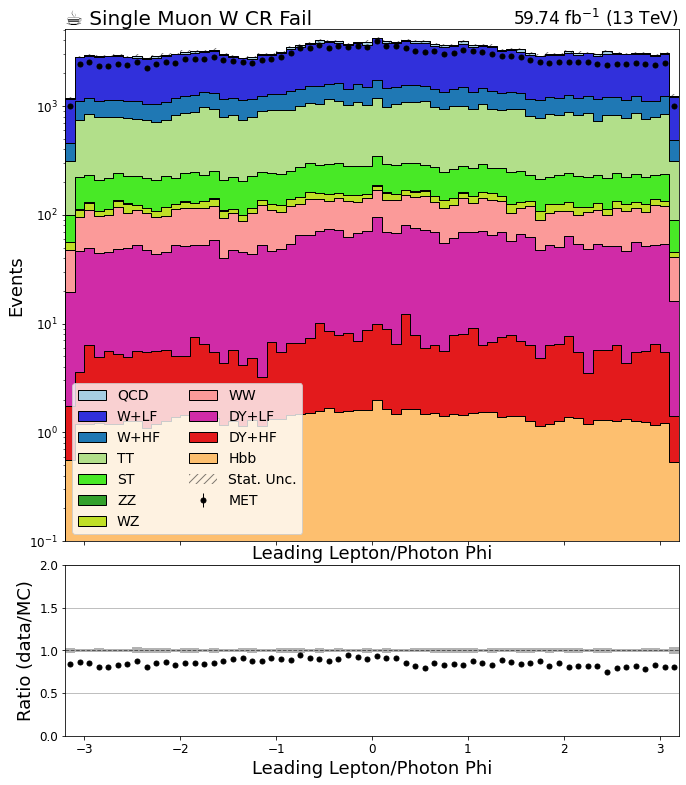

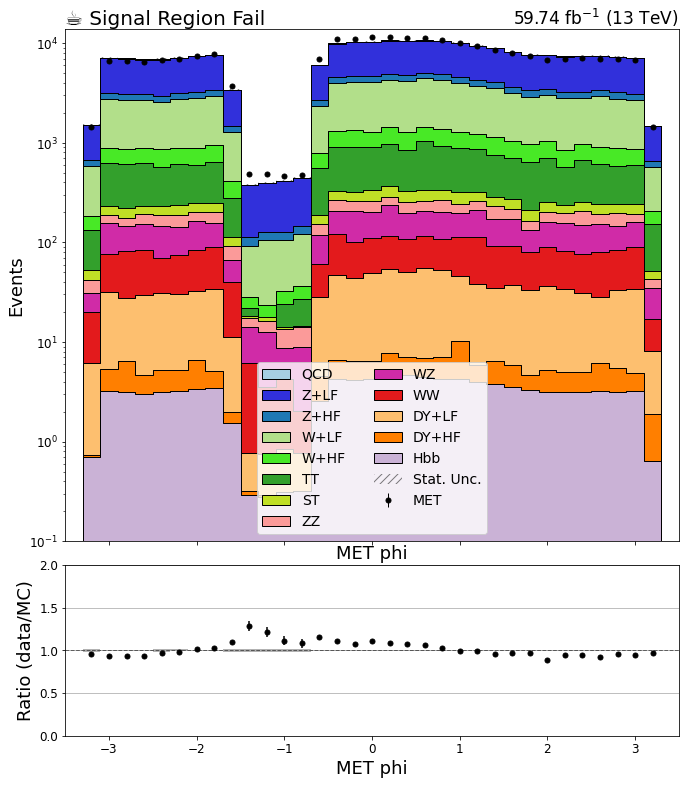

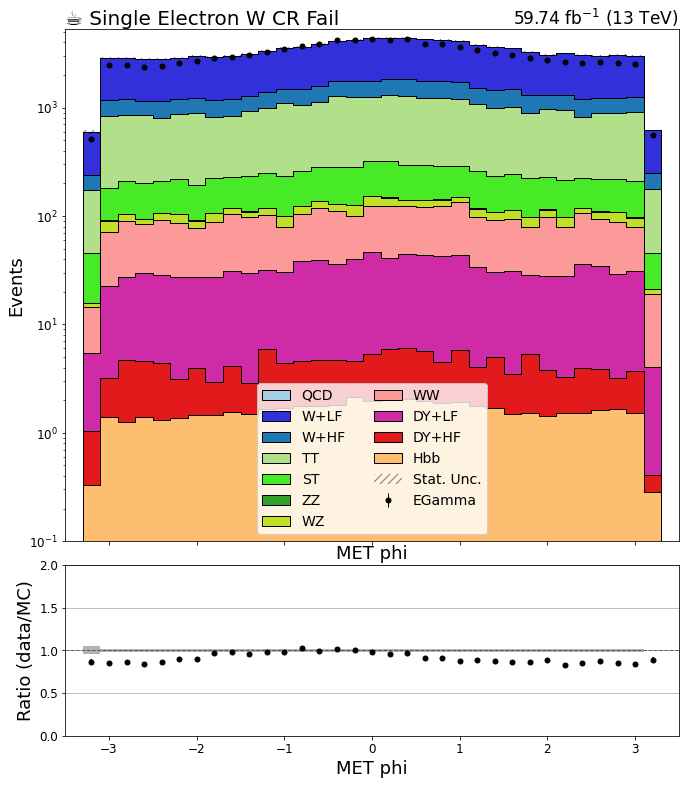

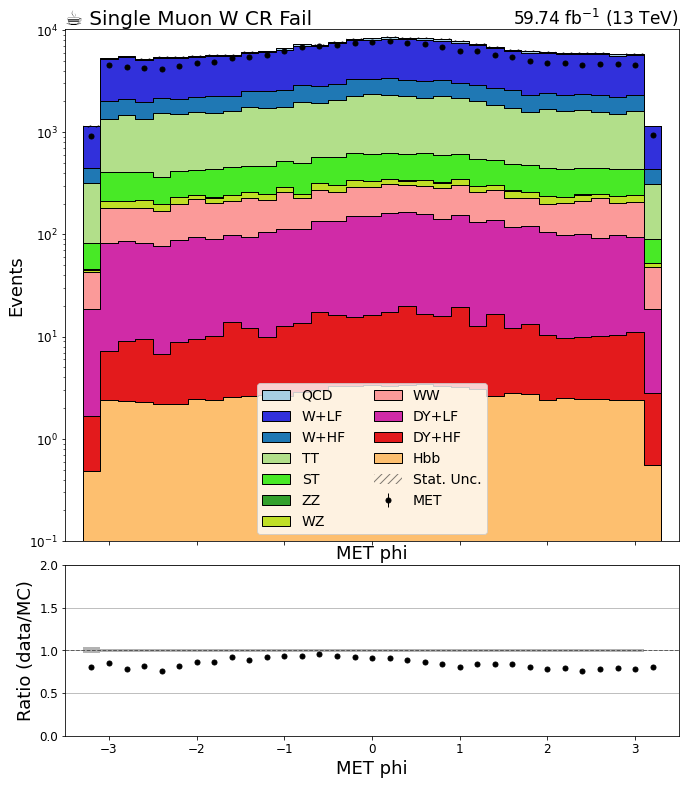

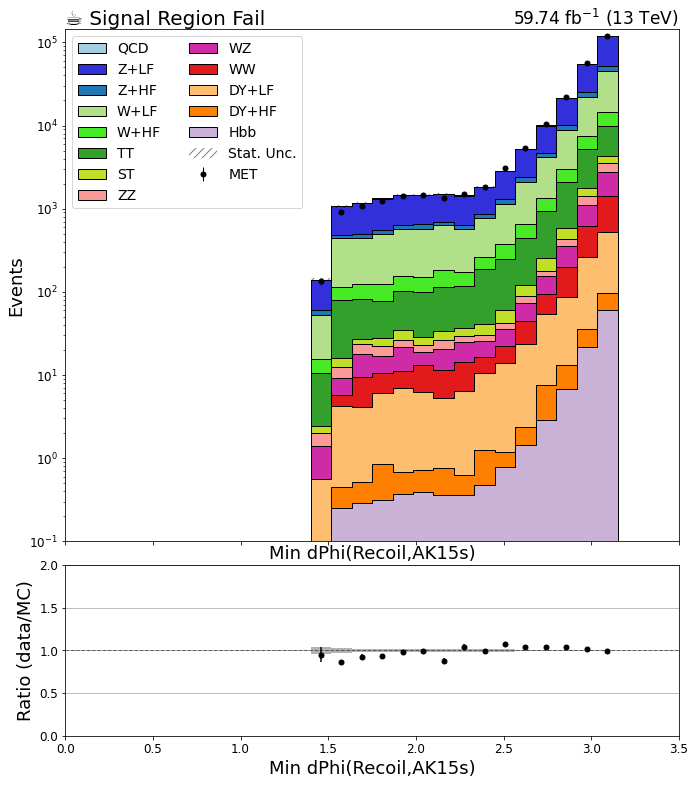

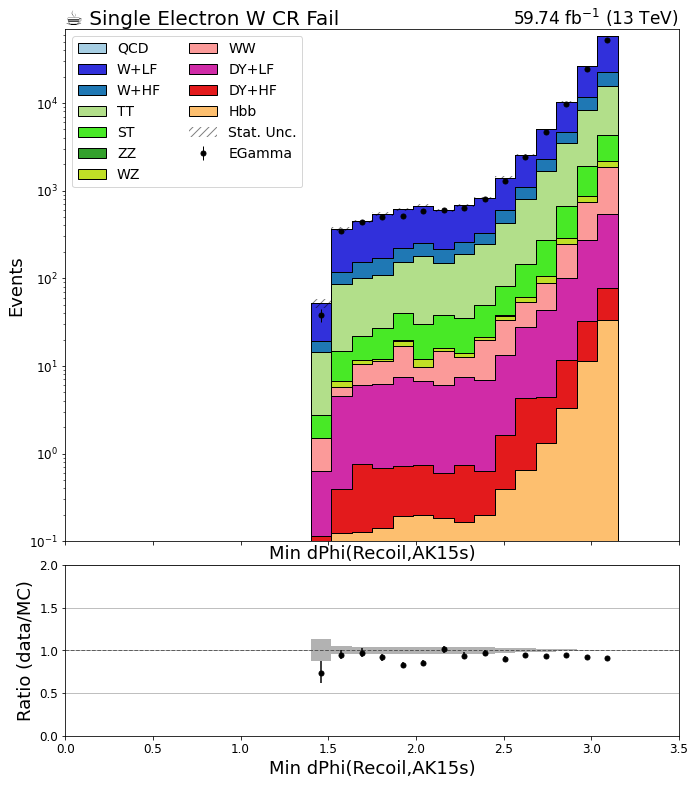

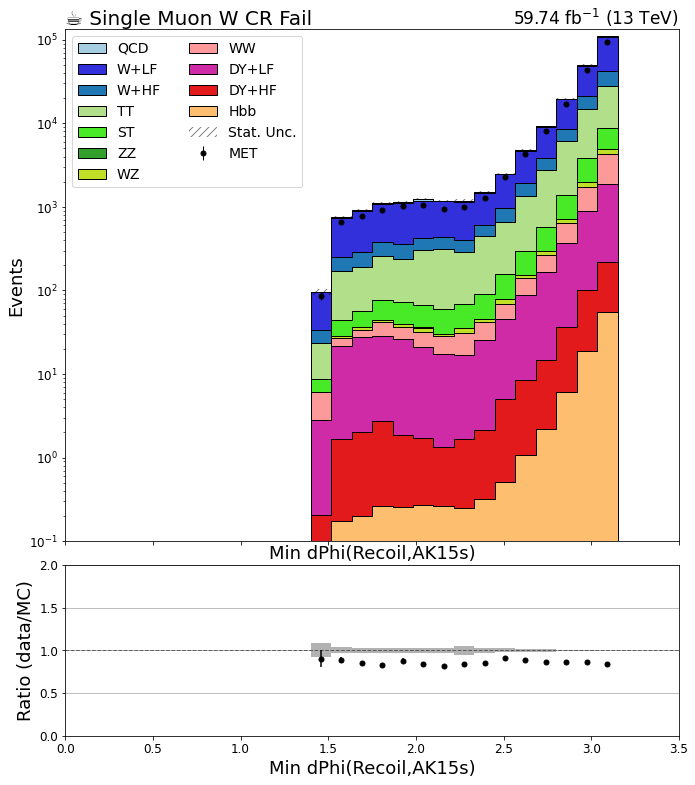

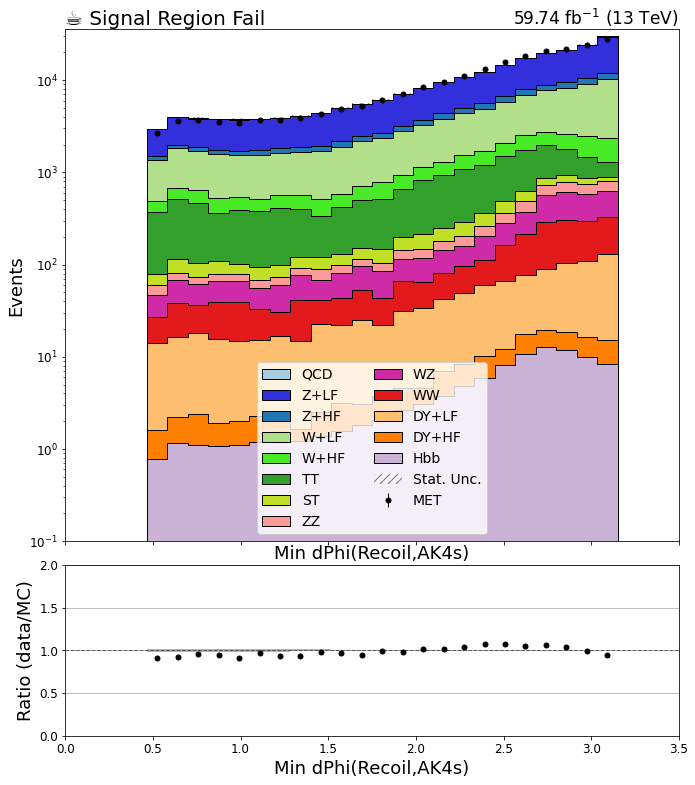

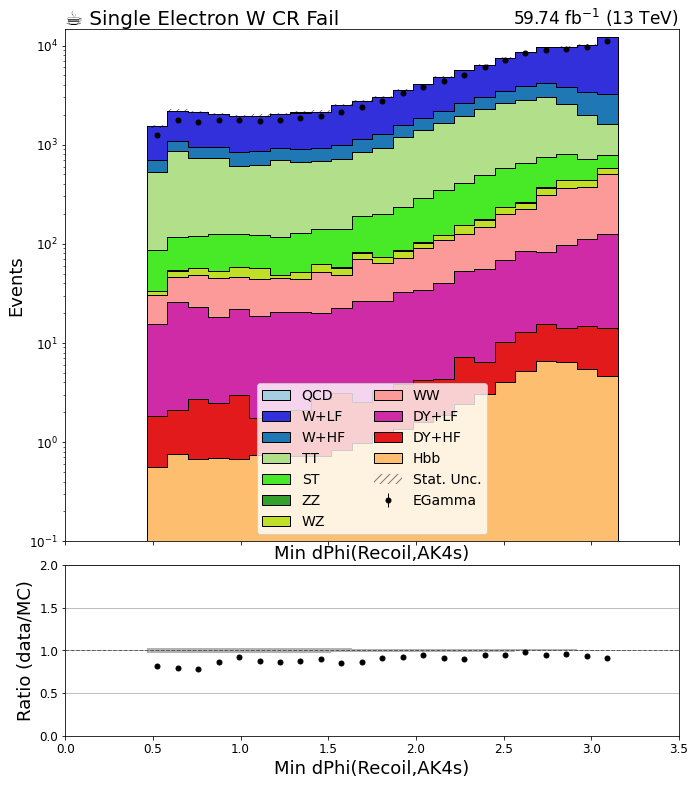

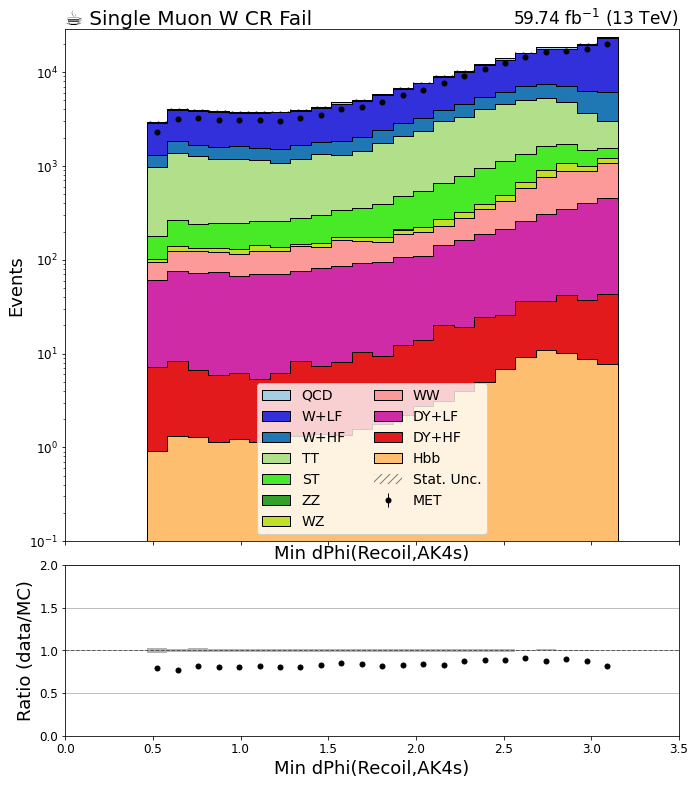

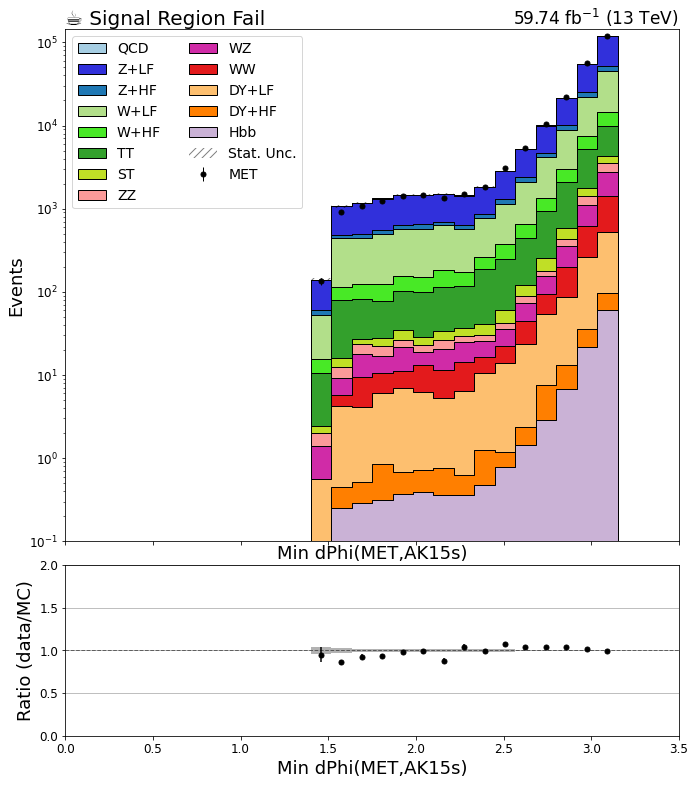

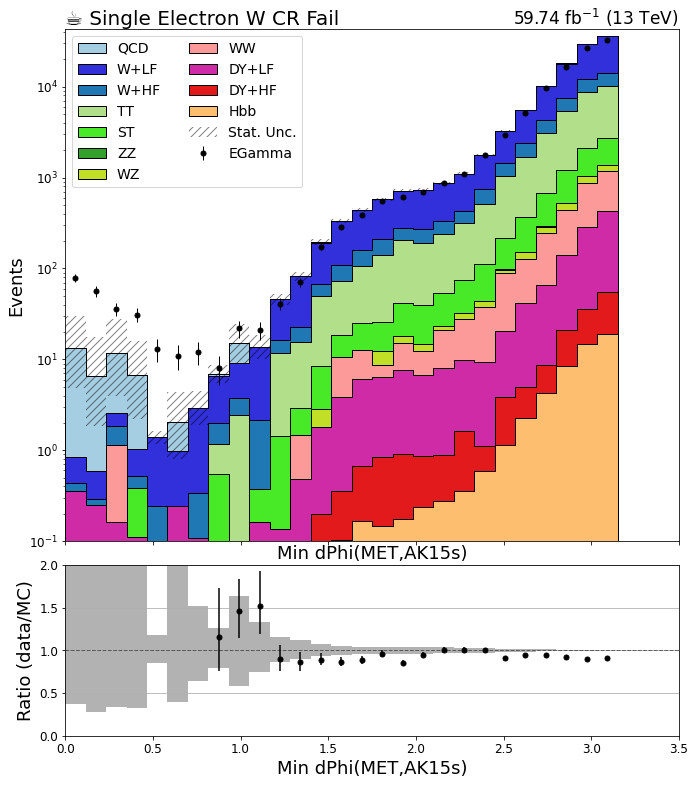

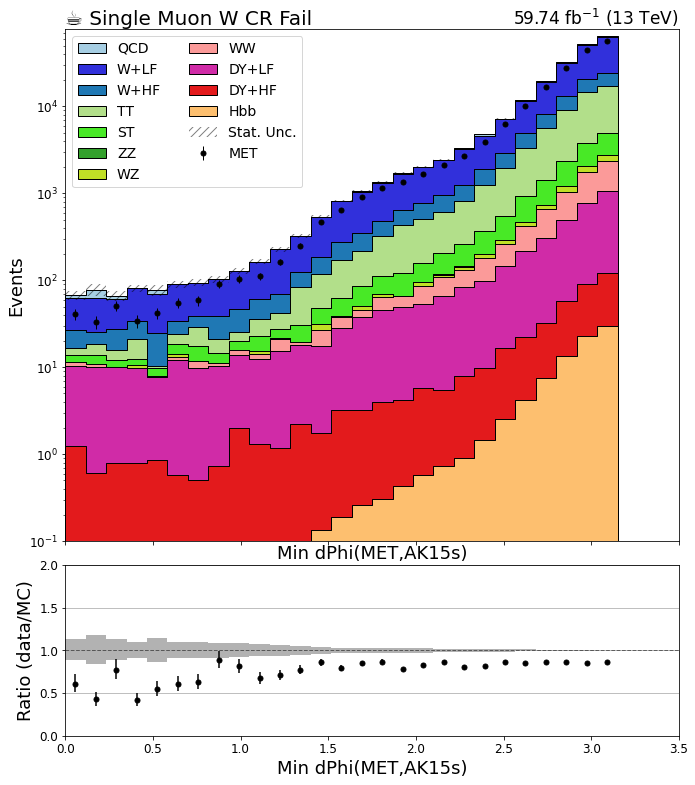

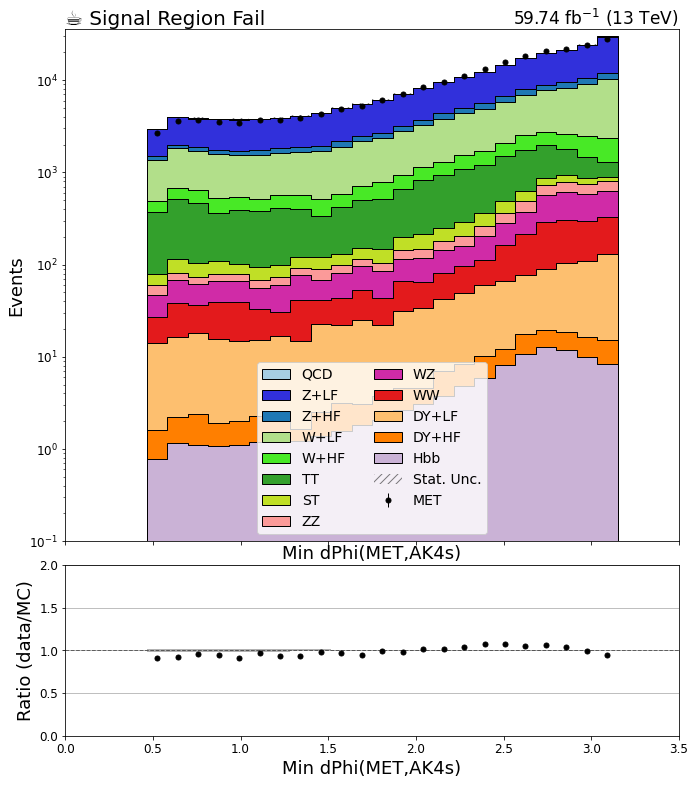

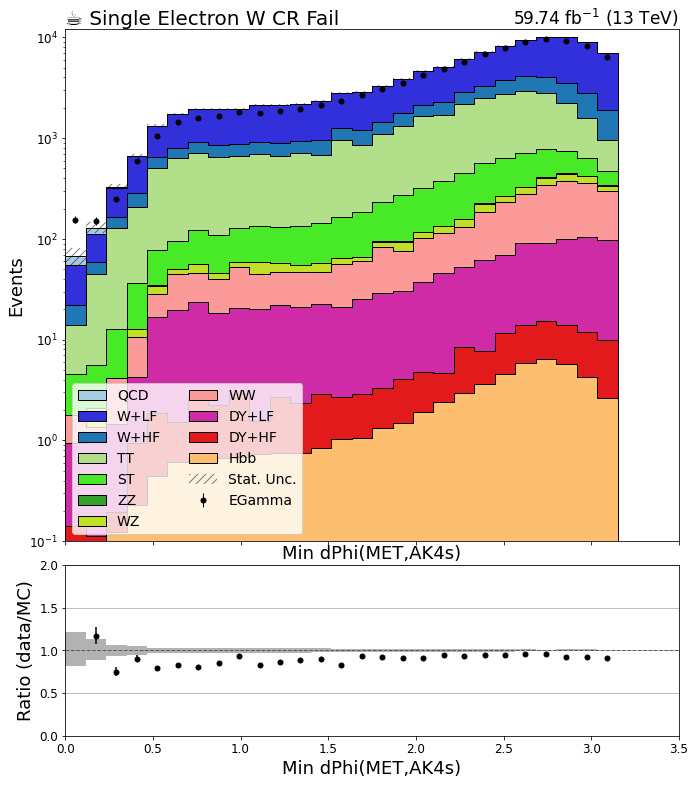

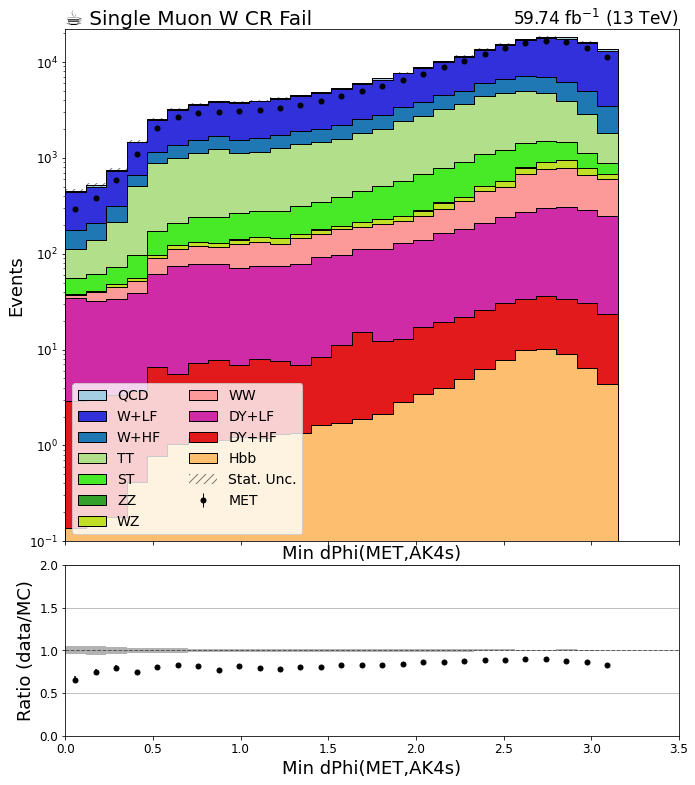

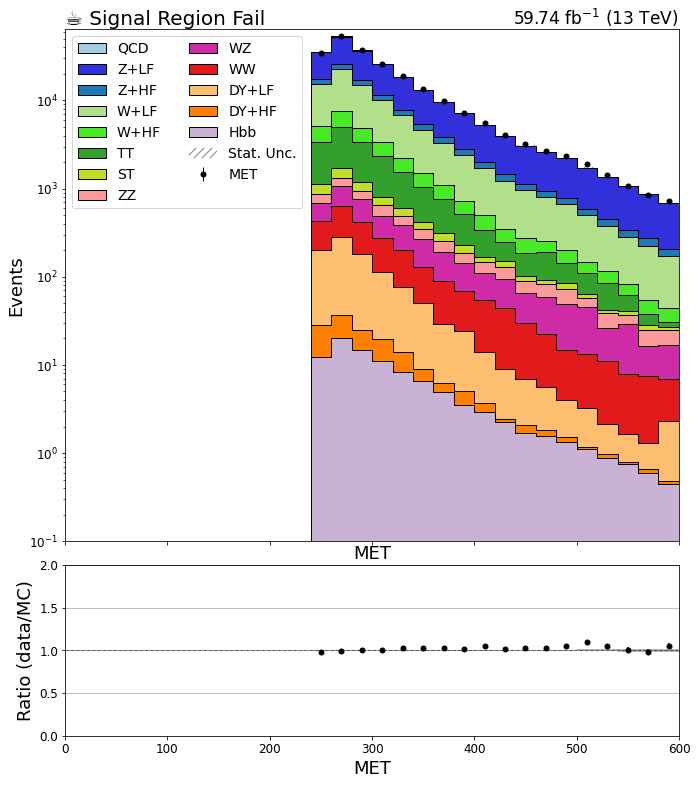

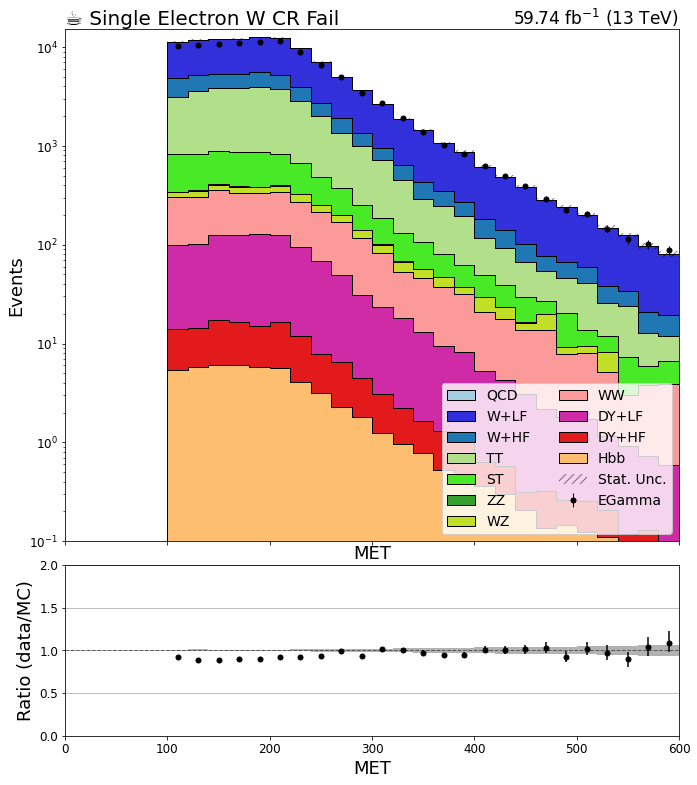

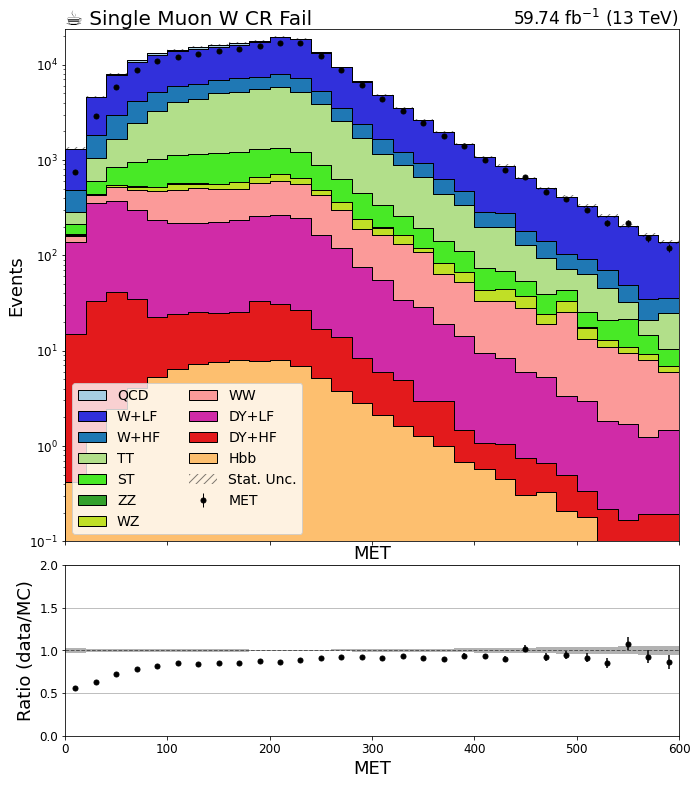

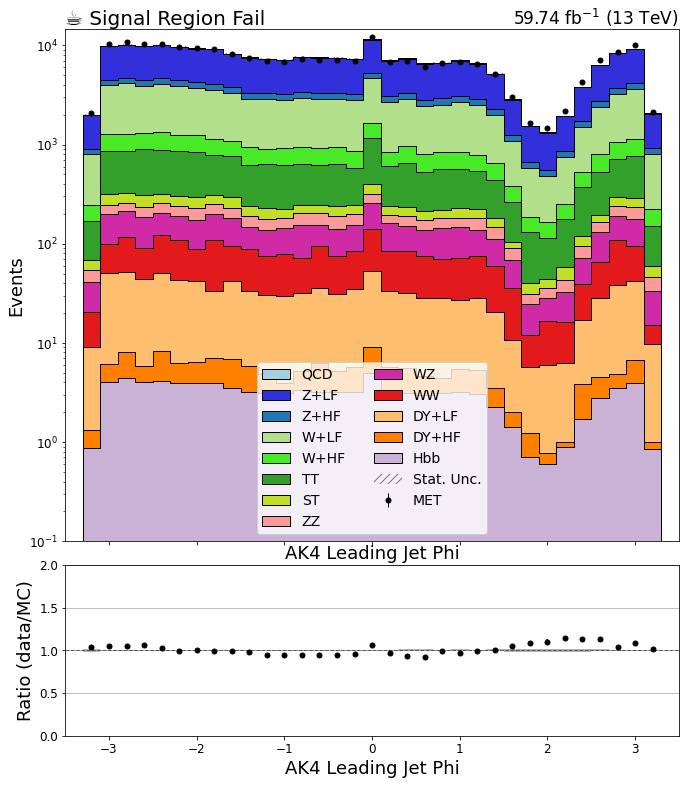

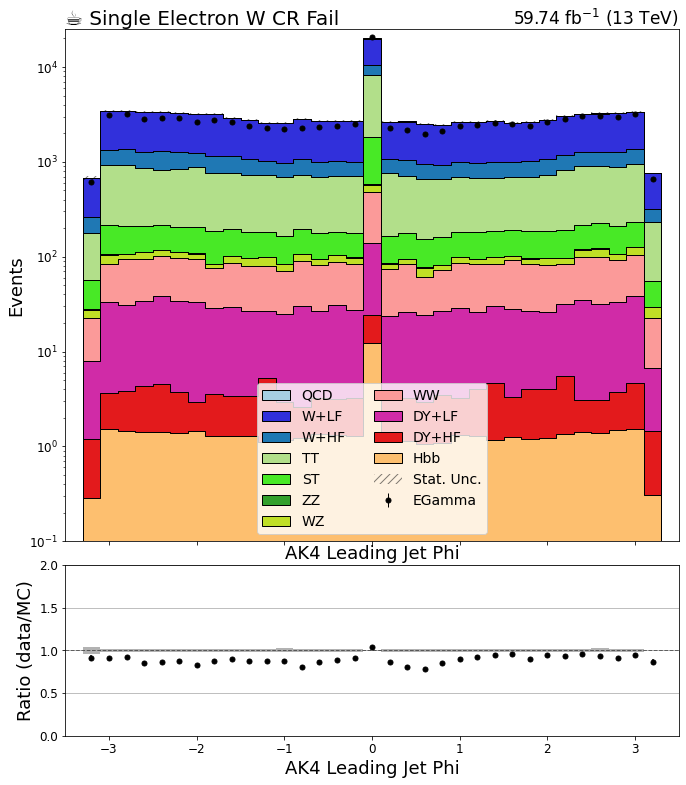

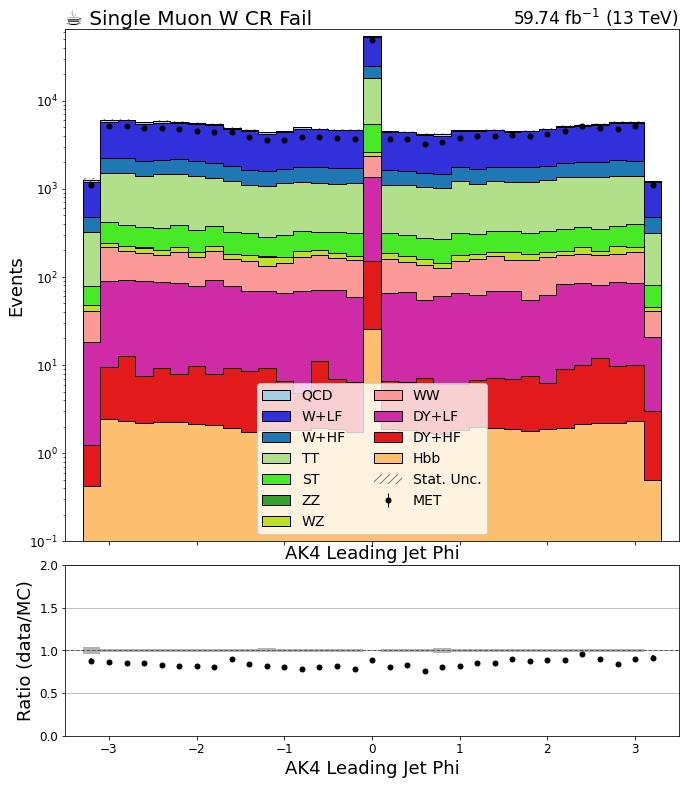

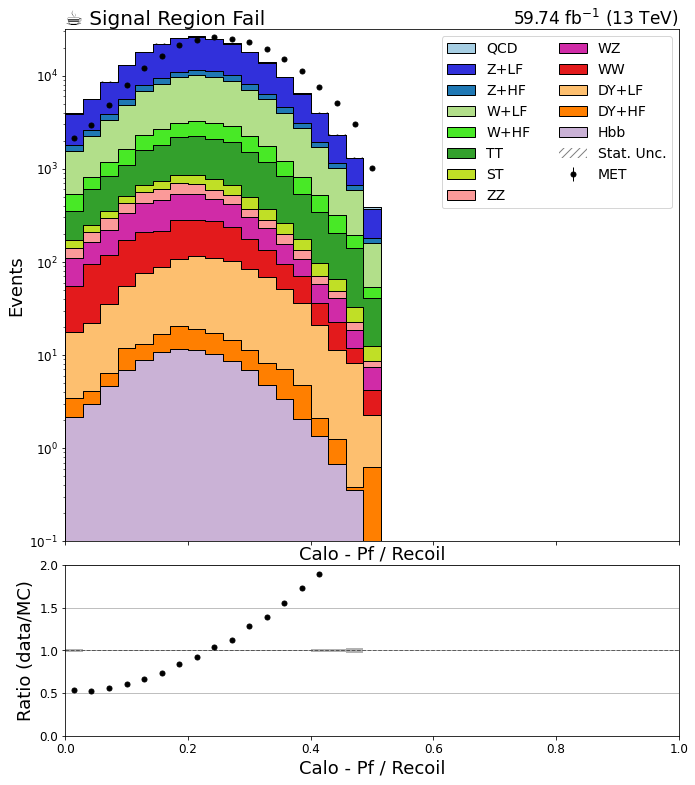

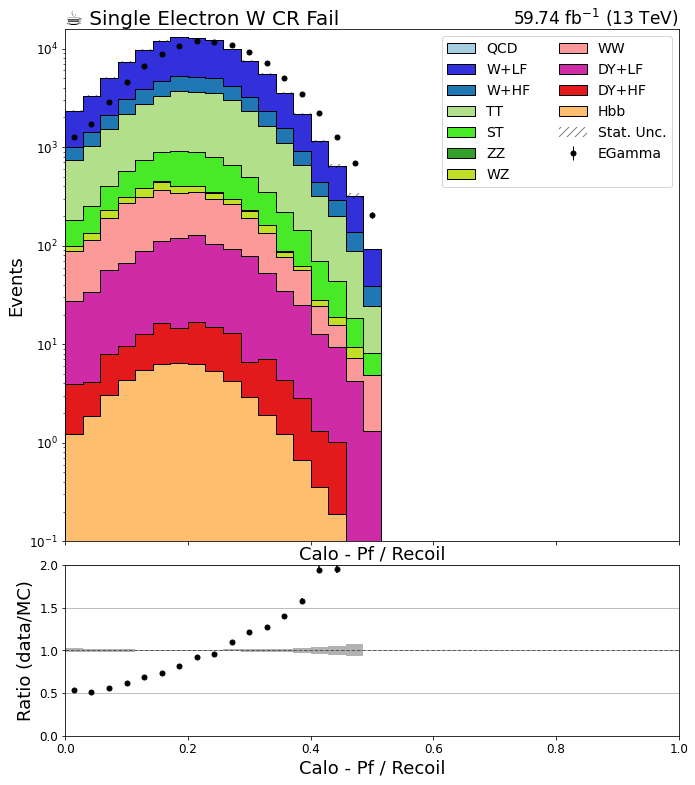

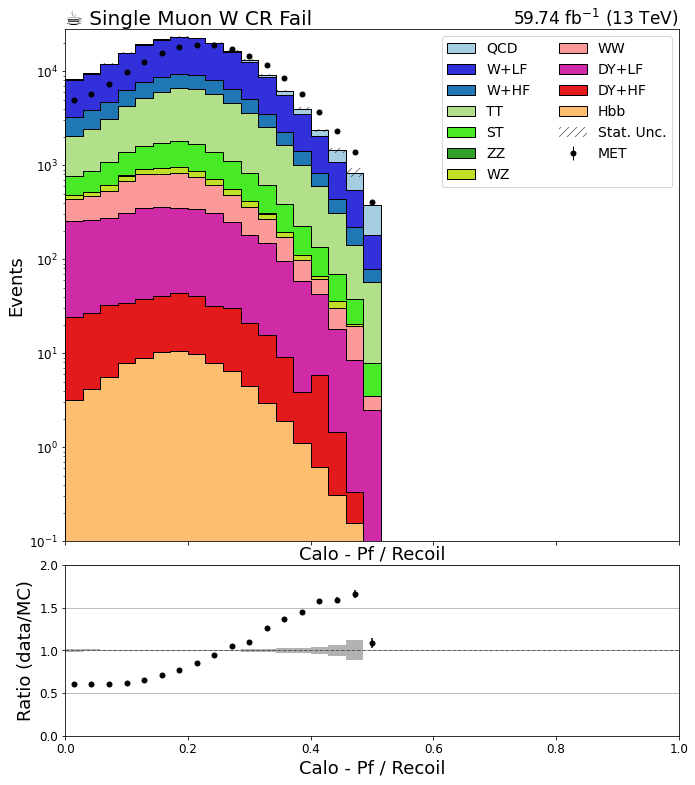

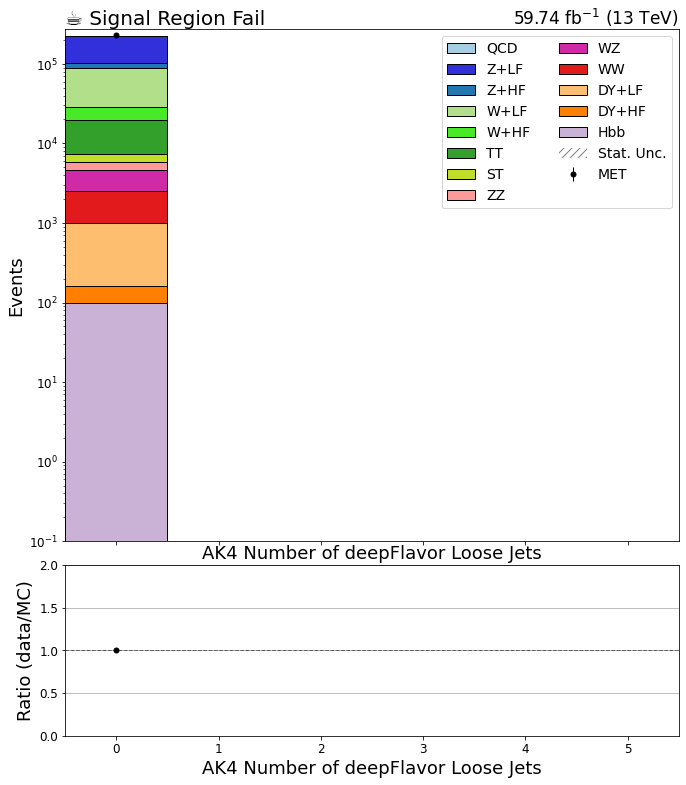

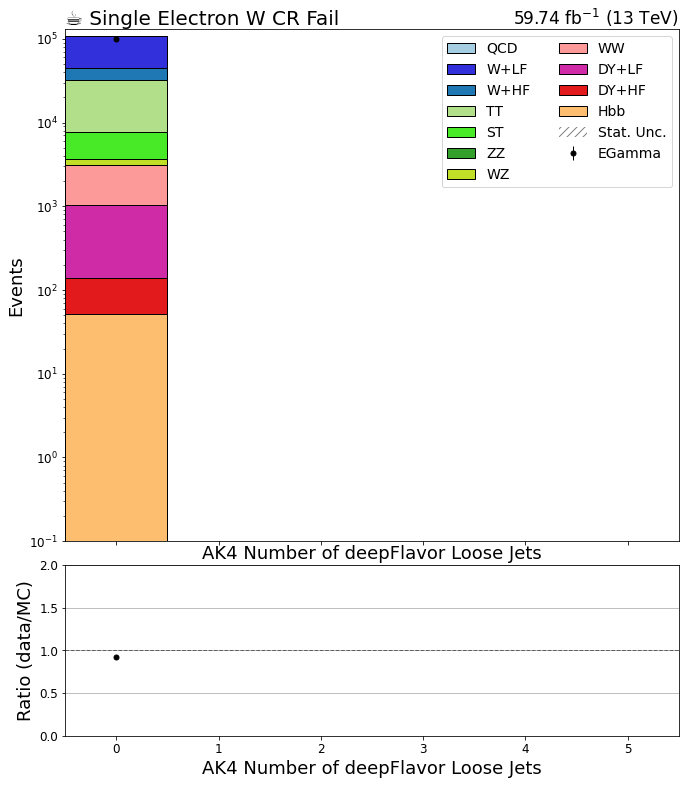

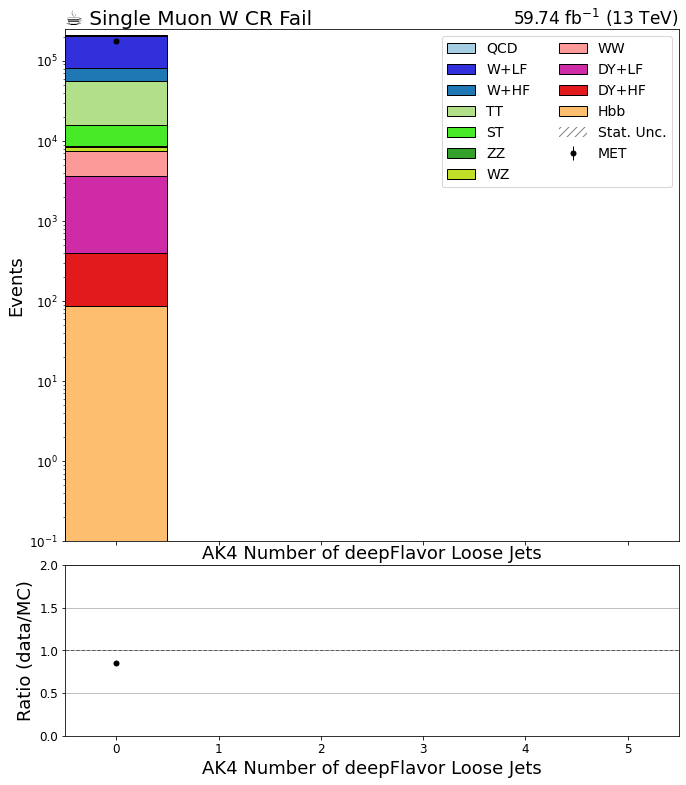

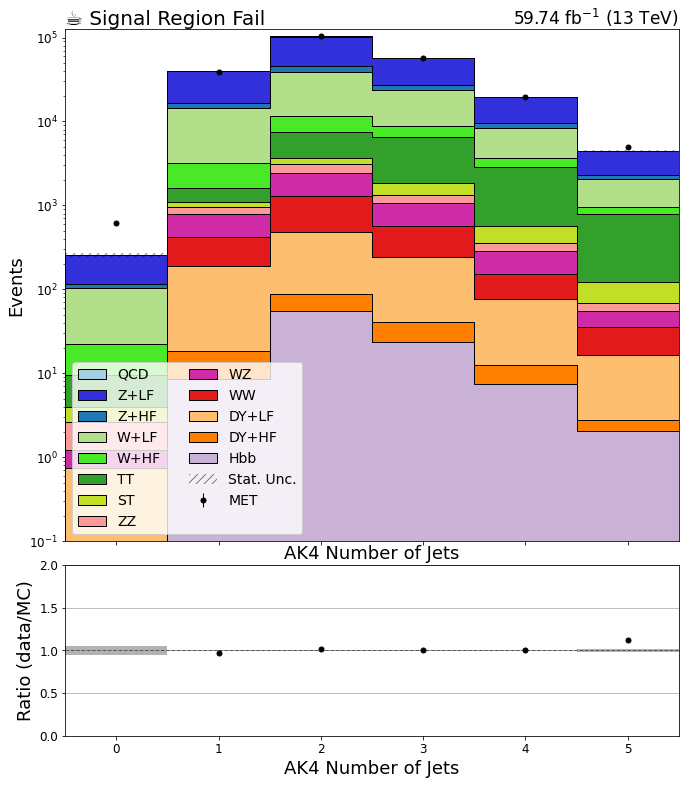

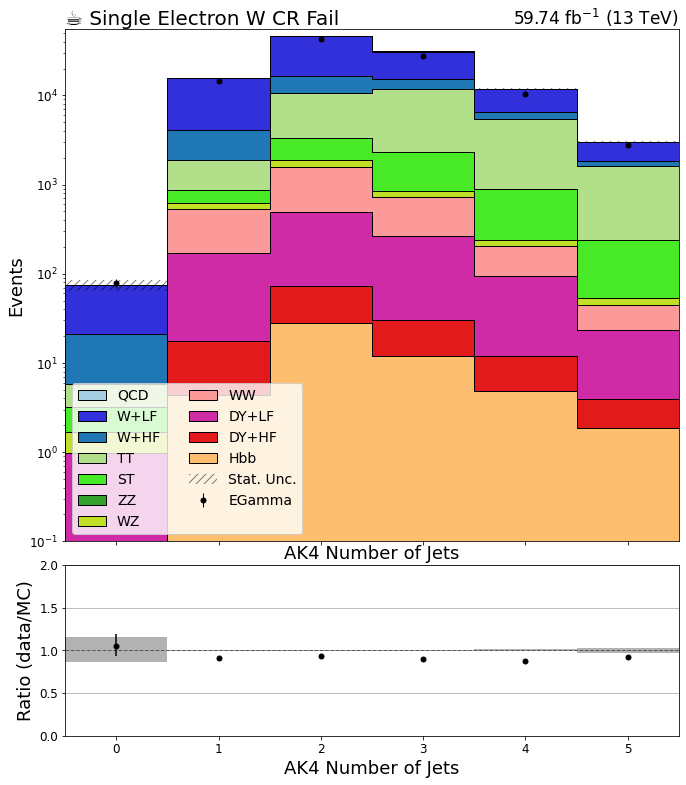

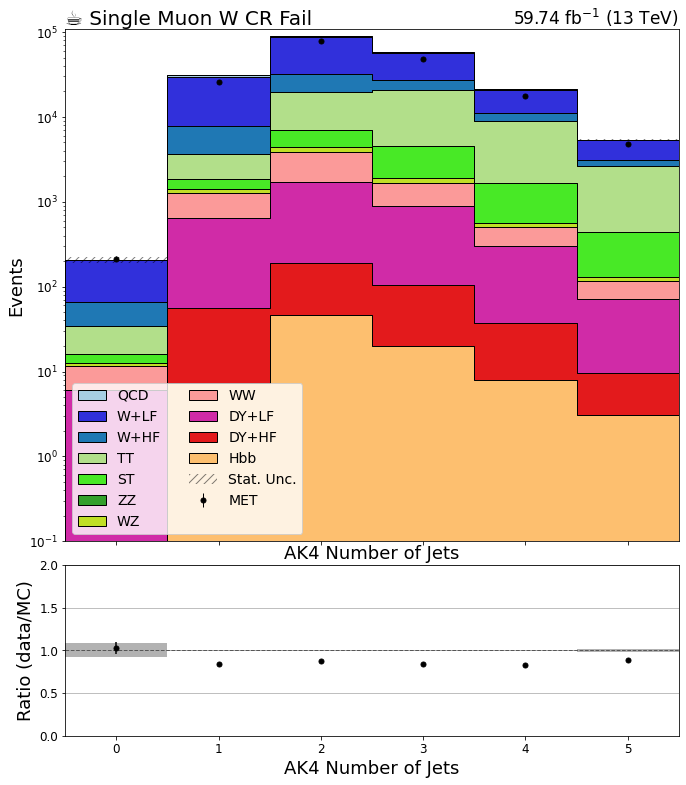

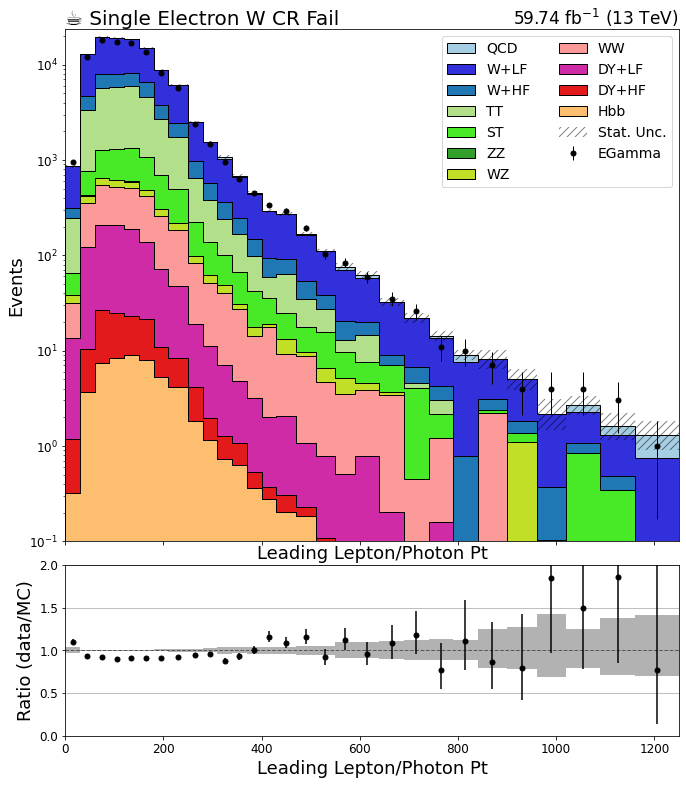

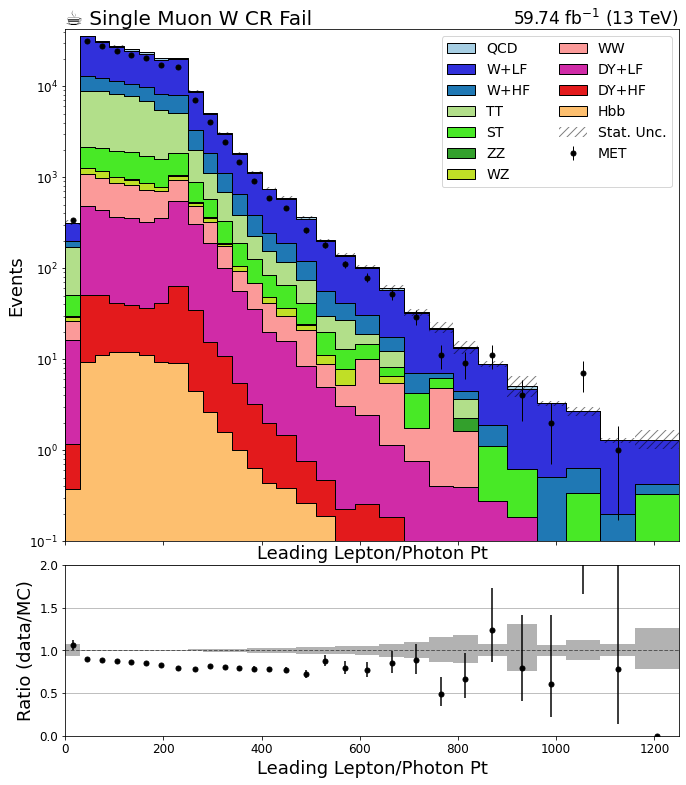

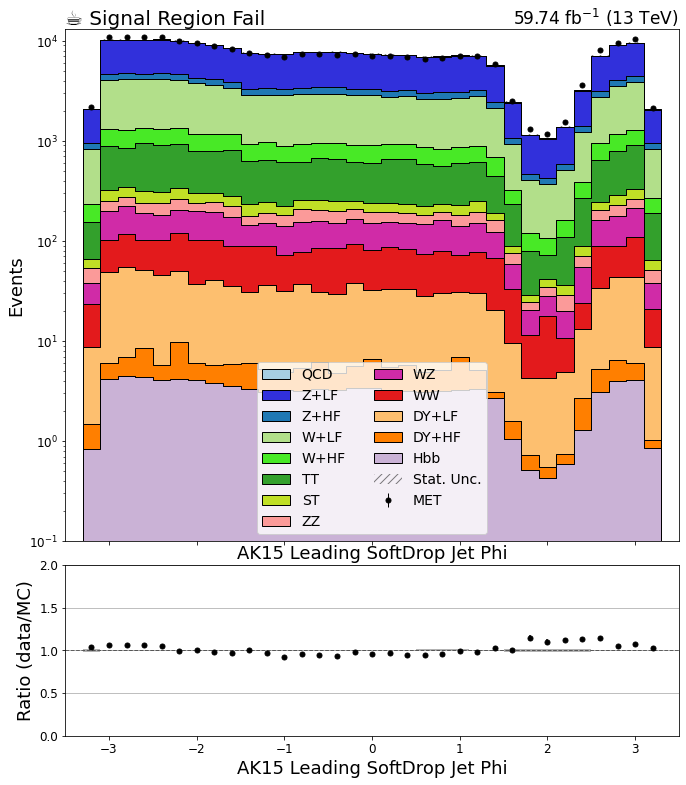

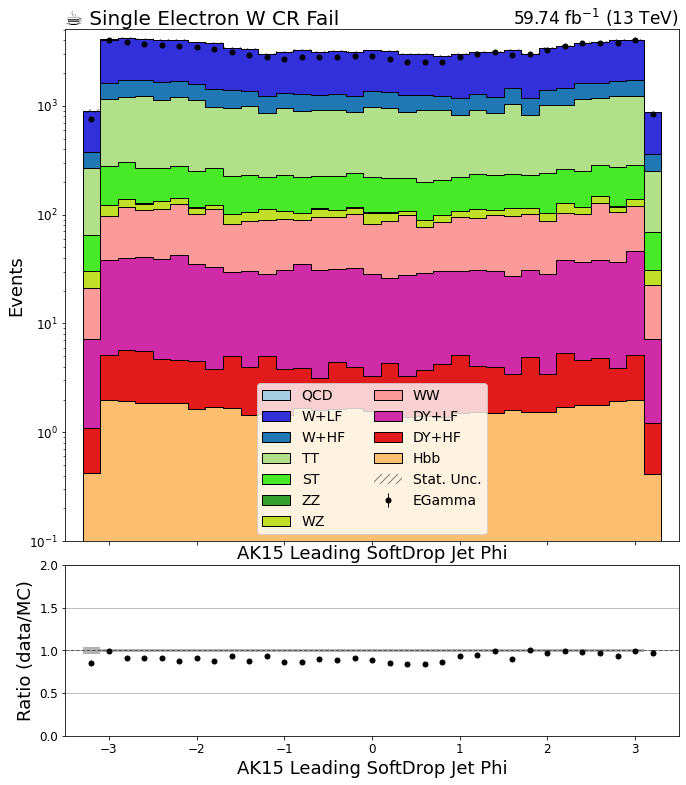

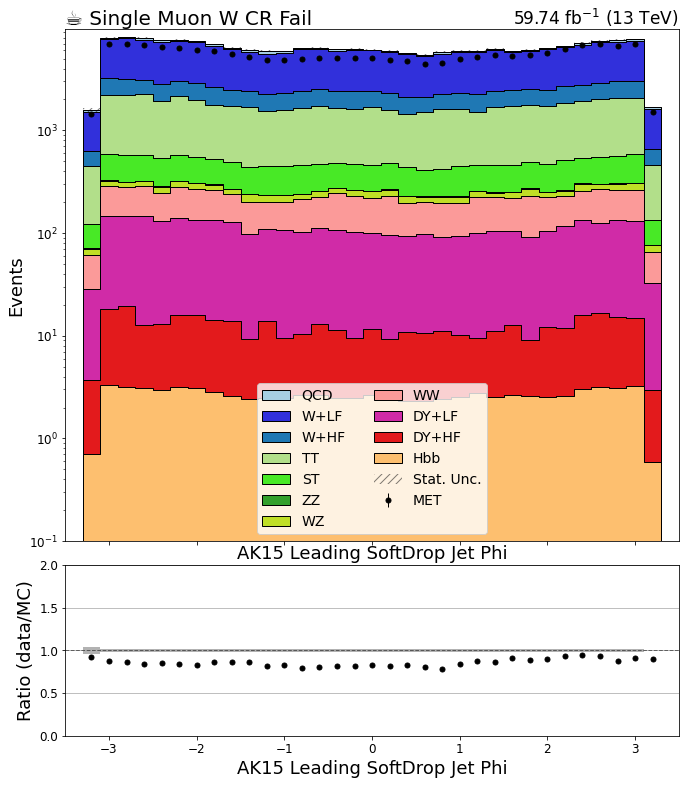

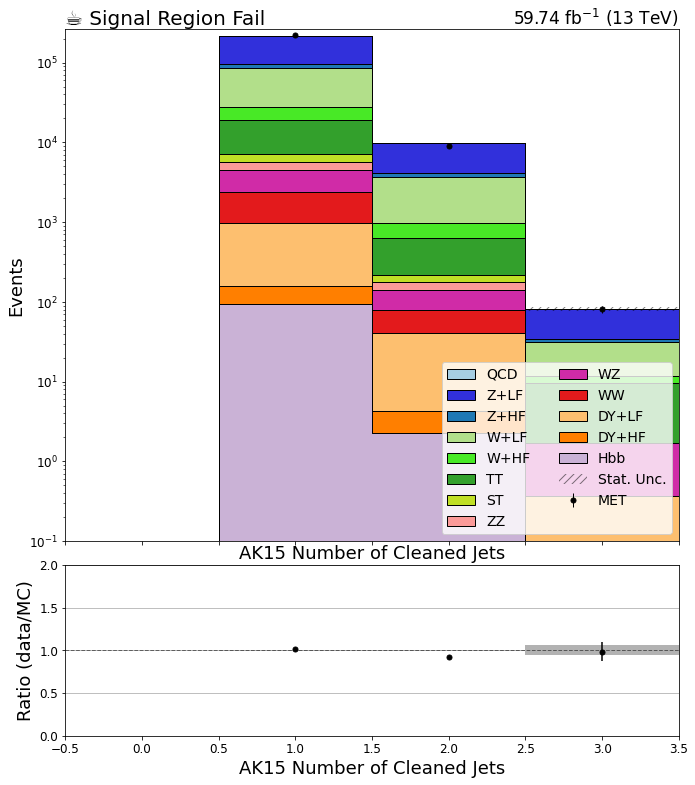

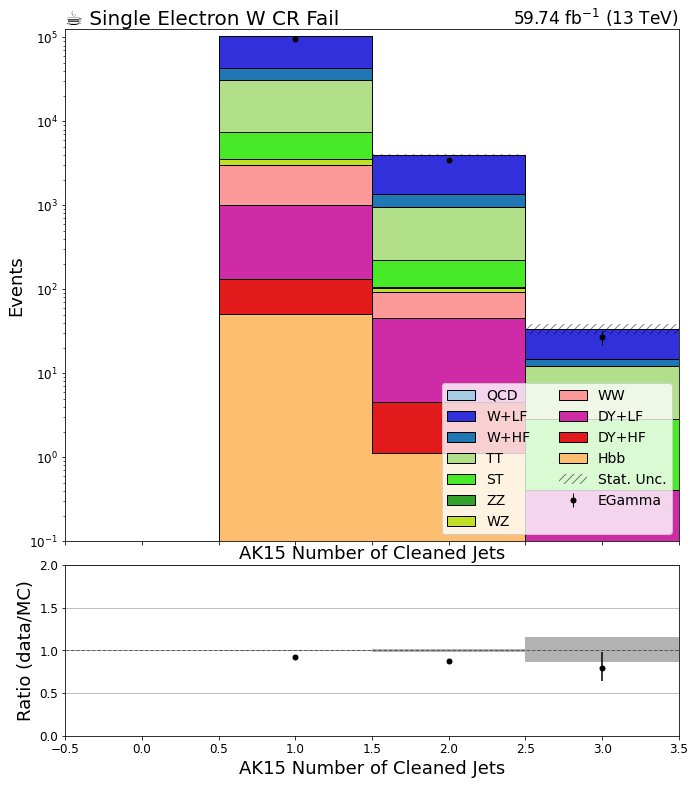

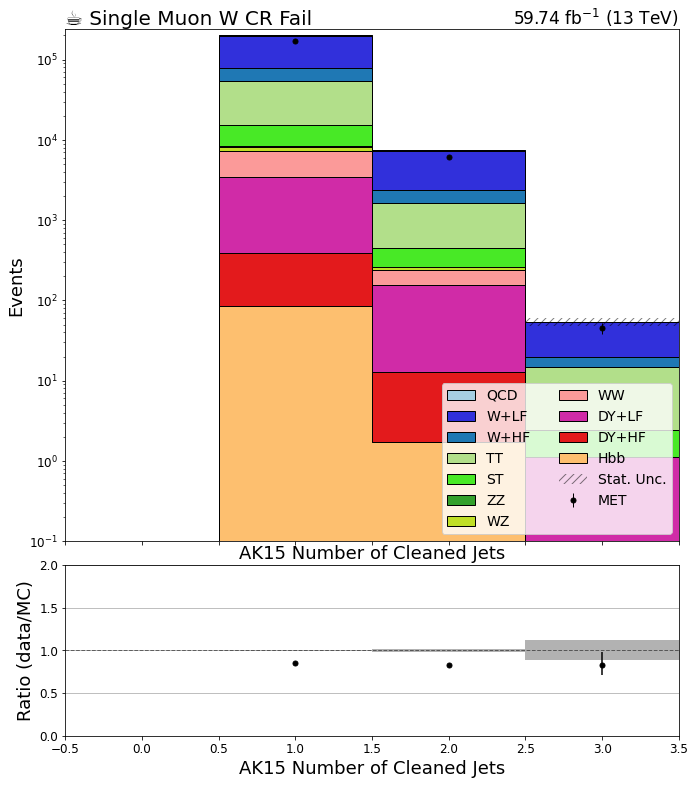

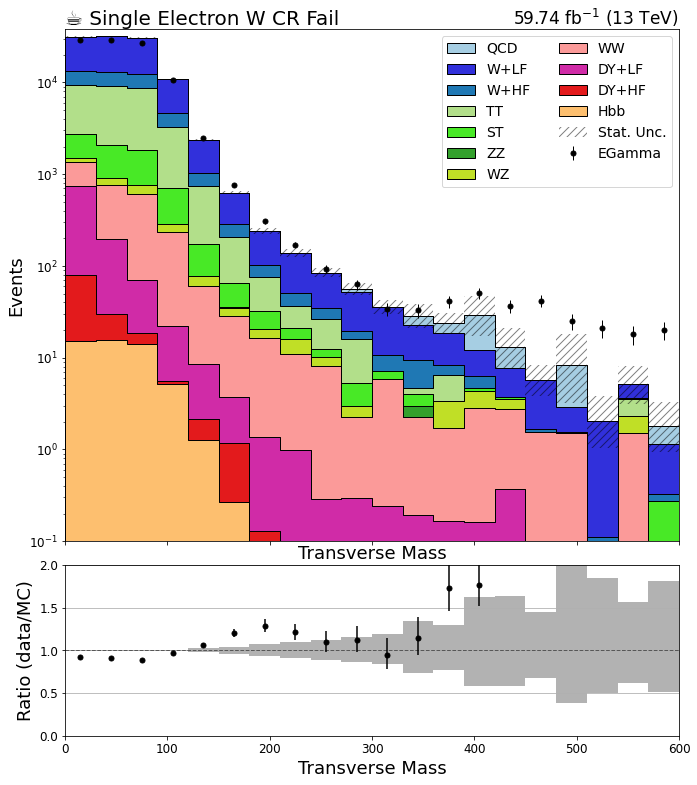

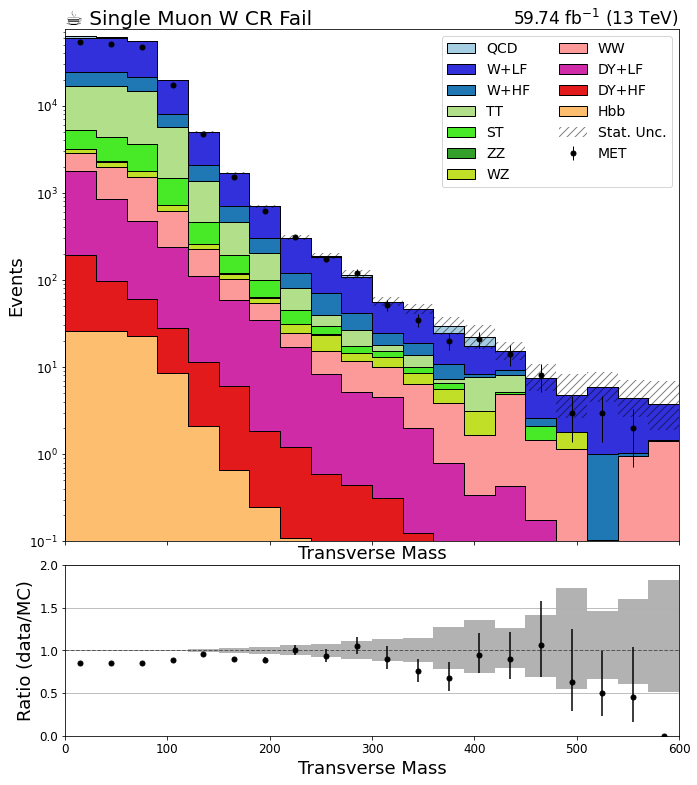

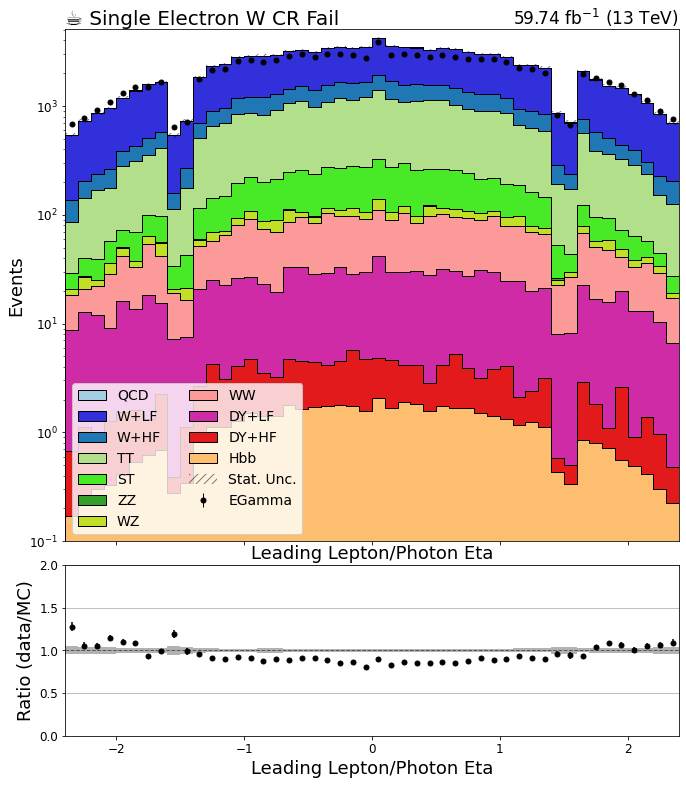

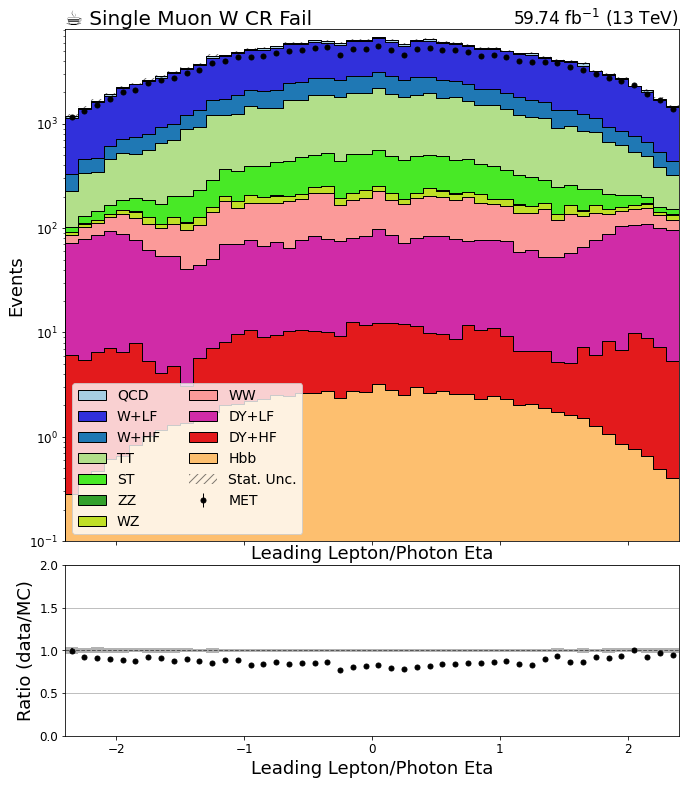

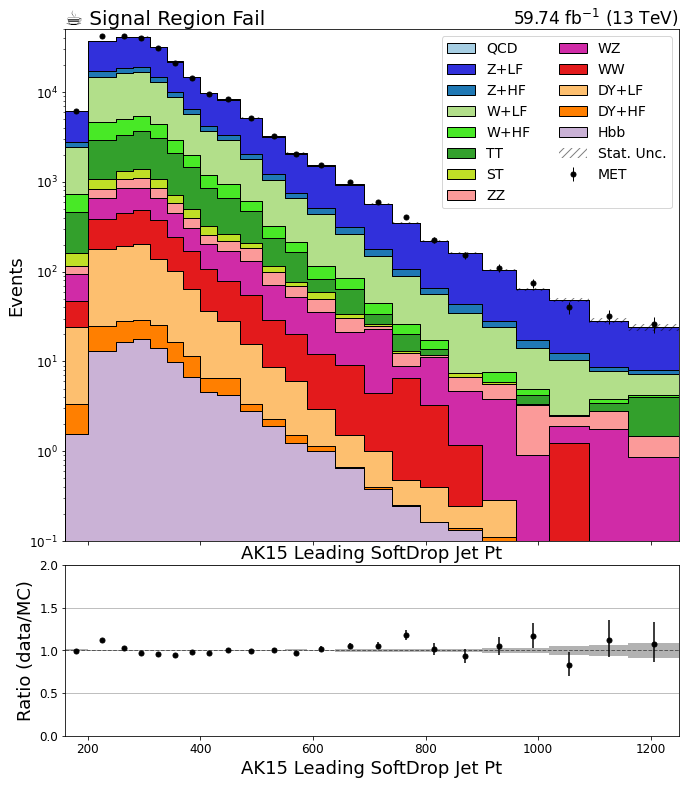

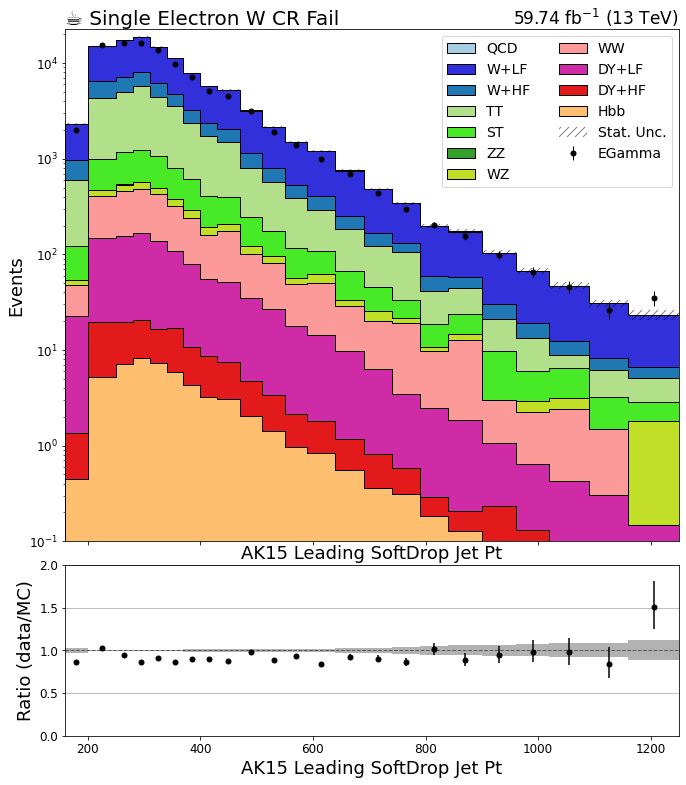

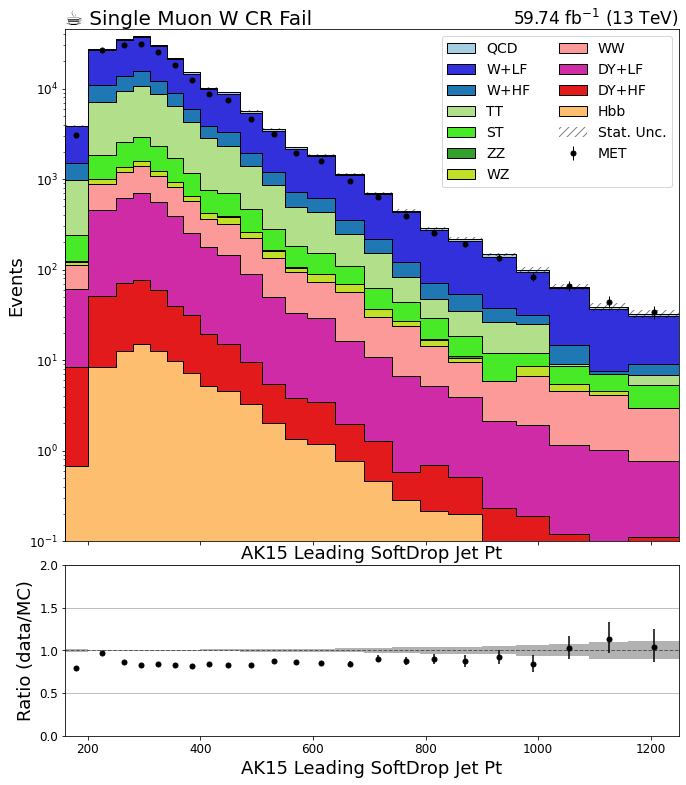

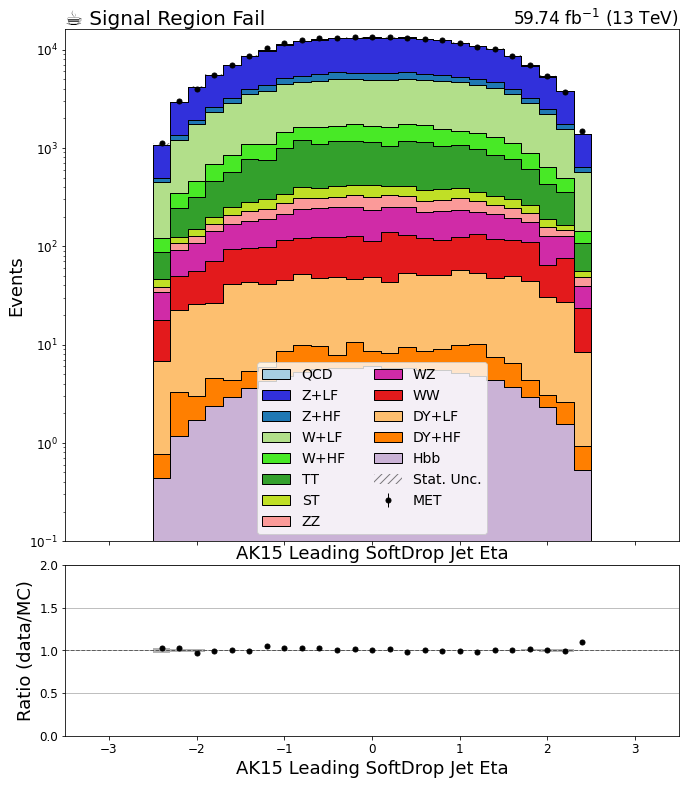

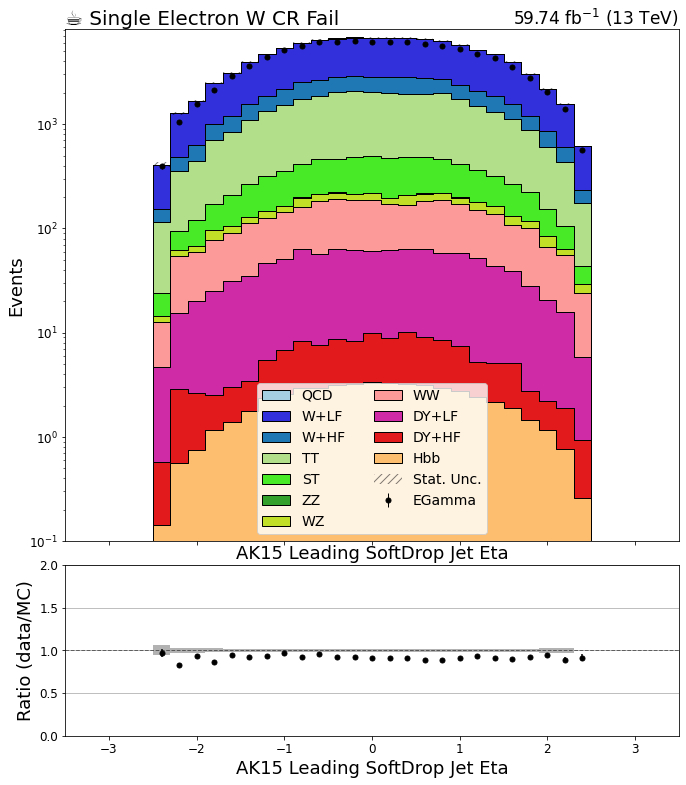

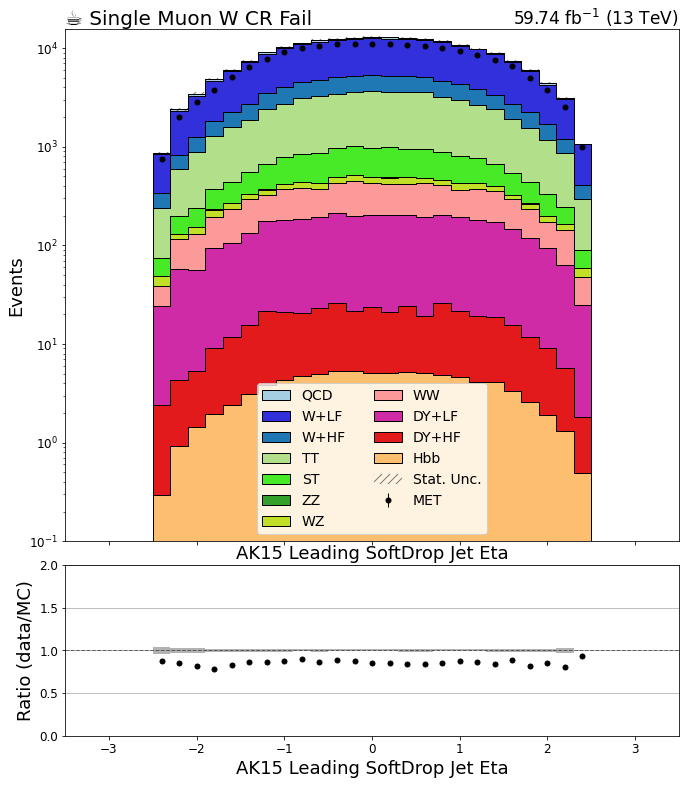

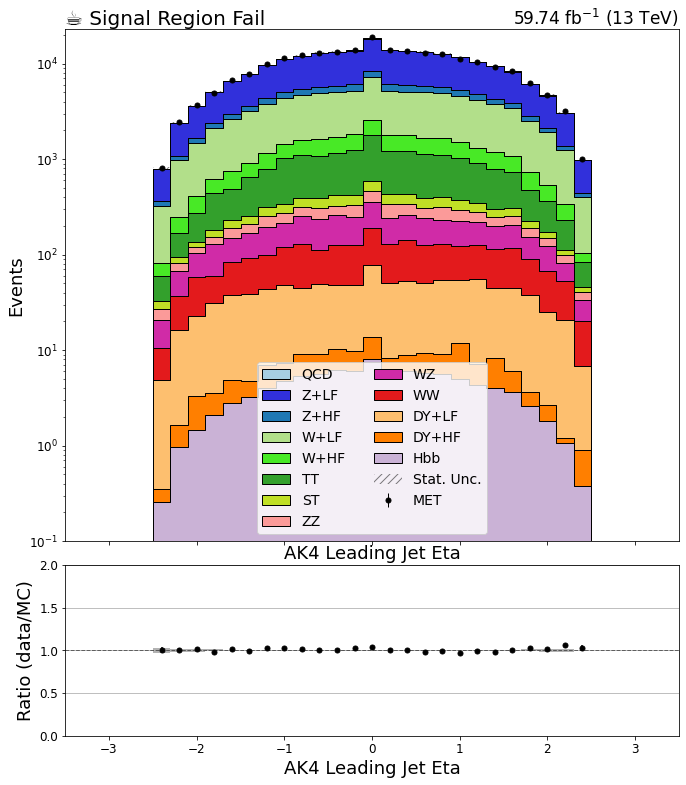

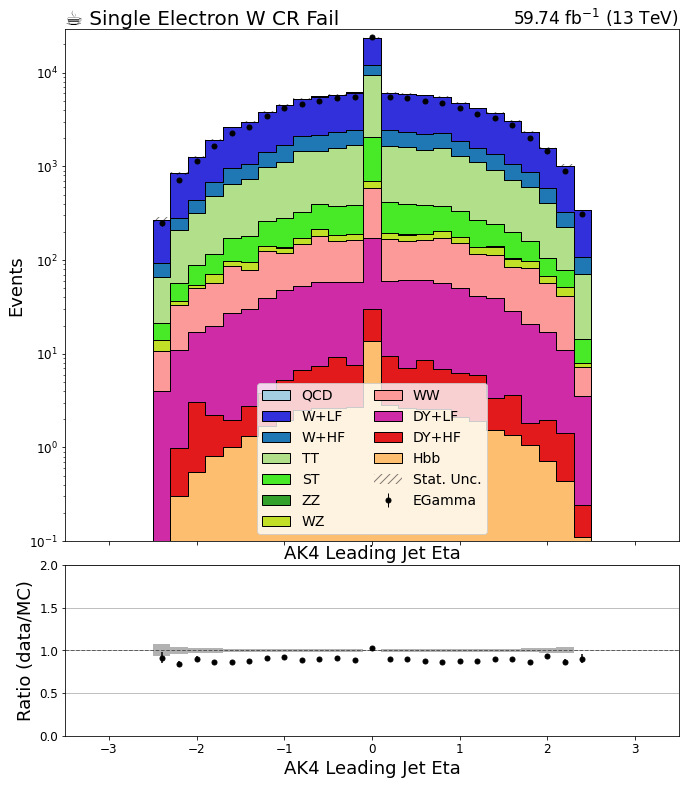

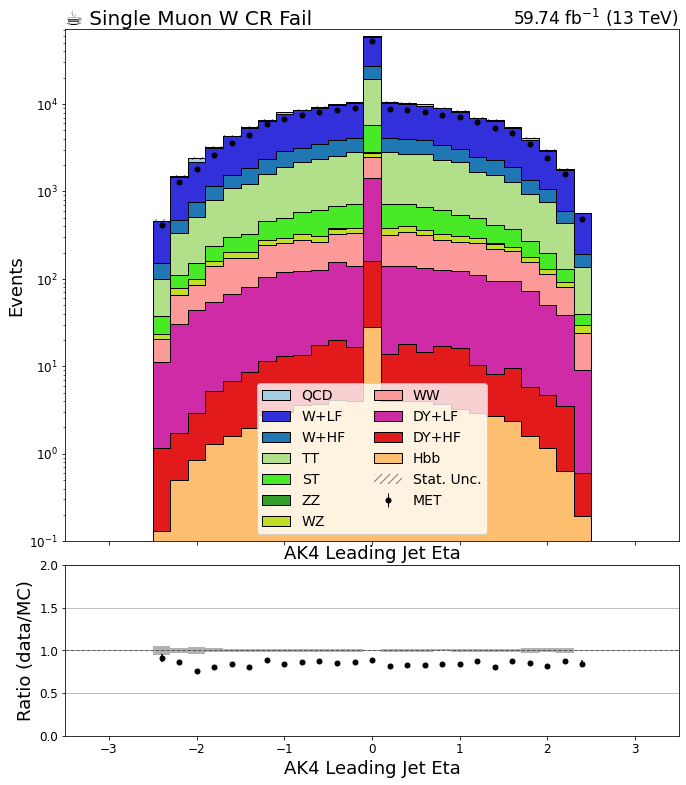

In [17]:
###
# Plot other variables
###
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    
from cycler import cycler
    
    
def plot_var(category, var=None):
    
    binning={
        'pass': pass_binning,
        'fail': fail_binning,
    }

    C={
        'pass':'Pass',
        'fail':'Fail',
        '':''
    }
    R={
        'sr':'Signal Region',
        'wmcr':'Single Muon W CR',
        'tmcr':'Single Muon Top CR',
        'wecr':'Single Electron W CR',
        'tecr':'Single Electron Top CR'
    }

    for key in bkg_hists.keys():
        
        if key=='sumw': continue
        if key=='template': continue
        if key=='cutflow': continue
        if key=='ZHbbvsQCD': continue
        if var and var not in key: continue
        
        #Rebin to pick either pass or fail
        bkg_hists_var=bkg_hists[key]
        signal_hists_var=signal_hists[key]
        data_hists_var=data_hists[key]
        if category is not '':
            bkg_hists_var.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
            signal_hists_var.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
            data_hists_var.rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',binning[category]))
            
        
        for j in bkg_hists_var.identifiers('region'):
            if 't' in str(j) and category=='fail': continue
            #if not (str(j) == 'tecr'): continue
            plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
            fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
            error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
            nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
            data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
            #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
            colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                      '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                      '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


            fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
            fig.subplots_adjust(hspace=.07)
            ax.set_prop_cycle(cycler(color=colors))

       
            plot.plot1d(bkg_hists_var.integrate('region',j).sum('ZHbbvsQCD'),
                            overlay="process",
                            ax=ax,
                            clear=False,
                            stack=True,
                            fill_opts=fill_opts,
                            error_opts=error_opts
                            )
    
            if not ('sr' in str(j) and category=='pass'):

                plot.plot1d(data_hists_var.integrate('region',j).sum('ZHbbvsQCD')[data[year][str(j)]],            
                            overlay="process",
                            ax=ax,
                            clear=False,
                            error_opts=data_err_opts
                            )

                plot.plotratio(data_hists_var.integrate('region',j).sum('ZHbbvsQCD').integrate('process',data[year][str(j)]), 
                           bkg_hists_var.integrate('region',j).sum('ZHbbvsQCD').sum('process'),
                           ax=rax,
                           #overflow='over',
                           error_opts=data_err_opts,
                           denom_fill_opts={},
                           guide_opts={},
                           unc='num'
                           )
        
            rax.set_ylabel('Ratio (data/MC)')
            rax.set_ylim(0.0,2.0)
            rax.grid(axis='y')

            ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
            args = {'linestyle':'--', 'linewidth': 5}
            ax.autoscale(axis='x', tight=True)
            ax.set_yscale('log')
            ax.set_ylim(.1, None)
            leg = ax.legend(ncol=2, loc='best')

            coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]]+" "+C[category], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
            lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
            os.system('mkdir -p ../plots/darkhiggs'+year+'/prefit/'+str(j)+'_'+category+'/')
            plot_path = os.path.abspath('../plots/darkhiggs'+year+'/prefit/'+str(j)+'_'+category+'/') 
            plot_name = 'stack_'+key+'.png'
            fig.savefig(os.path.join(plot_path, plot_name))
        
plot_var('pass')
plot_var('fail')

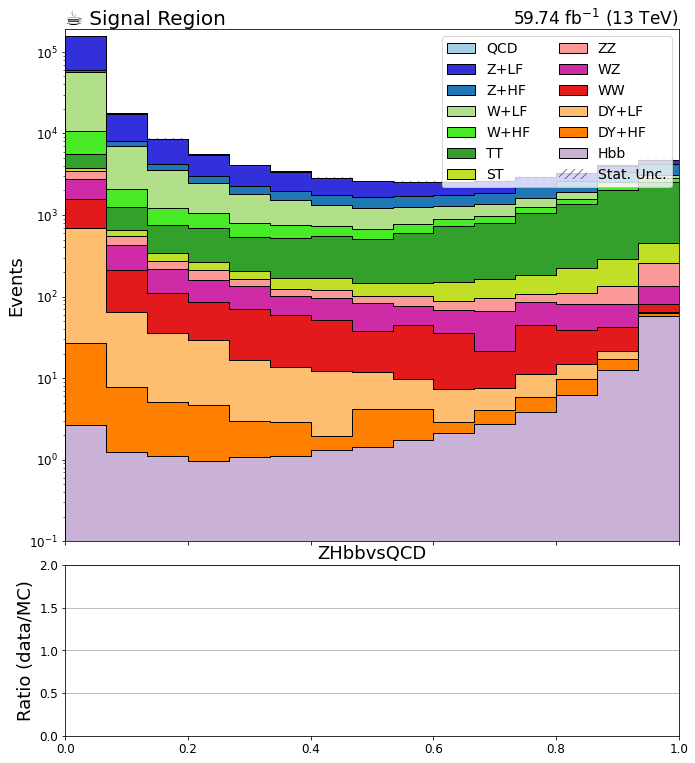

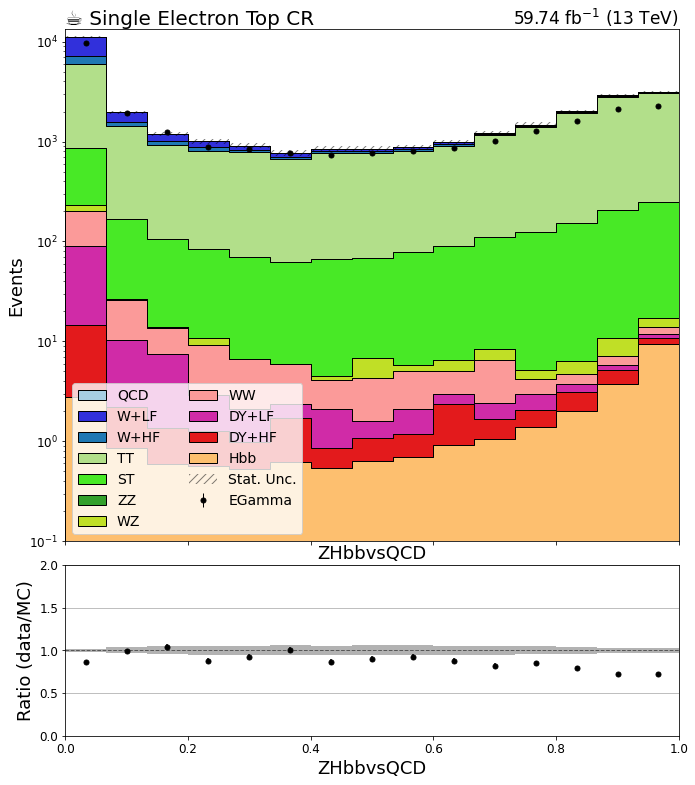

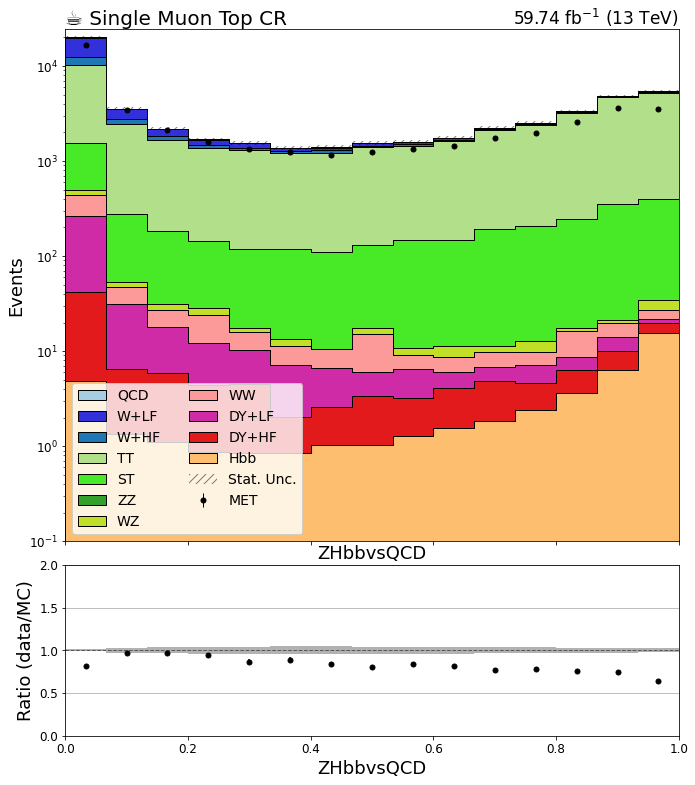

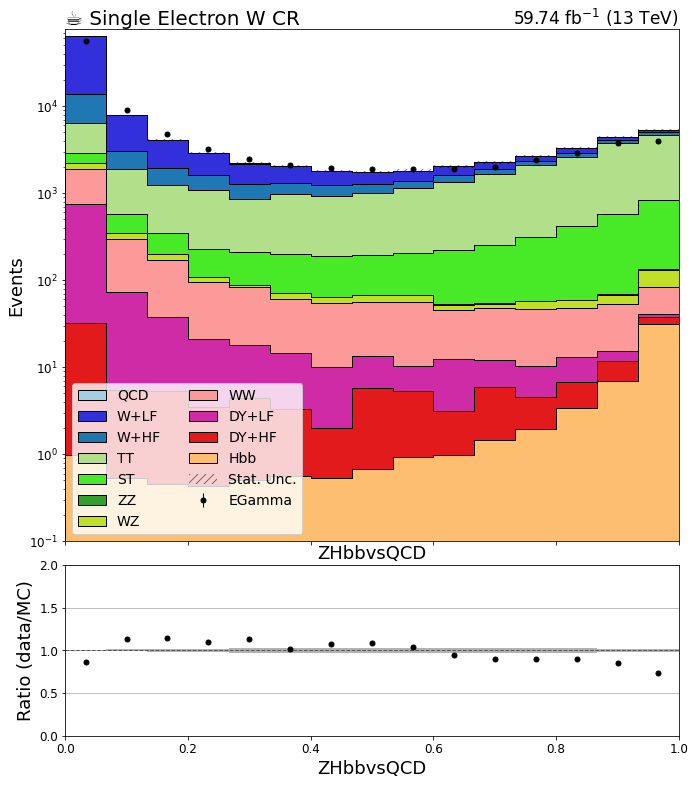

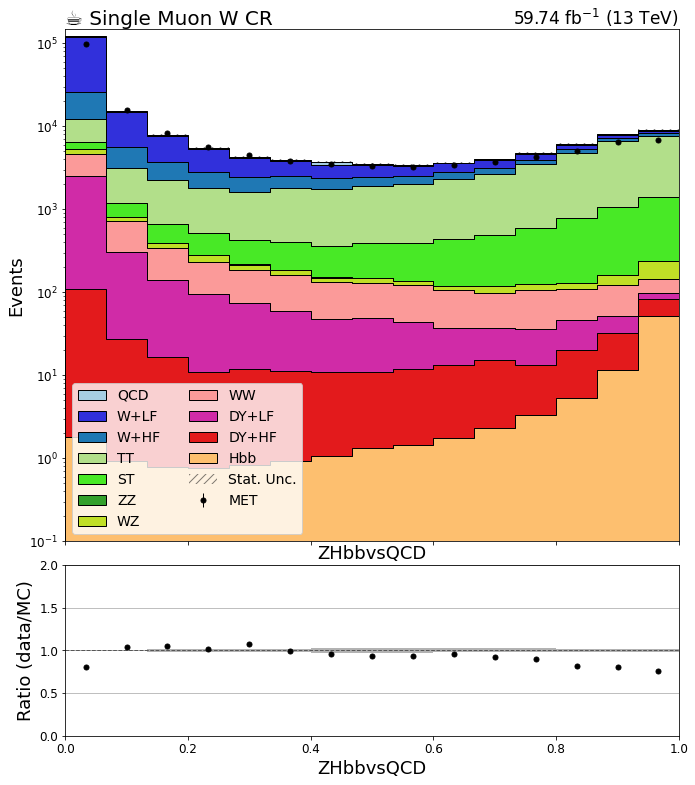

In [10]:
###
# N-1 of the fat jet tagger
###
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
    
from cycler import cycler

R={
    'sr':'Signal Region',
    'wmcr':'Single Muon W CR',
    'tmcr':'Single Muon Top CR',
    'wecr':'Single Electron W CR',
    'tecr':'Single Electron Top CR'
}

bkg_hists_ZHbbvsQCD=bkg_hists['ZHbbvsQCD']
signal_hists_ZHbbvsQCD=signal_hists['ZHbbvsQCD']
data_hists_ZHbbvsQCD=data_hists['ZHbbvsQCD']
        
for j in bkg_hists_ZHbbvsQCD.identifiers('region'):
    #if 't' in str(j): continue
    #if not (str(j) == 'tecr'): continue
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
    colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
              '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
              '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


    fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))

       
    plot.plot1d(bkg_hists_ZHbbvsQCD.integrate('region',j),
                    overlay="process",
                    ax=ax,
                    clear=False,
                    stack=True,
                    fill_opts=fill_opts,
                    error_opts=error_opts
                    )

    if not 'sr' in str(j):

        plot.plot1d(data_hists_ZHbbvsQCD.integrate('region',j)[data[year][str(j)]],            
                    overlay="process",
                    ax=ax,
                    clear=False,
                    error_opts=data_err_opts
                    )

        plot.plotratio(data_hists_ZHbbvsQCD.integrate('region',j).integrate('process',data[year][str(j)]), 
                   bkg_hists_ZHbbvsQCD.integrate('region',j).sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
    rax.set_ylabel('Ratio (data/MC)')
    rax.set_ylim(0.0,2.0)
    rax.grid(axis='y')

    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend(ncol=2, loc='best')

    coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumitext = plt.text(1., 1., lumi+r" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    os.system('mkdir -p ../plots/darkhiggs'+year+'/prefit/'+str(j)+'/')
    plot_path = os.path.abspath('../plots/darkhiggs'+year+'/prefit/'+str(j)+'/') 
    plot_name = 'stack_ZHbbvsQCD.png'
    fig.savefig(os.path.join(plot_path, plot_name))


In [10]:
###
# Preparing to plot systematics
###

process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)
sig_map = OrderedDict()
bkg_syst_map = OrderedDict()
bkg_syst_map["W+jets"] = ("W+*",)
bkg_syst_map["Z+jets"] = ("Z+*",)
bkg_syst_map["TT"] = ("TT*",)
bkg_syst_hists=bkg_hists['template'].group(cats, process, bkg_syst_map)

systematic = hist.Cat("systematic", "systematics", sorting='placement')
cats = ("systematic",)
btag_map = OrderedDict()
btag_map["nominal"] = ("nominal", )
btag_map["btagDown"] = ("btagDown*", )
btag_map["btagUp"] = ("btagUp*", )
ewk1_map = OrderedDict()
ewk1_map["nominal"] = ("nominal", )
ewk1_map["ew1Down"] = ("ew1Down", )
ewk1_map["ew1Up"] = ("ew1Up", )
ewk1_map["mixDown"] = ("mixDown", )
ewk1_map["mixUp"] = ("mixUp", )
ewk2_map = OrderedDict()
ewk2_map["nominal"] = ("nominal", )
ewk2_map["ew2GDown"] = ("ew2GDown", )
ewk2_map["ew2GUp"] = ("ew2GUp", )
ewk2_map["ew2WDown"] = ("ew2WDown", )
ewk2_map["ew2WUp"] = ("ew2WUp", )
ewk2_map["ew2ZDown"] = ("ew2ZDown", )
ewk2_map["ew2ZUp"] = ("ew2ZUp", )
ewk3_map = OrderedDict()
ewk3_map["nominal"] = ("nominal", )
ewk3_map["ew3GDown"] = ("ew3GDown", )
ewk3_map["ew3GUp"] = ("ew3GUp", )
ewk3_map["ew3WDown"] = ("ew3WDown", )
ewk3_map["ew3WUp"] = ("ew3WUp", )
ewk3_map["ew3ZDown"] = ("ew3ZDown", )
ewk3_map["ew3ZUp"] = ("ew3ZUp", )
qcd_map = OrderedDict()
qcd_map["nominal"] = ("nominal", )
qcd_map["qcd1Down"] = ("qcd1Down", )
qcd_map["qcd1Up"] = ("qcd1Up", )
qcd_map["qcd2Down"] = ("qcd2Down", )
qcd_map["qcd2Up"] = ("qcd2Up", )
qcd_map["qcd3Down"] = ("qcd3Down", )
qcd_map["qcd3Up"] = ("qcd3Up", )
mu_map = OrderedDict()
mu_map["nominal"] = ("nominal", )
mu_map["muFDown"] = ("muFDown", )
mu_map["muFUp"] = ("muFUp", )
mu_map["muRDown"] = ("muRDown", )
mu_map["muRUp"] = ("muRUp", )

syst_hists={
    'btag':bkg_syst_hists.group(cats, systematic, btag_map),
    'ewk1':bkg_syst_hists.group(cats, systematic, ewk1_map),
    'ewk2':bkg_syst_hists.group(cats, systematic, ewk2_map),
    'ewk3':bkg_syst_hists.group(cats, systematic, ewk3_map),
    'qcd':bkg_syst_hists.group(cats, systematic, qcd_map),
    'mu':bkg_syst_hists.group(cats, systematic, mu_map)
}

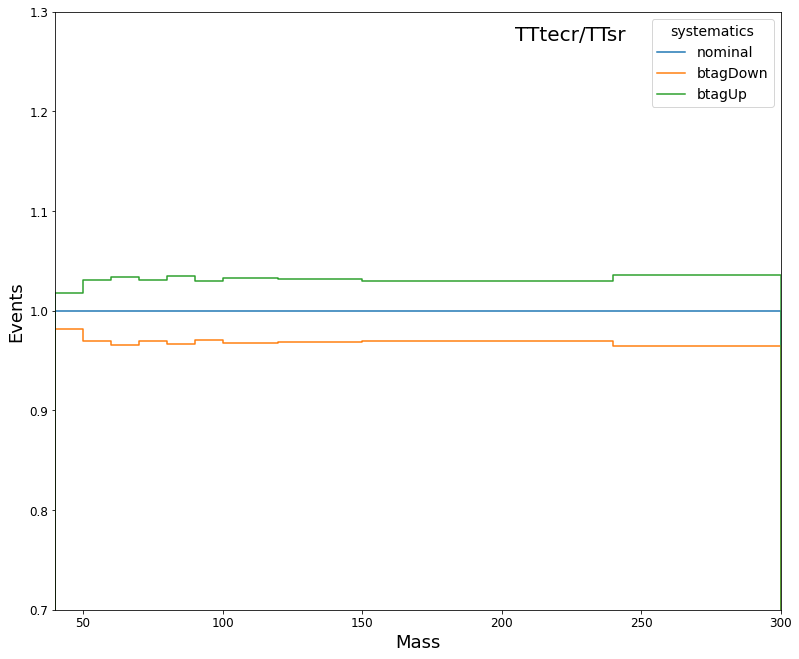

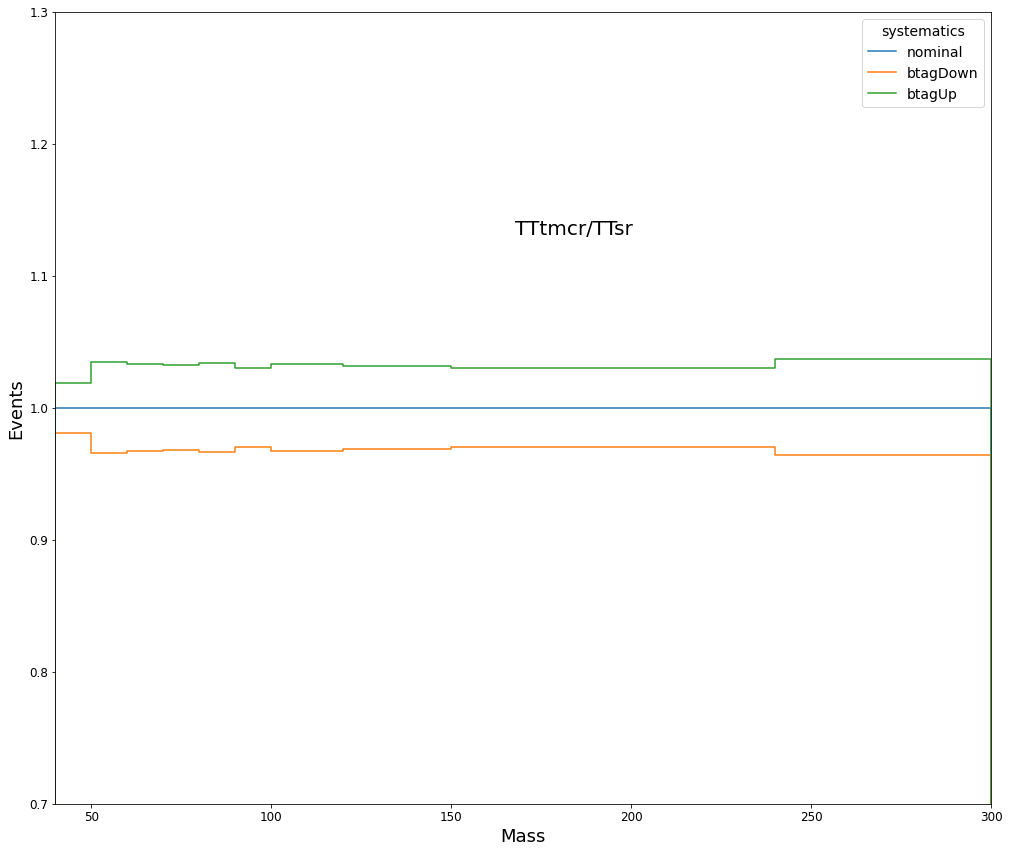

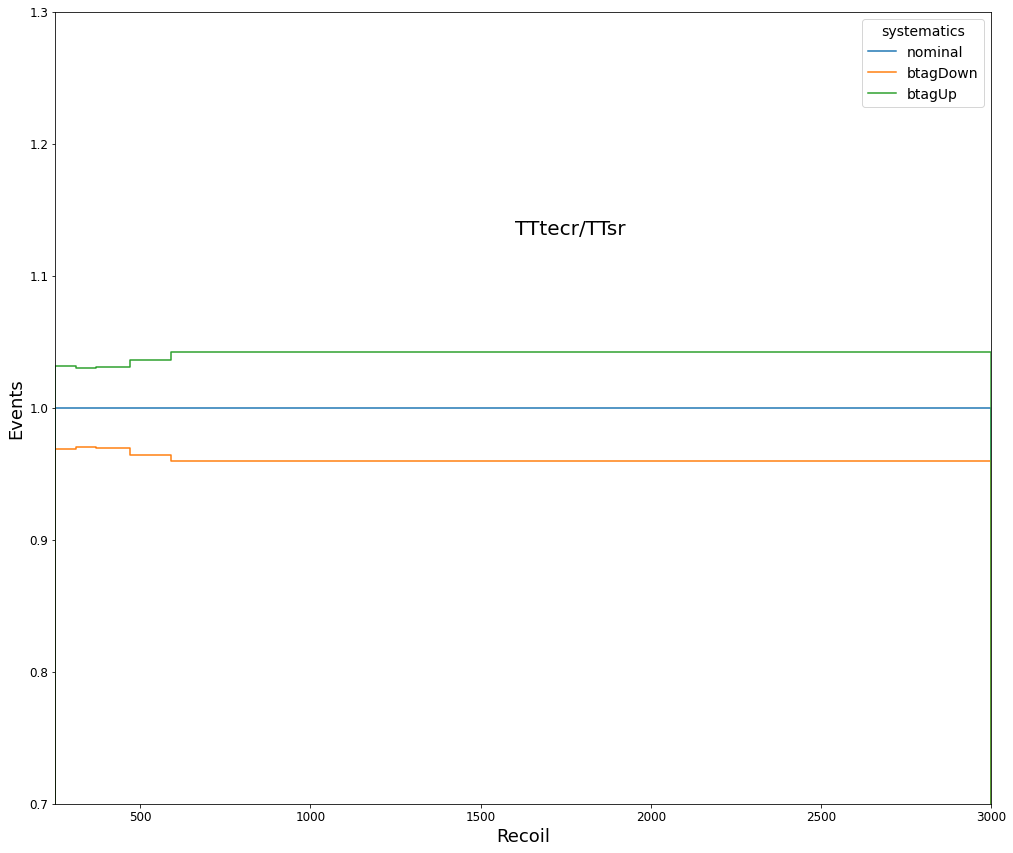

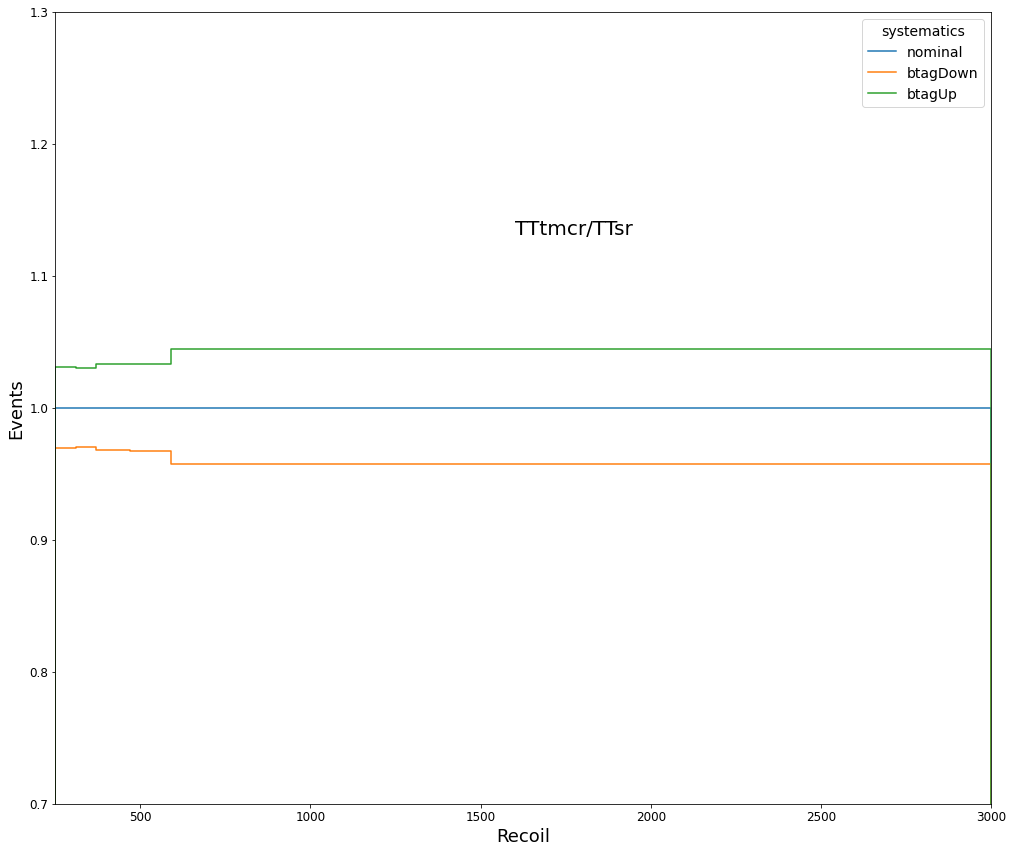

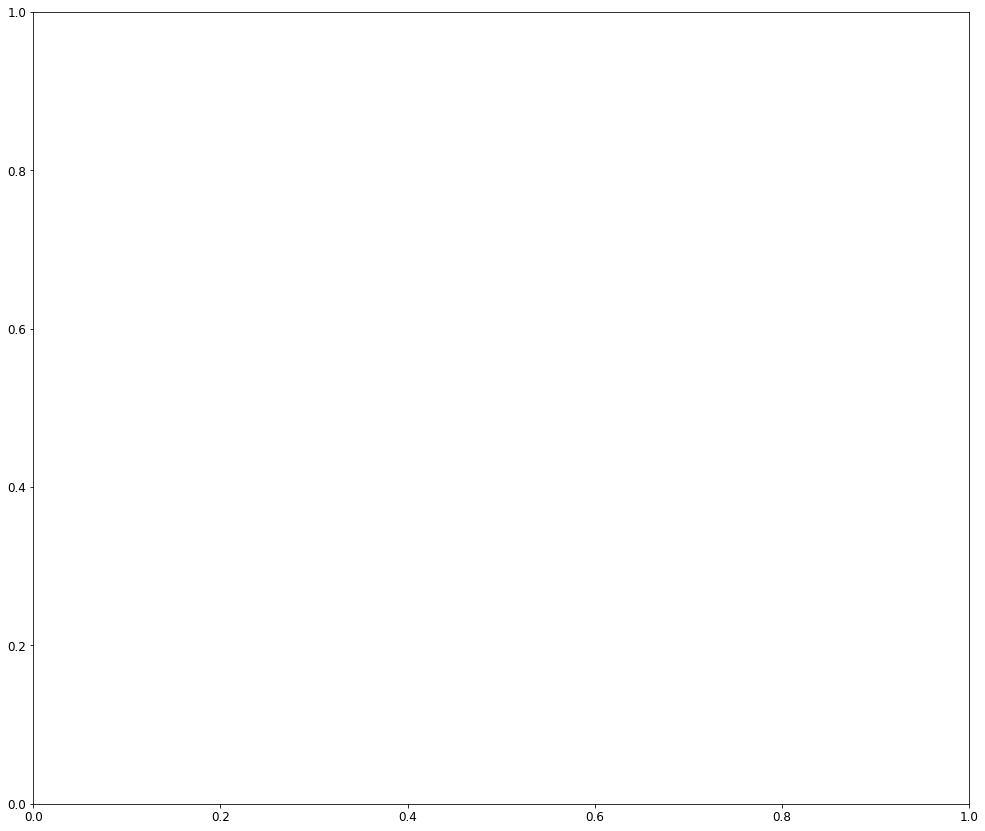

In [11]:
###
# Plot b-tag systematic
###

import matplotlib.patches as patches

def plot_btag(region, var):
    varlist=['recoil','fjmass']
    varlist.remove(var)
    
    ttsr=syst_hists['btag'].integrate('region','sr').integrate('process', 'TT').sum(varlist[0],'ZHbbvsQCD',overflow='all')
    for syst in ttsr.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        ttsr.values()[(str(syst),)]/=ttsr.values()[('nominal',)]
    ttsr.values()[('nominal',)]/=ttsr.values()[('nominal',)]
    
    tt=syst_hists['btag'].integrate('region',region).integrate('process', 'TT').sum(varlist[0],'ZHbbvsQCD',overflow='all')
    for syst in tt.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        tt.values()[(str(syst),)]/=tt.values()[('nominal',)]
        tt.values()[(str(syst),)]/=ttsr.values()[(str(syst),)]
    
    tt.values()[('nominal',)]/=ttsr.values()[('nominal',)]
    tt.values()[('nominal',)]/=tt.values()[('nominal',)]
    
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(13,11)})
    plot = hist.plot1d(tt,overlay='systematic',error_opts=None,line_opts={'linestyle':'solid'})
    plot.set_ylim(0.7, 1.3)
    # build a rectangle in axes coords
    left, width = .0, .55
    bottom, height = .25, .55
    right = left + width
    top = bottom + height
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plot.text(right, top, 'TT'+region+'/TTsr',
            fontsize=20, 
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)
    os.system('mkdir -p ../plots/darkhiggs'+year+'/systematics/')
    plot_path = os.path.abspath('../plots/darkhiggs'+year+'/systematics/') 
    plot_name = 'btag_'+region+'_pass_'+var+'_TT.png'
    fig.savefig(os.path.join(plot_path, plot_name))

plot_btag('tecr', 'fjmass')
plot_btag('tmcr', 'fjmass')
plot_btag('tecr', 'recoil')
plot_btag('tmcr', 'recoil')
    


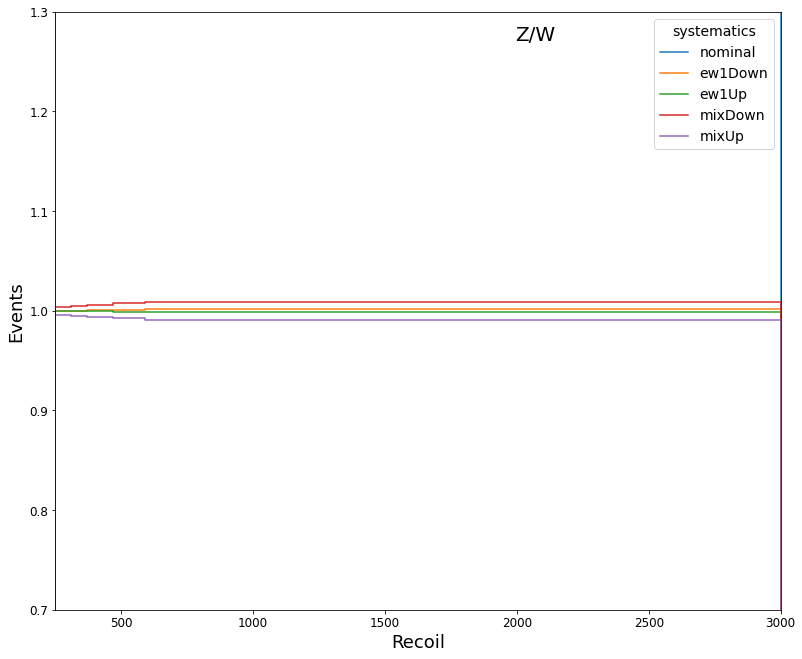

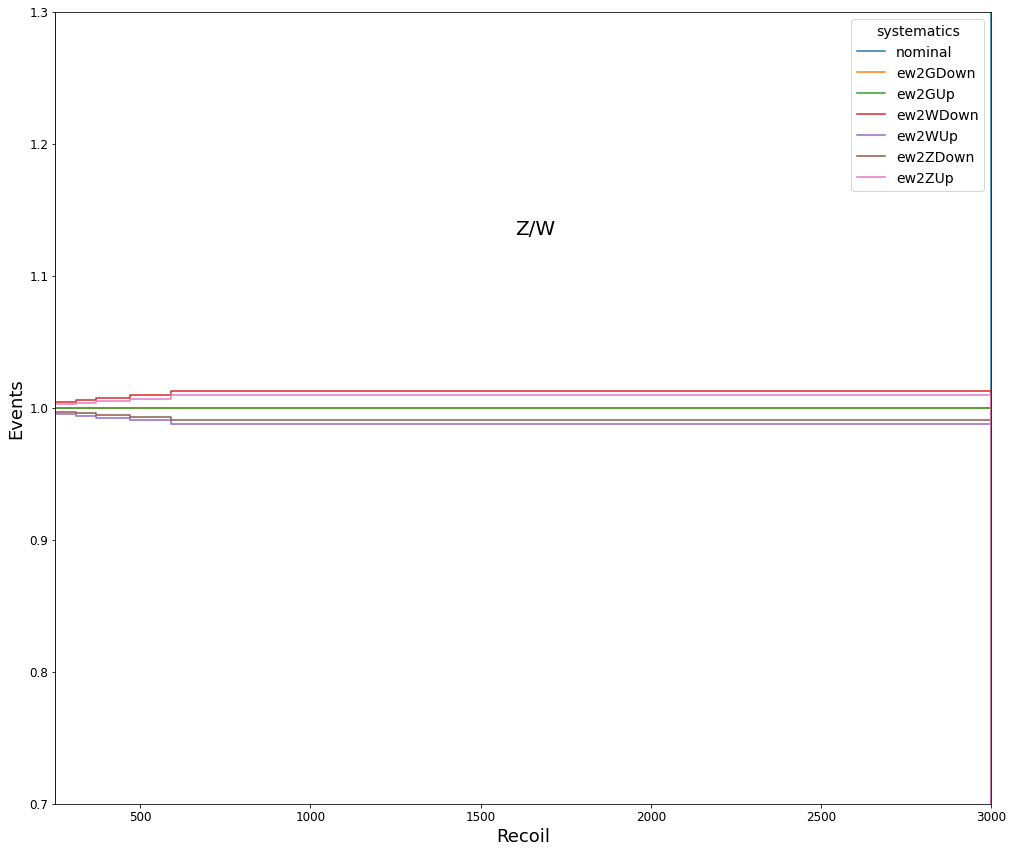

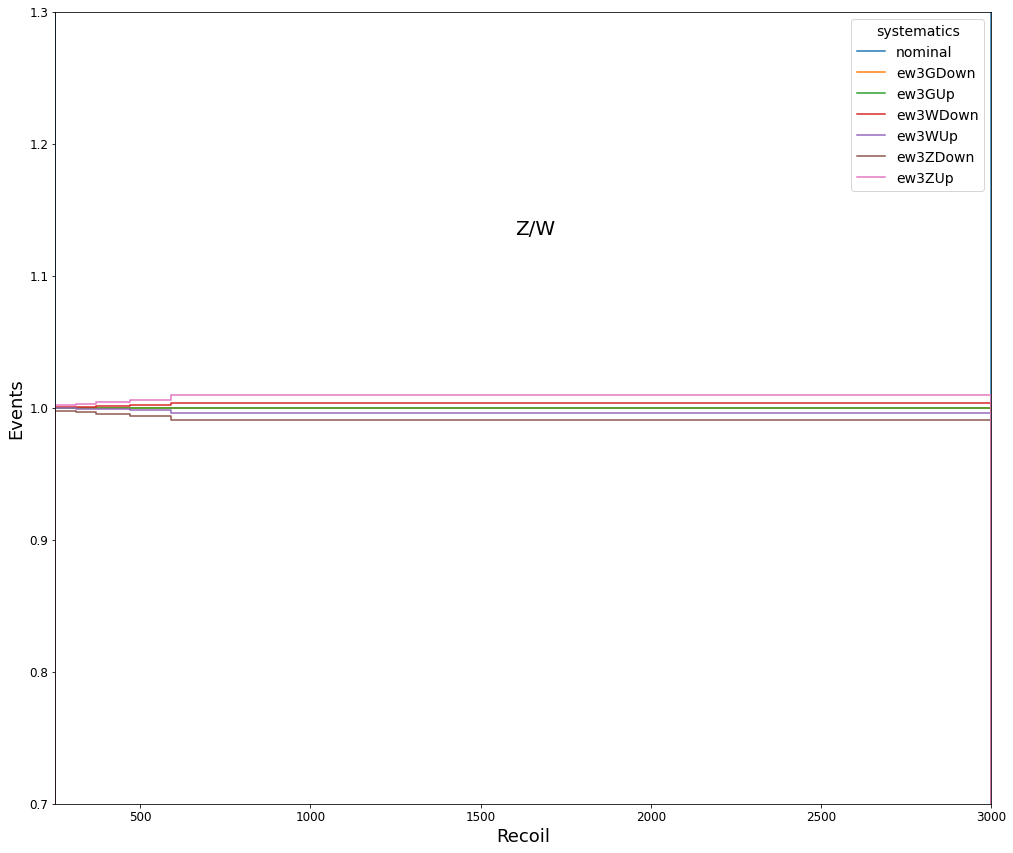

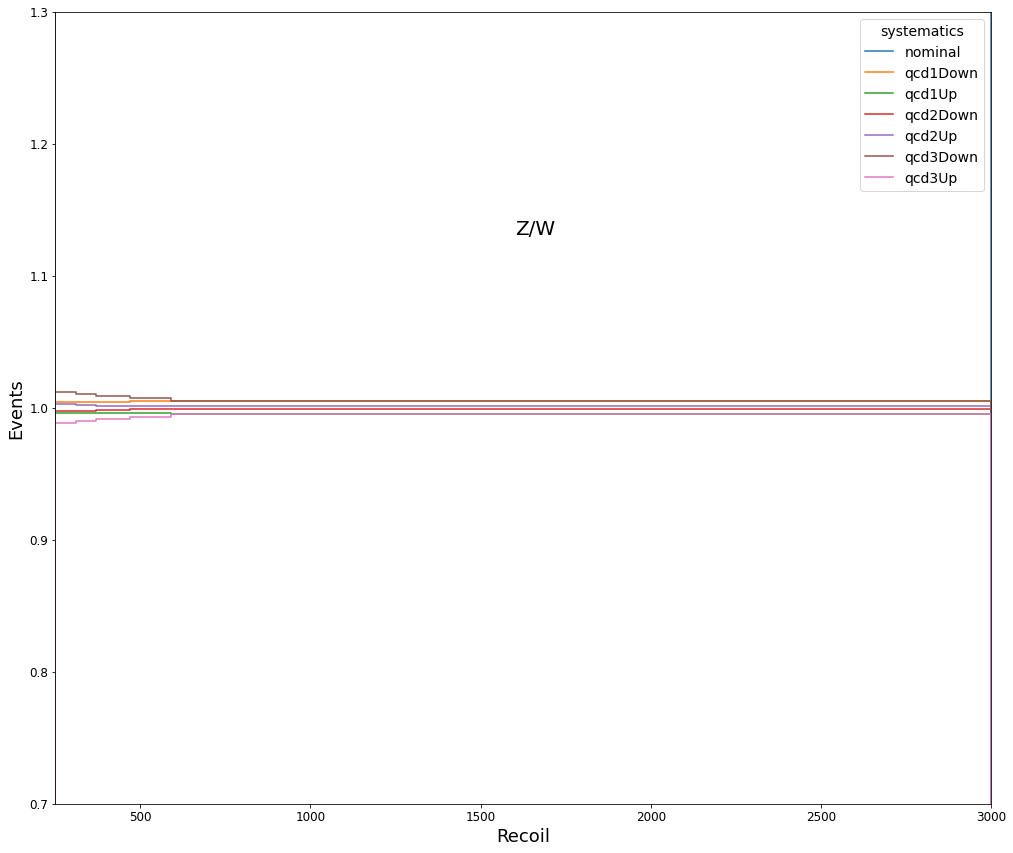

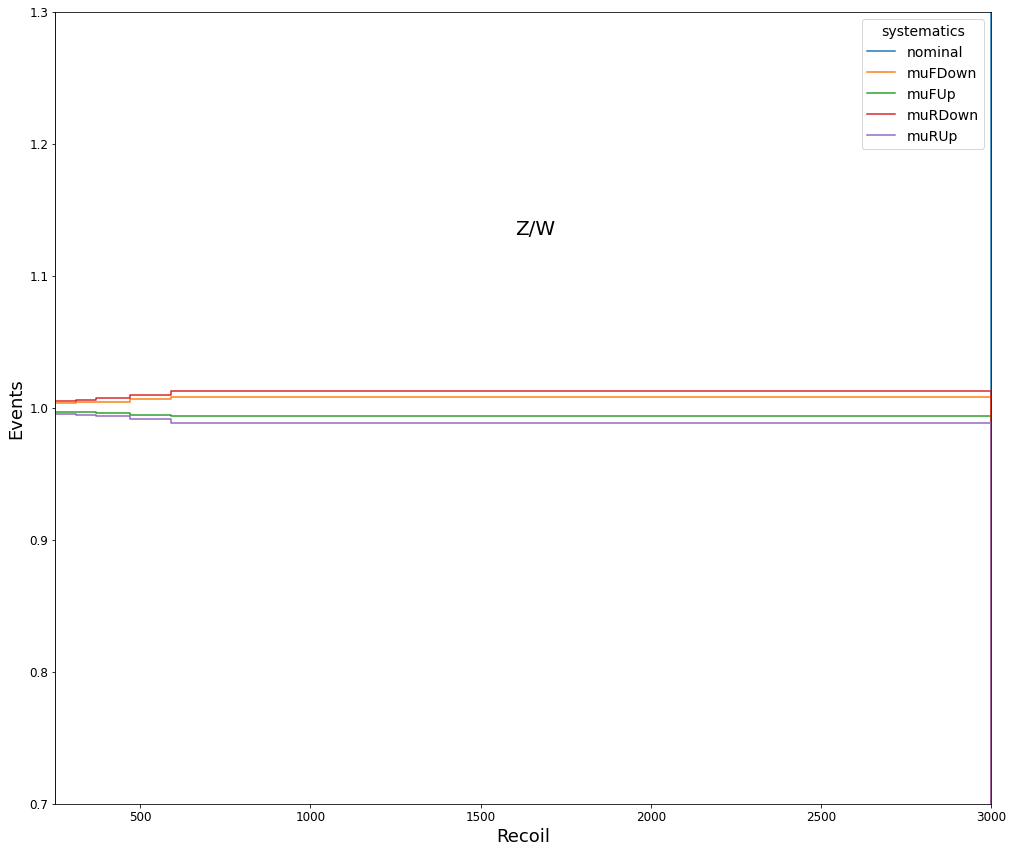

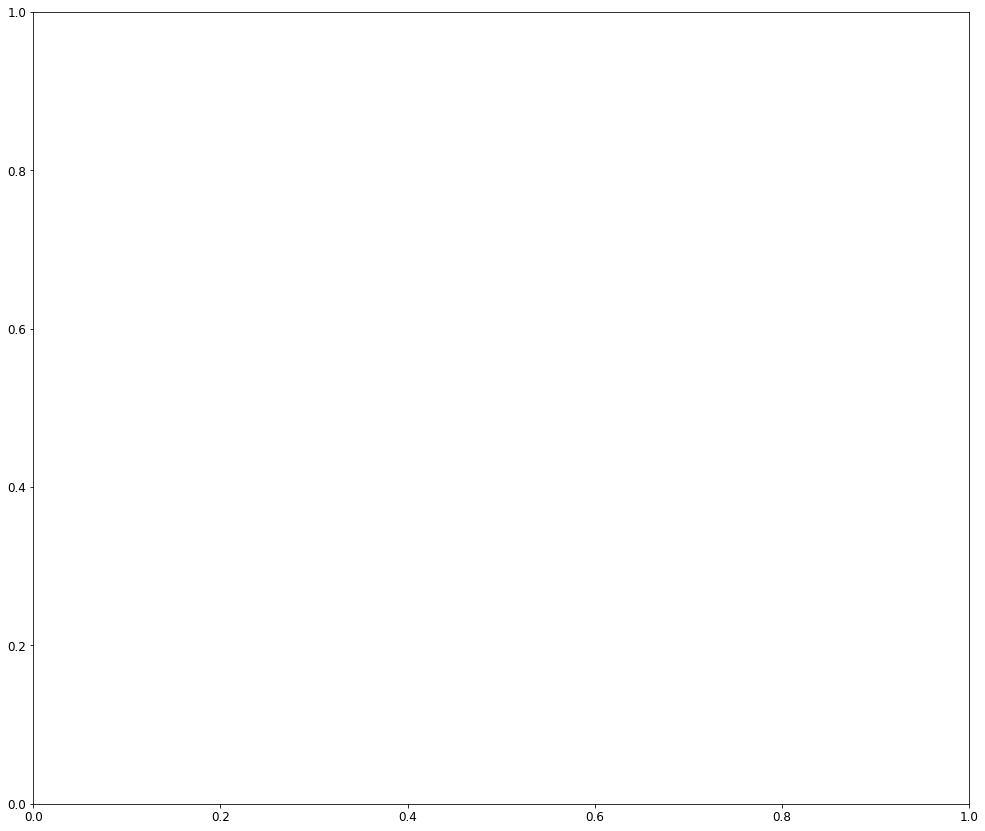

In [12]:
###
# Plot NLO systematics
###

import matplotlib.patches as patches

def plot_nlo(systematic):

    w=syst_hists[systematic].integrate('region','sr').integrate('process', 'W+jets').sum('fjmass','ZHbbvsQCD',overflow='all')
    for syst in w.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        w.values()[(str(syst),)]/=w.values()[('nominal',)]
    w.values()[('nominal',)]/=w.values()[('nominal',)]

    zw=syst_hists[systematic].integrate('region','sr').integrate('process', 'Z+jets').sum('fjmass','ZHbbvsQCD',overflow='all')
    for syst in zw.identifiers('systematic'):
        if str(syst) == 'nominal': continue
        zw.values()[(str(syst),)]/=zw.values()[('nominal',)]
        zw.values()[(str(syst),)]/=w.values()[(str(syst),)]

    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.figsize':(13,11)})
    plot = hist.plot1d(zw,overlay='systematic',error_opts=None,line_opts={'linestyle':'solid'})
    plot.set_ylim(0.7, 1.3)
    # build a rectangle in axes coords
    left, width = .0, .55
    bottom, height = .25, .55
    right = left + width
    top = bottom + height
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plot.text(right, top, 'Z/W',
            fontsize=20, 
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)
    os.system('mkdir -p ../plots/darkhiggs'+year+'/systematics/')
    plot_path = os.path.abspath('../plots/darkhiggs'+year+'/systematics/') 
    plot_name = systematic+'_sr_fail_recoil_ZW.png'
    fig.savefig(os.path.join(plot_path, plot_name))


for key in syst_hists:
    if 'btag' in key: continue
    plot_nlo(key)

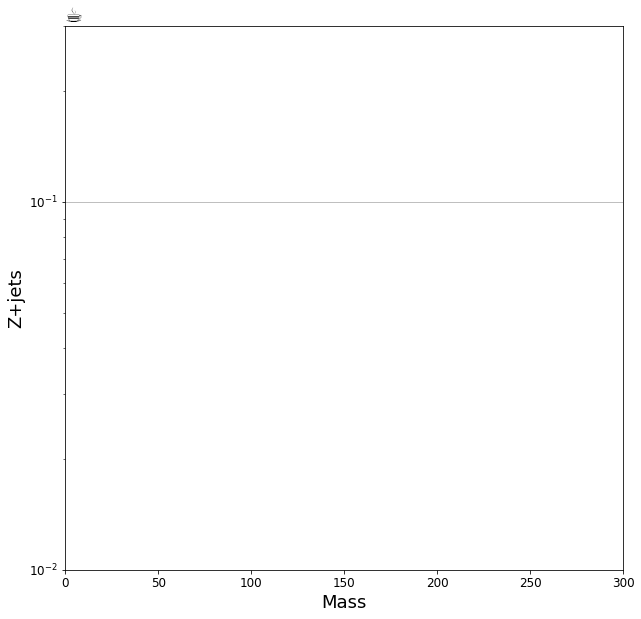

In [58]:
###
# Plot the pass/fail ratio for Z/W+jets as a function of the jet mass in each recoil bin
###

vjets_hists = {}
pass_hists  = {}
fail_hists  = {}

vjets_hists['template']=bkg_hists['template']

process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)
sig_map = OrderedDict()
vjets_map = OrderedDict()
#vjets_map["DY+jets"] = ("DY+*",)
vjets_map["W+jets"] = ("W+*",)
vjets_map["Z+jets"] = ("Z+*",)
#vjets_map["G+jets"] = ("G+*",)
for key in vjets_hists.keys():
    vjets_hists[key]=vjets_hists[key].group(cats, process, vjets_map)
    
pass_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',pass_binning))
fail_hists['template']=vjets_hists['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD',fail_binning))

#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
if not os.path.exists('unstack'):
    os.makedirs('unstack')
    
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photon CR'

process = 'Z+jets'

for key in vjets_hists.keys():
    if 'template' !=key: continue
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
    #plot.plot1d(vjets_hists[key].integrate('region','sr').integrate('systematic','nominal').sum('gentype','recoil','ZHbbvsQCD'),
    plot.plotratio(pass_hists[key].integrate('region','sr').integrate('systematic','nominal').integrate('process',process).sum('recoil','ZHbbvsQCD'),
                fail_hists[key].integrate('region','sr').integrate('systematic','nominal').integrate('process',process).sum('recoil','ZHbbvsQCD'),
                ax=ax,
                #overflow='over',
                error_opts=data_err_opts,
                denom_fill_opts={},
                guide_opts={},
                unc='num'
                )
    ax.set_ylabel(process)
    ax.set_ylim(0.01,0.3)
    ax.grid(axis='y')
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
    #ax.set_ylim(.1, None)
    #leg = ax.legend(ncol=2, loc='best')
    coffee = plt.text(0., 1., u"☕ ", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))
